---
> # **Business Case: Walmart Confidence Interval and CLT**
>
> **Analyst:** Sabarish  
> **Email:** [selvamsabarish1998@gmail.com](mailto:selvamsabarish1998@gmail.com)  
> **LinkedIn:** [Sabarish Selvam](https://www.linkedin.com/in/sabarishselvam/)  
> **Date of Completion:** 2024-07-07
---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from IPython.display import display, Markdown

import warnings
warnings.filterwarnings("ignore")

url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094"
raw_data = pd.read_csv(url)

df = raw_data

# 1.1 Basic Metrics, Missing Values and Outlier Detection

In [2]:
df = raw_data

Understand the Spending Habits of Walmart customers across a range of factors such as Age, Gender, Marital Status, Occupation etc, and provide insights and recommendations based on Blackfriday Sales Data

In [3]:
df.shape

(550068, 10)

In [4]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
# check for null
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

- Data doesn't have any missing/null values

In [7]:
#check for duplaication
df.duplicated().sum()

0

- Data doesn't have any missing values

In [8]:
# Convert columns to categorical types
df['Product_Category'] = df['Product_Category'].astype('category')
df['Gender'] = df['Gender'].map({"F": "Female", "M": "Male"}).astype('category')
df['Age'] = df['Age'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Marital_Status'] = df['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'}).astype('category')

# Print the first few rows of the DataFrame to verify the changes
df.head()


User_ID Product_ID  Gender   Age Occupation City_Category  \
0  1000001  P00069042  Female  0-17         10             A   
1  1000001  P00248942  Female  0-17         10             A   
2  1000001  P00087842  Female  0-17         10             A   
3  1000001  P00085442  Female  0-17         10             A   
4  1000002  P00285442    Male   55+         16             C   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2      Unmarried                3      8370  
1                          2      Unmarried                1     15200  
2                          2      Unmarried               12      1422  
3                          2      Unmarried               12      1057  
4                         4+      Unmarried                8      7969

In [9]:
#

# 1.2 Non-graphical Analysis:

In [10]:
# help(df.describe)
df.describe(include=['O'])

Product_ID
count      550068
unique       3631
top     P00265242
freq         1880

In [11]:
df.describe(include=['category'])

Gender     Age  Occupation City_Category Stay_In_Current_City_Years  \
count   550068  550068      550068        550068                     550068   
unique       2       7          21             3                          5   
top       Male   26-35           4             B                          1   
freq    414259  219587       72308        231173                     193821   

       Marital_Status  Product_Category  
count          550068            550068  
unique              2                20  
top         Unmarried                 5  
freq           324731            150933

In [12]:
df.describe(include=['number'])
#USER_ID should be conerted to object data type

User_ID       Purchase
count  5.500680e+05  550068.000000
mean   1.003029e+06    9263.968713
std    1.727592e+03    5023.065394
min    1.000001e+06      12.000000
25%    1.001516e+06    5823.000000
50%    1.003077e+06    8047.000000
75%    1.004478e+06   12054.000000
max    1.006040e+06   23961.000000

In [13]:
## Value counts and unique attributes
for cols in df.select_dtypes(exclude='int64').columns:    
    print(f'count of values of unique attributes in {cols}: ')    
    display(df[cols].value_counts())    
    print('--------------------------------------------------------')    
    print('--------------------------------------------------------')
    

count of values of unique attributes in Product_ID: 


Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

--------------------------------------------------------
--------------------------------------------------------
count of values of unique attributes in Gender: 


Gender
Male      414259
Female    135809
Name: count, dtype: int64

--------------------------------------------------------
--------------------------------------------------------
count of values of unique attributes in Age: 


Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

--------------------------------------------------------
--------------------------------------------------------
count of values of unique attributes in Occupation: 


Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

--------------------------------------------------------
--------------------------------------------------------
count of values of unique attributes in City_Category: 


City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

--------------------------------------------------------
--------------------------------------------------------
count of values of unique attributes in Stay_In_Current_City_Years: 


Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

--------------------------------------------------------
--------------------------------------------------------
count of values of unique attributes in Marital_Status: 


Marital_Status
Unmarried    324731
Married      225337
Name: count, dtype: int64

--------------------------------------------------------
--------------------------------------------------------
count of values of unique attributes in Product_Category: 


Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

--------------------------------------------------------
--------------------------------------------------------


**Unique Attributes:**

- **Gender**: Male, Female
- **Age**: 7 Bins: (0 to 17), (18 to 25), (26 to 35), (36 to 45), (46 to 50), (51 to 55), and (above 55)
- **Occupation**: 21 classes of occupation are provided although the classes are masked
- **City Category**: A, B, and C are the city categories
- **Stay of customers in Current City**: 0, 1, 2, 3, 4+ years
- **Marital Status**: UnMarried and Married
- **Product Categories**: Categories Named 1 to 20. Categories are masked

# 1.3: Visual Analysis - Univariant Analysis

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_bar_with_percentage(df, col, top_n=5):
    """
    Plots a bar chart with percentage labels for the top N categories in the specified column of a DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    col (str): Column name for which the bar chart is to be plotted.
    top_n (int): Number of top categories to display. Defaults to 5.
    """
    # Group by the specified column and count the unique User_IDs for each category
    counts = df.groupby(col)['User_ID'].nunique()

    # Sort categories by counts and select the top N categories
    top_counts = counts.nlargest(top_n)

    # Calculate 'Others' category
    others_count = counts.iloc[top_n:].sum()

    # Prepare data for plotting
    top_counts = pd.concat([top_counts, pd.Series({'Others': others_count})])
    top_labels = top_counts.index

    # Colors for consistent visualization
    colors = plt.cm.Paired(np.linspace(0, 1, len(top_labels)))

    # Convert top_labels to list of strings
    top_labels = [str(label) for label in top_labels]

    # Create plot
    fig, ax1 = plt.subplots(figsize=(4, 3))  # Reduced figure size
    plt.style.use('default')

    # Bar chart (ax1)
    bars = ax1.bar(top_labels, top_counts, color=colors)
    ax1.set_xlabel(col, fontsize=10)  # Reduced font size
    ax1.set_ylabel('Unique User Count', fontsize=10)  # Reduced font size
    # ax1.set_title(f'Top {top_n} {col} Categories', fontsize=12)  # Reduced font size
    ax1.tick_params(axis='x', rotation=90, labelsize=8)  # Rotate labels for better visibility
    ax1.tick_params(axis='y', labelsize=8)
    ax1.grid(False)  # Remove grid lines

    # Adding percentage labels
    total = sum(top_counts)
    for bar, count in zip(bars, top_counts):
        percentage = f'{100 * count / total:.1f}%'
        ax1.annotate(percentage,
                     xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     xytext=(0, 2),  # Reduced vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=8)  # Reduced font size

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


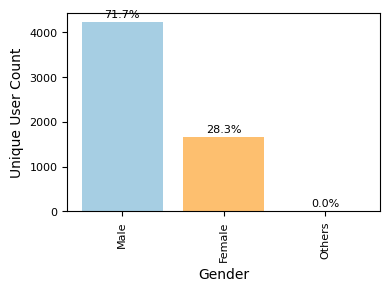

In [15]:
plot_bar_with_percentage(df, 'Gender', top_n=5)

- We can see that there are 71% of the Male customers in the data and 28% of the Female customers have purchased.

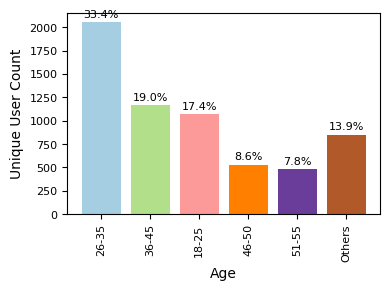

In [16]:
plot_bar_with_percentage(df, 'Age', top_n=5)

- 40% of the customers are from the Age range of 26-35 category.
- 20% for 36-45 age range (The second highest).

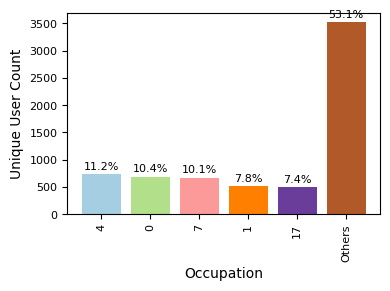

In [17]:
plot_bar_with_percentage(df, 'Occupation', top_n=5)

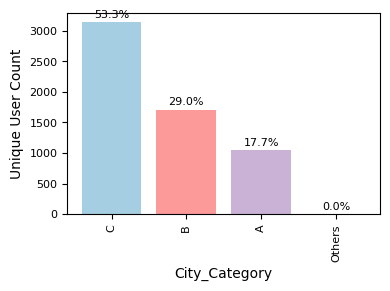

In [18]:
plot_bar_with_percentage(df, 'City_Category', top_n=5)

- 53% of the customers are from the city category of B
- 29% of the customers are from category is C.

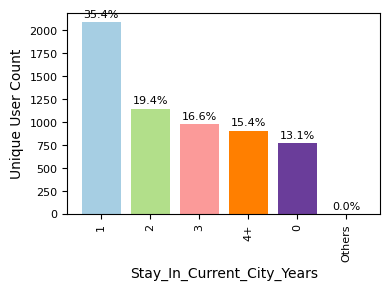

In [19]:
plot_bar_with_percentage(df, 'Stay_In_Current_City_Years', top_n=5)

- Majority (35%) of the people stay in a particular city for just 1 year

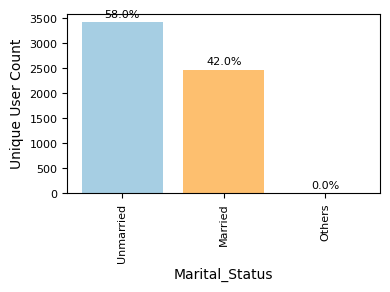

In [20]:
plot_bar_with_percentage(df, 'Marital_Status', top_n=5)

- Majority (58%) of the people are Unmarried

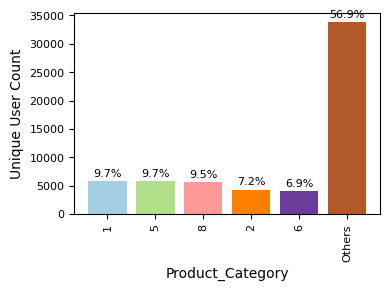

In [21]:
plot_bar_with_percentage(df, 'Product_Category', top_n=5)

- Highest product sold is of Product Category 1,5,8 summing to 28.9% sales.

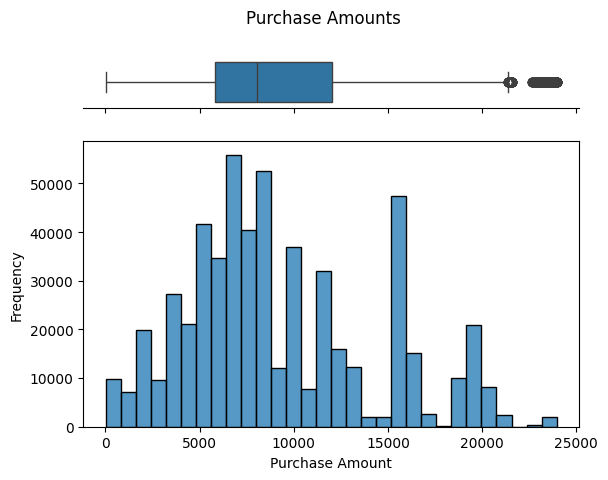

In [22]:
# Set up the figure and axes
x = df['Purchase']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Boxplot on the top subplot
sns.boxplot(x=x, ax=ax_box)
ax_box.set(yticks=[])
sns.despine(ax=ax_box, left=True)

# Histogram on the bottom subplot
sns.histplot(x=x, bins=30, ax=ax_hist, edgecolor='black')
ax_hist.set_xlabel('Purchase Amount')
ax_hist.set_ylabel('Frequency')

# Final adjustments
plt.suptitle('Purchase Amounts')
plt.grid(False)
plt.show()

# 1.4: Visual Analysis - Bivariant Analysis

In [23]:
def create_styled_pivot(df, rows, cols, values_col):
    """
    Creates a styled pivot table showing percentage sales contribution.
    
    Parameters:
    - df: DataFrame containing the data.
    - rows: Column to use as index (rows) in the pivot table.
    - cols: Column to use as columns in the pivot table.
    - values_col: Column to aggregate values in the pivot table.
    
    Returns:
    - styled_pivot_df: Styled DataFrame with percentage sales contribution.
    """
    # Create a pivot table with sum of values
    pivot_df = df.pivot_table(index=rows, columns=cols, values=values_col, aggfunc='sum', margins=True, margins_name='Total')
    
    # Calculate percentage contribution to total
    pivot_df_percent = pivot_df.div(pivot_df.loc['Total', 'Total']) * 100
    
    # Drop the 'Total' column and row
    pivot_df_percent = pivot_df_percent.drop(columns='Total', index='Total')
    
    # Apply heatmap-like coloring to the percentage contribution table
    styled_pivot_df = pivot_df_percent.style.background_gradient(cmap='YlGnBu', axis=None)
    
    # Format the values as percentages
    styled_pivot_df = styled_pivot_df.format("{:.1f}%")
    
    # Set a caption for the DataFrame
    caption = f"Percentage Sales Contribution by {rows} and {cols}"
    styled_pivot_df.set_caption(caption)
    
    # Display the styled DataFrame
    return styled_pivot_df


In [24]:
create_styled_pivot(df, 'Gender','Age', 'Purchase')


> **Prime Age Group**: Ages 26-35 drive the highest sales, particularly among males (31.2%) and females (8.7%).
   
> **Gender Impact**: Males contribute significantly more to sales across all age groups compared to females.

> **Age Trend**: Sales contributions generally decline with age, with younger demographics showing higher percentages.

> **Young Male Influence**: Young males (18-25) notably contribute 13.9% to total sales.

These points underscore the strong influence of age and gender on purchasing patterns, crucial for targeted marketing strategies.

In [25]:
create_styled_pivot(df, 'Gender','City_Category', 'Purchase')

>- **Gender Variation**: 
>  - Males lead in sales across all city categories.
>  - Highest in City Category B (31.8%), lowest in City Category A (6.0%).

>- **City Category Impact**: 
>  - City Category B drives the highest overall sales.
>  - City Category A shows the least contribution, particularly noticeable for females (6.0%).

These points highlight gender-driven sales disparities and the varying impact of city categories on overall sales distribution.

In [26]:
create_styled_pivot(df, 'Gender','Stay_In_Current_City_Years', 'Purchase')

>- **Gender Impact**:
>  - Males consistently contribute more across all durations of stay.
>  - Peak contribution for males in Year 1 (26.3%) and lowest in Year 0 (10.5%).

>- **Female Participation**:
>  - Females show lower but consistent contributions across different stay durations.
>  - Highest for females in Year 1 (8.8%) and lowest in Year 0 (2.9%).

These insights highlight gender-specific purchasing behaviors based on the duration of stay in the current city.

In [27]:
create_styled_pivot(df, 'Gender','Marital_Status', 'Purchase')

>- **Marital Status Impact**:
>  - Married males lead in sales (31.1%) compared to unmarried males (45.6%).
>  - Married females contribute 9.9% while unmarried females contribute 13.4%.

>- **Gender Disparity**:
>  - Males dominate sales in both marital status categories.
>  - Females show higher contribution percentages in the unmarried category.

These points underscore the significant influence of gender and marital status on purchasing behavior, emphasizing varying consumer patterns across different demographic segments.
 

In [28]:
create_styled_pivot(df, 'Gender','Product_Category', 'Purchase')

>- **Category Impact**:
>  - Category 1 sees significant sales from both genders (Female: 6.6%, Male: 30.9%).
>  - Category 5 shows notable sales contributions (Female: 5.2%, Male: 13.3%).

>- **Gender Disparity**:
>  - Males dominate sales across most categories, particularly in Categories 1 and 8.
>  - Females contribute higher percentages in Categories 1 and 5 compared to other categories.

These points highlight distinct purchasing patterns by gender across various product categories, underscoring preferences and sales distribution in retail contexts.

In [29]:
create_styled_pivot(df, 'City_Category','Stay_In_Current_City_Years', 'Purchase')

>- **City Category Impact**:
>  - City Category B consistently leads in sales contributions across all durations of stay.
>  - City Category A and C show similar trends, with lower contributions compared to B.

>- **Stay Duration Influence**:
>  - Longer stays generally correlate with higher sales contributions across all city categories.
>  - City Category B exhibits the highest increase in contributions with longer stays.

These points illustrate how city category and duration of stay interact to influence purchasing behavior, highlighting potential trends for targeted marketing strategies in different urban areas.

In [30]:
create_styled_pivot(df, 'Marital_Status','Stay_In_Current_City_Years', 'Purchase')

>- **Marital Status Impact**:
>  - Both married and unmarried individuals show increasing sales contributions with longer stays in the current city.
>  - Unmarried individuals consistently contribute more across all durations compared to married individuals.

> - **Stay Duration Influence**:
>  - Longer stays generally correlate with higher sales contributions for both marital status groups.
>  - Unmarried individuals have notably higher contributions in each stay duration category compared to married individuals.

These points emphasize how both marital status and duration of stay interact to influence purchasing patterns, suggesting different consumer behaviors based on these factors.

In [31]:
create_styled_pivot(df, 'Age','Stay_In_Current_City_Years', 'Purchase')

>- **Age Impact**:
>  - Ages 26-35 consistently contribute the highest sales across all durations of stay.
>  - Younger age groups (0-17, 18-25) show increasing sales contributions with longer stays.

> - **Stay Duration Influence**:
>  - Generally, longer stays correlate with higher sales contributions across all age groups.
>  - Contributions tend to decrease with age within each stay duration category.

These points highlight age-related variations in purchasing behavior and the impact of residency duration on sales patterns.

In [32]:
create_styled_pivot(df, 'Age', 'Occupation', 'Purchase')

In [33]:
create_styled_pivot(df, 'Marital_Status', 'Age', 'Purchase')

> - **Marital Status Impact**:
>  - Married individuals contribute significantly more in older age groups (36-45 and above).
>  - Unmarried individuals show higher contributions in younger age groups (18-25 and 26-35).

> - **Age Influence**:
>  - Ages 26-35 consistently lead in sales contribution across both marital status categories.
>  - Contribution percentages generally decrease in older age groups for both married and unmarried individuals.

These points highlight how age and marital status intersect to influence purchasing behavior, suggesting different consumer patterns based on these demographic factors.

## Total Purchases Across Categories:

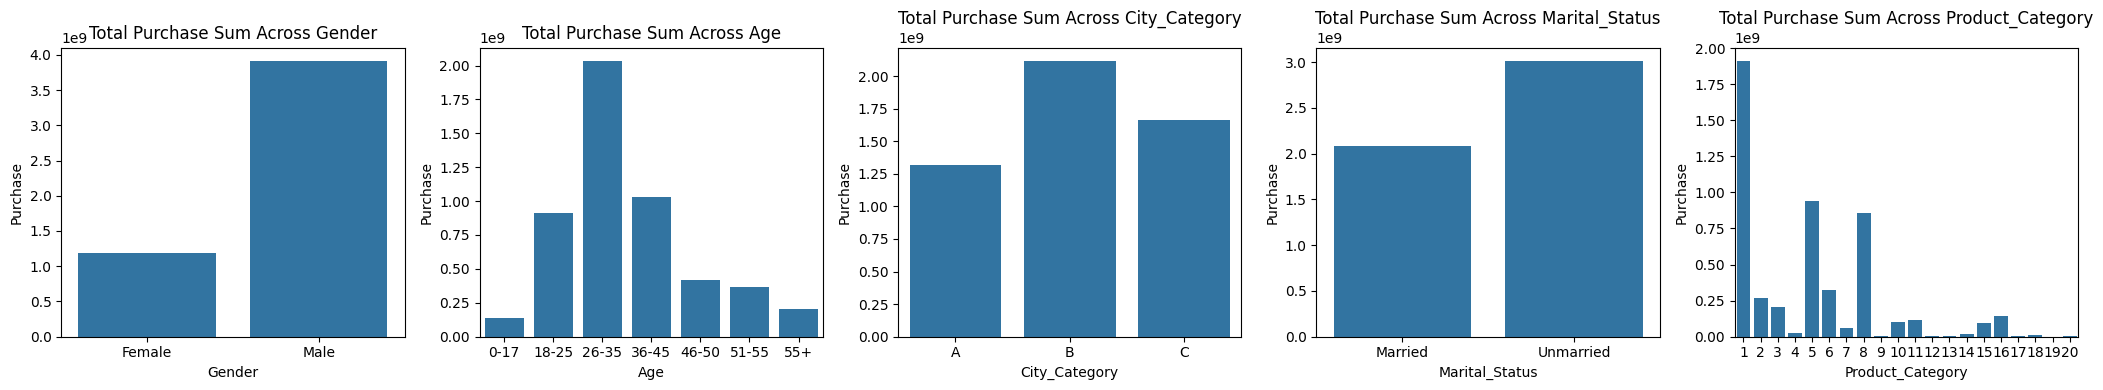

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(21, 4))
ax = ax.flatten()
plot_idx = 0
categories_to_plot = ['Gender', 'Age', 'City_Category', 'Marital_Status', 'Product_Category']

# Loop through categories to create bar plots
for col in categories_to_plot:
    sns.barplot(x=col, y='Purchase', data = df.groupby(col, observed = False)['Purchase'].sum().reset_index(), ax=ax[plot_idx])
    ax[plot_idx].set_title(f'Total Purchase Sum Across {col}')
    plot_idx += 1

for idx in range(plot_idx, len(ax)):
    fig.delaxes(ax[idx])

plt.tight_layout()
plt.show()

Based on the visual analysis of Black Friday sales at Mallmark:

- Gender: Males spend approximately three times more than females.
- Age: Customers aged between 18 and 45 years make the highest purchases.
- City Category: Customers from City Category B make the highest purchases.
- Marital Status: Unmarried individuals make the most purchases.
- Product Category: Products in categories 1, 5, and 8 are the best-selling.


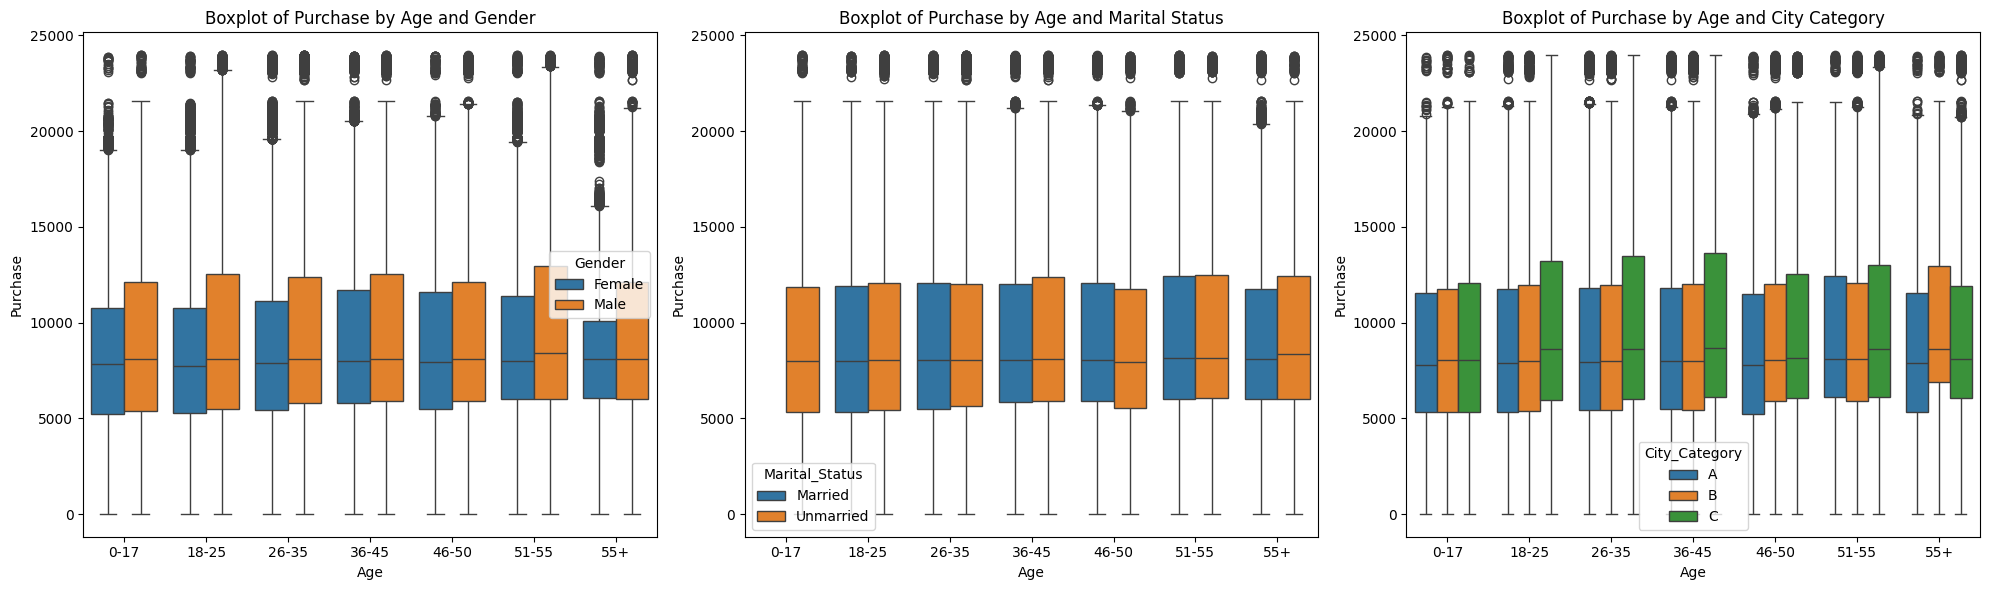

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot the first boxplot (Age vs. Purchase, grouped by Gender)
sns.boxplot(x='Age', y='Purchase', data=df, hue='Gender', ax=axes[0]).set_title('Boxplot of Purchase by Age and Gender')

# Plot the second boxplot (Age vs. Purchase, grouped by Marital_Status)
sns.boxplot(x='Age', y='Purchase', data=df, hue='Marital_Status', ax=axes[1]).set_title('Boxplot of Purchase by Age and Marital Status')

# Plot the third boxplot (Age vs. Purchase, grouped by City_Category)
sns.boxplot(x='Age', y='Purchase', data=df, hue='City_Category', ax=axes[2]).set_title('Boxplot of Purchase by Age and City Category')

# Adjust layout and display plot
plt.tight_layout()
plt.show()


- Gender: There is no significant visual difference in the pattern of Purchase across different ages grouped by Gender.
- Marital Status: There is no significant visual difference in the pattern of Purchase across different ages grouped by Marital Status, except for the 0-17 age group where variations may be observed.
- City Category: There is no significant visual difference in the pattern of Purchase across different ages grouped by City Category.

# 3.  Business Insights Based on Non-Graphical and Visual Analysis 

# Data Exploration

In [36]:
# Data Exploration :
## Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
mean_female = df[df['Gender'] == 'Female']['Purchase'].mean().round(2)
mean_male = df[df['Gender'] == 'Male']['Purchase'].mean().round(2)

print("Average Purchase Amount Per Transaction")
print("F : ", mean_female)
print("M : ", mean_male)

Average Purchase Amount Per Transaction
F :  8734.57
M :  9437.53


Male customers spend more per transaction on average than female customers, but the significane of the test is to be tested.

In [37]:
# Calculate the sample mean and standard deviation for each gender
std_female = df[df['Gender'] == 'Female']['Purchase'].std().round(2)
std_male   = df[df['Gender'] == 'Male']['Purchase'].std().round(2)

print("Standard Deviation of Purchase Amount Per Transaction")
print("F : ", std_female)
print("M : ", std_male)

Standard Deviation of Purchase Amount Per Transaction
F :  4767.23
M :  5092.19


In [38]:
# Counting transactions by gender
n_female = df[df['Gender'] == 'Female'].shape[0]
n_male = df[df['Gender'] == 'Male'].shape[0]

# Printing the results
print("Number of Transactions")
print("F : ", n_female)
print("M : ", n_male)

Number of Transactions
F :  135809
M :  414259


In [39]:
# Calculate standard errors
se_female = (std_female / np.sqrt(n_female)).round(2)
se_male = (std_male / np.sqrt(n_male)).round(2)

# Print the results
print("Standard Errors:")
print("Female: ", se_female)
print("Male: ", se_male)

Standard Errors:
Female:  12.94
Male:  7.91


In [40]:
from scipy.stats import norm

confidence_level = 0.95

# Calculate z-score for 95% confidence interval
z_score = norm.ppf(0.5 + confidence_level / 2)

# Margin of error (MOE)
moe_female = z_score * se_female
moe_male = z_score * se_male

# Confidence intervals (CI)
ci_female = (mean_female - moe_female, mean_female + moe_female)
ci_male = (mean_male - moe_male, mean_male + moe_male)

# Print confidence intervals
print(f"Confidence Intervals (95% CI):\n"
      f"Female: {ci_female[0]:.2f}, {ci_female[1]:.2f}\n"
      f"Male:   {ci_male[0]:.2f}, {ci_male[1]:.2f}")


Confidence Intervals (95% CI):
Female: 8709.21, 8759.93
Male:   9422.03, 9453.03


# 4.  CLT and Confidence Intervals

### Funtionality of the designed funtion

+ **Calculates sample means and confidence intervals**: Provides statistical estimates of average spending and uncertainty levels across customer groups.
   
+ **Visualizes spending distributions**: Uses KDE and ECDF plots to show how spending varies within each customer category.

+ **Compares confidence intervals**: Identifies differences in spending behaviors between customer groups at different confidence levels.

+ **Supports business decisions**: Helps in targeting marketing efforts, adjusting pricing strategies, and optimizing resource allocation based on customer spending patterns.

+ **Enhances profitability**: Enables businesses to tailor strategies that better meet the needs of different customer segments, potentially increasing sales and customer satisfaction.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from IPython.display import display, Markdown

# Function to calculate sample means and confidence intervals
def calculate_sample_means_and_intervals(num_iterations, sample_sizes, population_data, confidence_levels):
    results_by_confidence = {cl: [] for cl in confidence_levels}

    for n in sample_sizes:
        samples = np.random.choice(a=population_data, size=(num_iterations, n), replace=True)
        sample_means = np.mean(samples, axis=1)
        mean_of_sample_means = np.mean(sample_means)
        standard_deviation = np.std(sample_means)
        standard_error = standard_deviation / np.sqrt(n)

        for confidence_level in confidence_levels:
            z = norm.ppf(1 - (1 - confidence_level) / 2)
            margin_of_error = z * standard_error
            CI = (mean_of_sample_means - margin_of_error, mean_of_sample_means + margin_of_error)
            results_by_confidence[confidence_level].append((n, sample_means, mean_of_sample_means, standard_deviation, standard_error, (margin_of_error, CI)))

    return results_by_confidence

# Function to plot KDE and ECDF
def plot_kde_ecdf(data, category):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot KDE
    sns.kdeplot(data=data, ax=ax, label=f'{category.capitalize()} KDE')

    # Plot ECDF
    sorted_data = np.sort(data)
    yvals = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)
    ax_twin = ax.twinx()
    ax_twin.plot(sorted_data, yvals, 'r-', label=f'{category.capitalize()} ECDF')

    # Set labels and title
    ax.set_title(f'Density and ECDF Plot for {category.capitalize()} Customers')
    ax.set_ylabel('Density (KDE)')
    ax.set_xlabel('Purchase Amount')

    # Add legends
    ax.legend(loc='upper right')
    ax_twin.legend(loc='lower right')

    fig.tight_layout()
    plt.show()

# Function to display confidence intervals
def display_confidence_intervals(results_by_confidence, confidence_levels):
    for confidence_level in confidence_levels:
        display(Markdown(f"### 🟥 Confidence Level: {int(confidence_level*100)}% \n"))

        for n, sample_means, mean_of_sample_means, standard_deviation, standard_error, (margin_of_error, CI) in results_by_confidence[confidence_level]:
            ci_text = f"- **{int(confidence_level*100)}% Confidence Interval:** ({CI[0]:.2f}, {CI[1]:.2f})\n"
            ci_text += f"  - **Margin of Error:** {margin_of_error:.2f}\n"

            markdown_text = f"""
**Sample Size: {n}**

>- **Mean of Sample Means:** {mean_of_sample_means:.2f}
>- **Sample Mean ± MoE at {int(confidence_level * 100)}% confidence:** {mean_of_sample_means:.2f} ± {margin_of_error:.2f}
>- **Standard Deviation of Sample Means:** {standard_deviation:.2f}
"""
            display(Markdown(markdown_text))
            display(Markdown("---"))

# Function to plot distribution of sample means
def plot_distribution_sample_means(results_by_confidence, sample_sizes, confidence_levels):
    fig, axes = plt.subplots(len(confidence_levels), len(sample_sizes), figsize=(20, 12), sharex=True)

    for row, confidence_level in enumerate(confidence_levels):
        for col, (n, sample_means, mean_of_sample_means, standard_deviation, standard_error, (margin_of_error, CI)) in enumerate(results_by_confidence[confidence_level]):
            ax = axes[row, col]

            sns.kdeplot(sample_means, ax=ax, label=f'n = {n}')
            ax.axvline(mean_of_sample_means, color='r', linestyle='--', label=f'Mean: {mean_of_sample_means:.2f}')
            ax.axvline(CI[0], color='g', linestyle='--', label=f'{int(confidence_level*100)}% CI Lower: {CI[0]:.2f}')
            ax.axvline(CI[1], color='b', linestyle='--', label=f'{int(confidence_level*100)}% CI Upper: {CI[1]:.2f}')

            if row == 0:
                ax.set_title(f'Sample Size = {n}')
            if col == 0:
                ax.set_ylabel(f'{int(confidence_level*100)}% CI')

            ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=1)

            # Adjust ticks and labels
            ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

    fig.suptitle('Distribution of Sample Means with Different Sample Sizes and Confidence Levels', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Function to overlap confidence intervals between two groups
def overlap_confidence_intervals(results_group1, results_group2, sample_sizes, confidence_levels, group1_name, group2_name):
    num_sample_sizes = len(sample_sizes)
    fig, axes = plt.subplots(1, len(confidence_levels), figsize=(18, 6))

    # Define x positions for group 1 and group 2 data points with slight offsets
    x_offsets_group1 = np.linspace(-0.15, -0.05, num_sample_sizes)  # Offset for group 1
    x_offsets_group2 = np.linspace(0.05, 0.15, num_sample_sizes)   # Offset for group 2

    for i, confidence_level in enumerate(confidence_levels):
        ax = axes[i]

        # Plotting Group 1 Data with Circle markers
        for j, (n, sample_means, mean_of_sample_means, standard_deviation, standard_error, (margin_of_error, CI)) in enumerate(results_group1[confidence_level]):
            ax.errorbar(j + x_offsets_group1[j], mean_of_sample_means, yerr=margin_of_error, fmt='o', label=group1_name, color='red', ecolor='salmon', elinewidth=2, capsize=5)
            # Adding text for confidence interval values
            ax.text(j + x_offsets_group1[j], CI[0], f'{CI[0]:.2f}', ha='center', va='top', fontsize=9, color='green')
            ax.text(j + x_offsets_group1[j], CI[1], f'{CI[1]:.2f}', ha='center', va='bottom', fontsize=9, color='blue')

        # Plotting Group 2 Data with Square markers
        for j, (n, sample_means, mean_of_sample_means, standard_deviation, standard_error, (margin_of_error, CI)) in enumerate(results_group2[confidence_level]):
            ax.errorbar(j + x_offsets_group2[j], mean_of_sample_means, yerr=margin_of_error, fmt='s', label=group2_name, color='black', ecolor='lightgrey', elinewidth=2, capsize=5)
            # Adding text for confidence interval values
            ax.text(j + x_offsets_group2[j], CI[0], f'{CI[0]:.2f}', ha='center', va='top', fontsize=9, color='green')
            ax.text(j + x_offsets_group2[j], CI[1], f'{CI[1]:.2f}', ha='center', va='bottom', fontsize=9, color='blue')

        # Setting plot titles and labels
        ax.set_title(f'{int(confidence_level * 100)}% Confidence Level\n{group1_name} vs {group2_name}', fontsize=16) 
        
        # Customize x-axis ticks and labels
        ax.set_xticks(np.arange(num_sample_sizes) + 0.5 * (x_offsets_group1.max() - x_offsets_group1.min()))
        ax.set_xticklabels([f'{size}' for size in sample_sizes], fontsize=10)

        # Add labels for sample sizes
        for j, label in enumerate(sample_sizes):
            ax.text(j + x_offsets_group1[j], ax.get_ylim()[0], str(label), ha='center', va='top', fontsize=10)

    # Common labels
    fig.text(0.5, 0.04, 'Sample Size', ha='center', fontsize=14)
    fig.text(0.04, 0.5, 'Mean of Sample Means', va='center', rotation='vertical', fontsize=14)

    # Add a simplified legend to the first subplot
    handles, labels = axes[0].get_legend_handles_labels()
    by_label = {group1_name: handles[0], group2_name: handles[num_sample_sizes]}
    axes[0].legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

    # Adjust layout
    fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.show()

# Function to analyze sample means by category
def analyze_sample_means_by_category(num_iterations, sample_sizes, confidence_levels, df, category_column):
    # Convert category_column to categorical type if it's not already
    df[category_column] = df[category_column].astype('category')

    # Get unique categories from the category column
    categories = df[category_column].cat.categories

    # Store results for each category
    results_by_category = {category: {} for category in categories}

    for category in categories:
        category_data = df[df[category_column] == category]['Purchase']

        # Display Markdown titles and plot combined KDE with ECDF for the current category
        display(Markdown(f"# {str(category).capitalize()} Customers 👨‍👩‍👧‍👦"))
        plot_kde_ecdf(category_data, str(category))

        # Analyze sample means and intervals for the current category
        category_results = calculate_sample_means_and_intervals(num_iterations, sample_sizes, category_data.values, confidence_levels)
        results_by_category[category] = category_results

        plot_distribution_sample_means(category_results, sample_sizes, confidence_levels)
        display_confidence_intervals(category_results, confidence_levels)

    # Overlap Analysis between categories
    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            overlap_confidence_intervals(results_by_category[categories[i]], results_by_category[categories[j]], sample_sizes, confidence_levels, str(categories[i]), str(categories[j]))



**| Applying CLT - Estimating CI and Performing An Overlapping Analysis on Gender Variable**

# Female Customers 👨‍👩‍👧‍👦

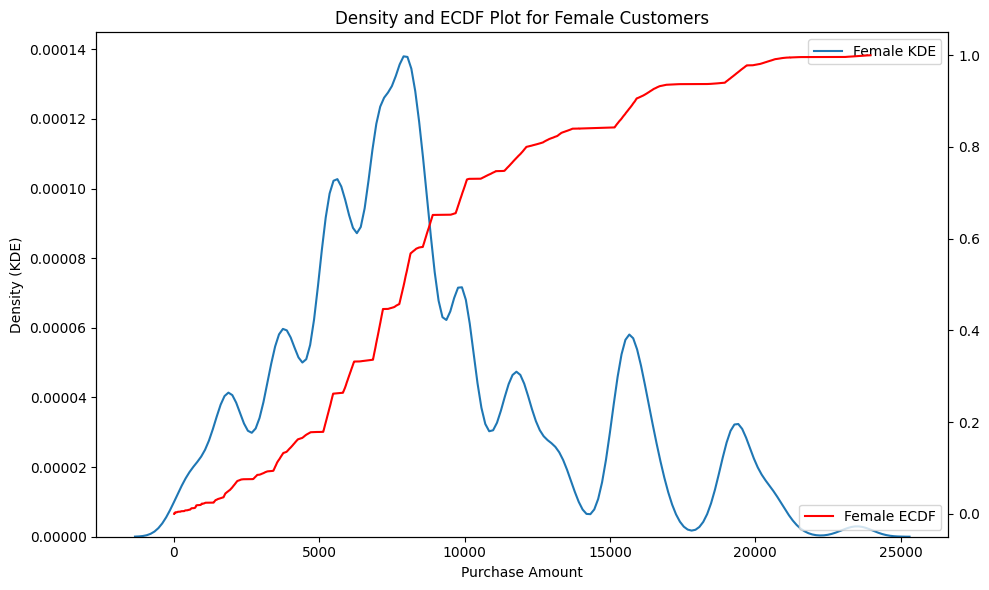

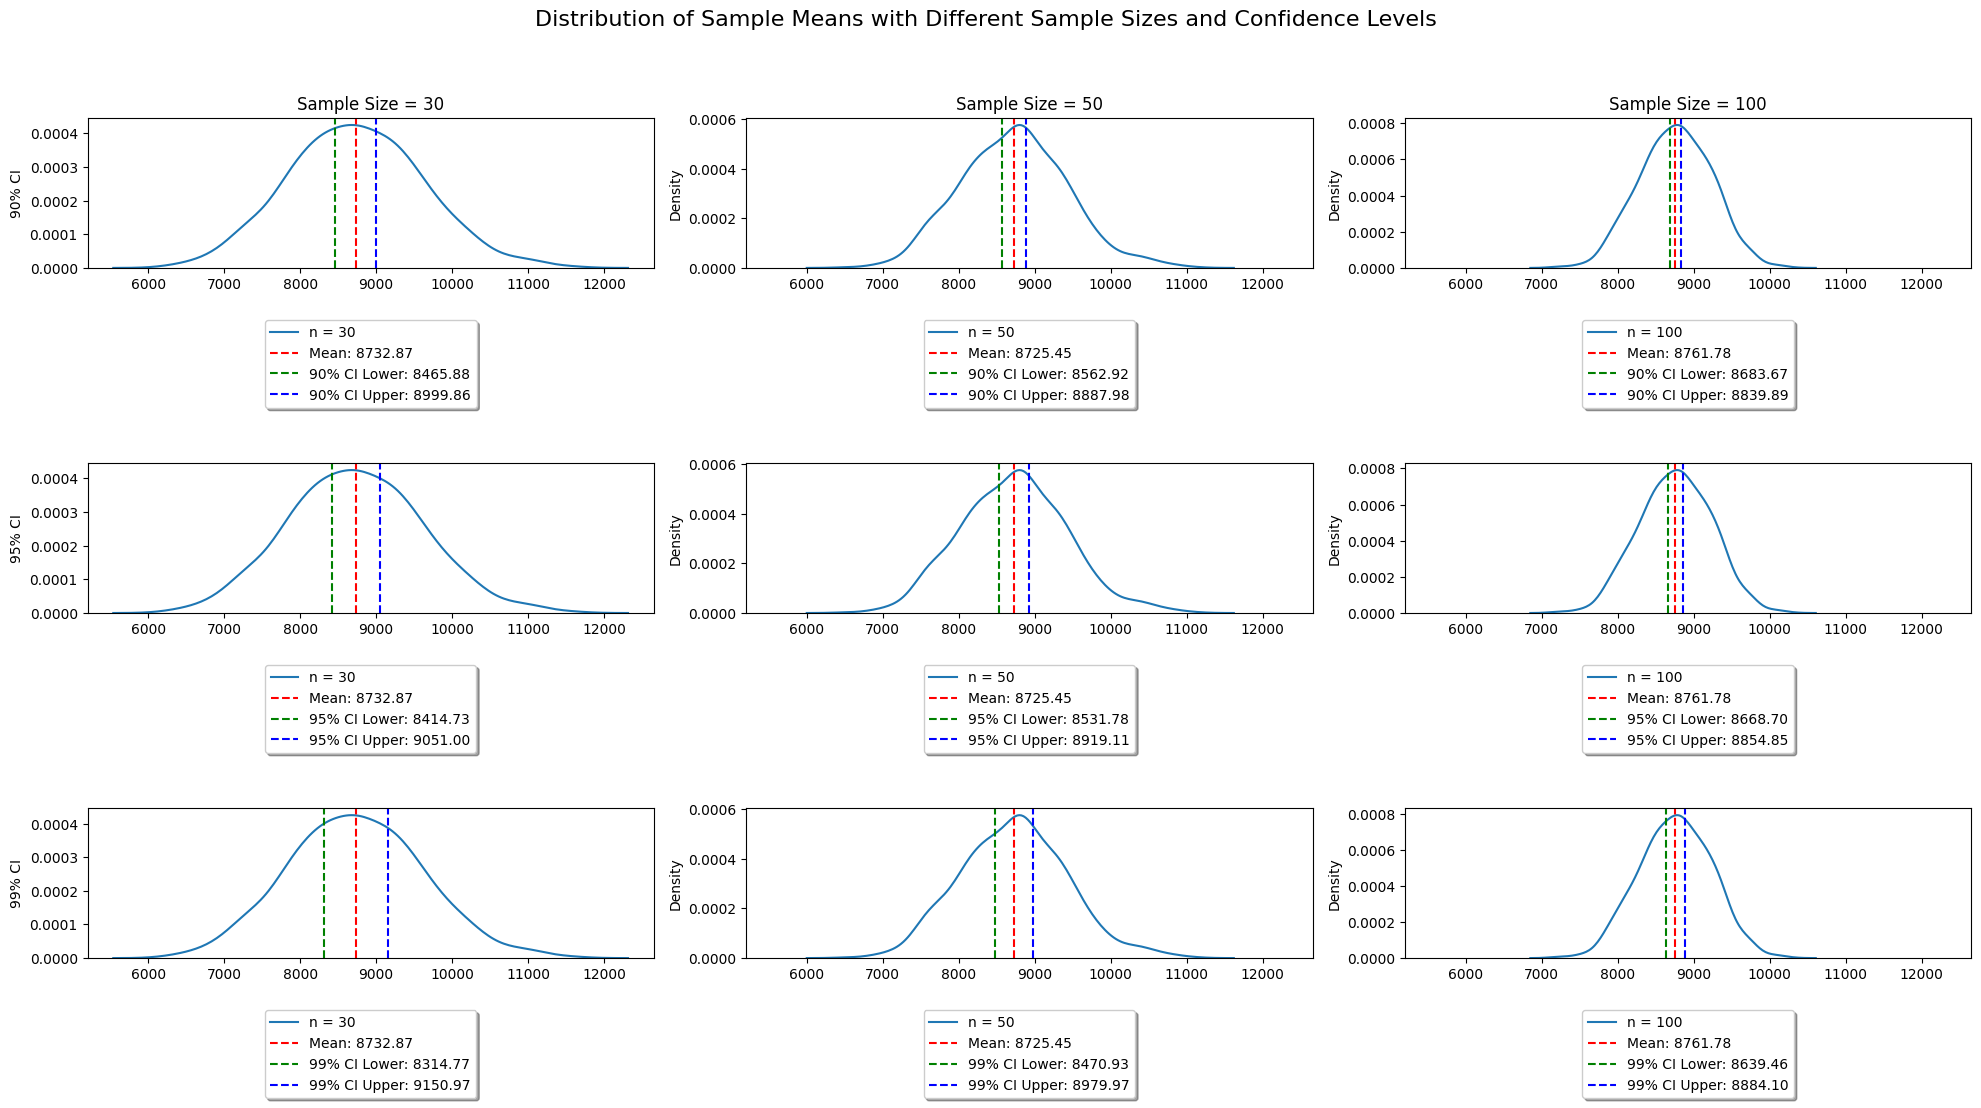

### 🟥 Confidence Level: 90% 



**Sample Size: 30**

>- **Mean of Sample Means:** 8732.87
>- **Sample Mean ± MoE at 90% confidence:** 8732.87 ± 266.99
>- **Standard Deviation of Sample Means:** 889.05


---


**Sample Size: 50**

>- **Mean of Sample Means:** 8725.45
>- **Sample Mean ± MoE at 90% confidence:** 8725.45 ± 162.53
>- **Standard Deviation of Sample Means:** 698.70


---


**Sample Size: 100**

>- **Mean of Sample Means:** 8761.78
>- **Sample Mean ± MoE at 90% confidence:** 8761.78 ± 78.11
>- **Standard Deviation of Sample Means:** 474.89


---

### 🟥 Confidence Level: 95% 



**Sample Size: 30**

>- **Mean of Sample Means:** 8732.87
>- **Sample Mean ± MoE at 95% confidence:** 8732.87 ± 318.14
>- **Standard Deviation of Sample Means:** 889.05


---


**Sample Size: 50**

>- **Mean of Sample Means:** 8725.45
>- **Sample Mean ± MoE at 95% confidence:** 8725.45 ± 193.67
>- **Standard Deviation of Sample Means:** 698.70


---


**Sample Size: 100**

>- **Mean of Sample Means:** 8761.78
>- **Sample Mean ± MoE at 95% confidence:** 8761.78 ± 93.08
>- **Standard Deviation of Sample Means:** 474.89


---

### 🟥 Confidence Level: 99% 



**Sample Size: 30**

>- **Mean of Sample Means:** 8732.87
>- **Sample Mean ± MoE at 99% confidence:** 8732.87 ± 418.10
>- **Standard Deviation of Sample Means:** 889.05


---


**Sample Size: 50**

>- **Mean of Sample Means:** 8725.45
>- **Sample Mean ± MoE at 99% confidence:** 8725.45 ± 254.52
>- **Standard Deviation of Sample Means:** 698.70


---


**Sample Size: 100**

>- **Mean of Sample Means:** 8761.78
>- **Sample Mean ± MoE at 99% confidence:** 8761.78 ± 122.32
>- **Standard Deviation of Sample Means:** 474.89


---

# Male Customers 👨‍👩‍👧‍👦

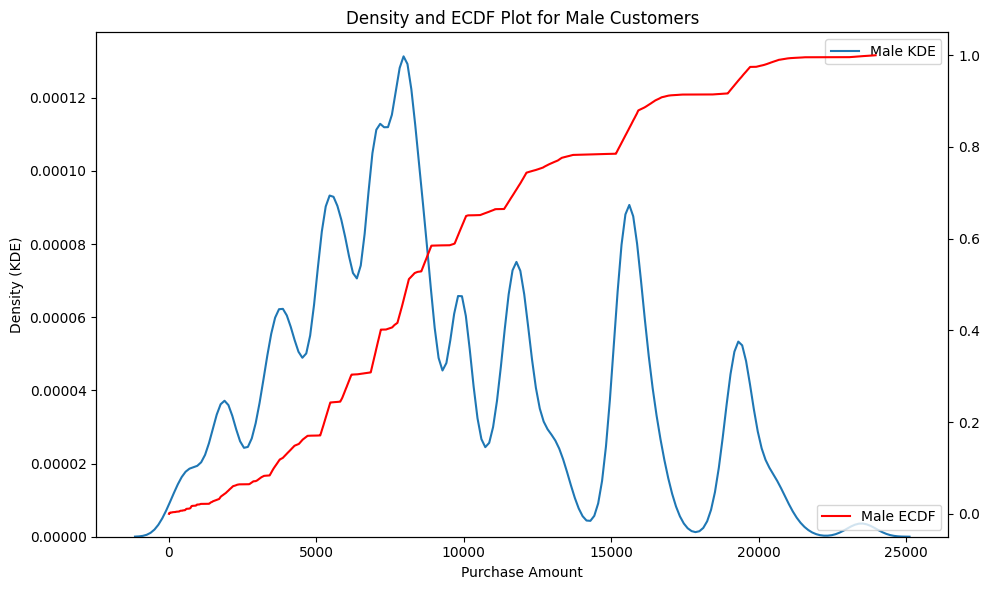

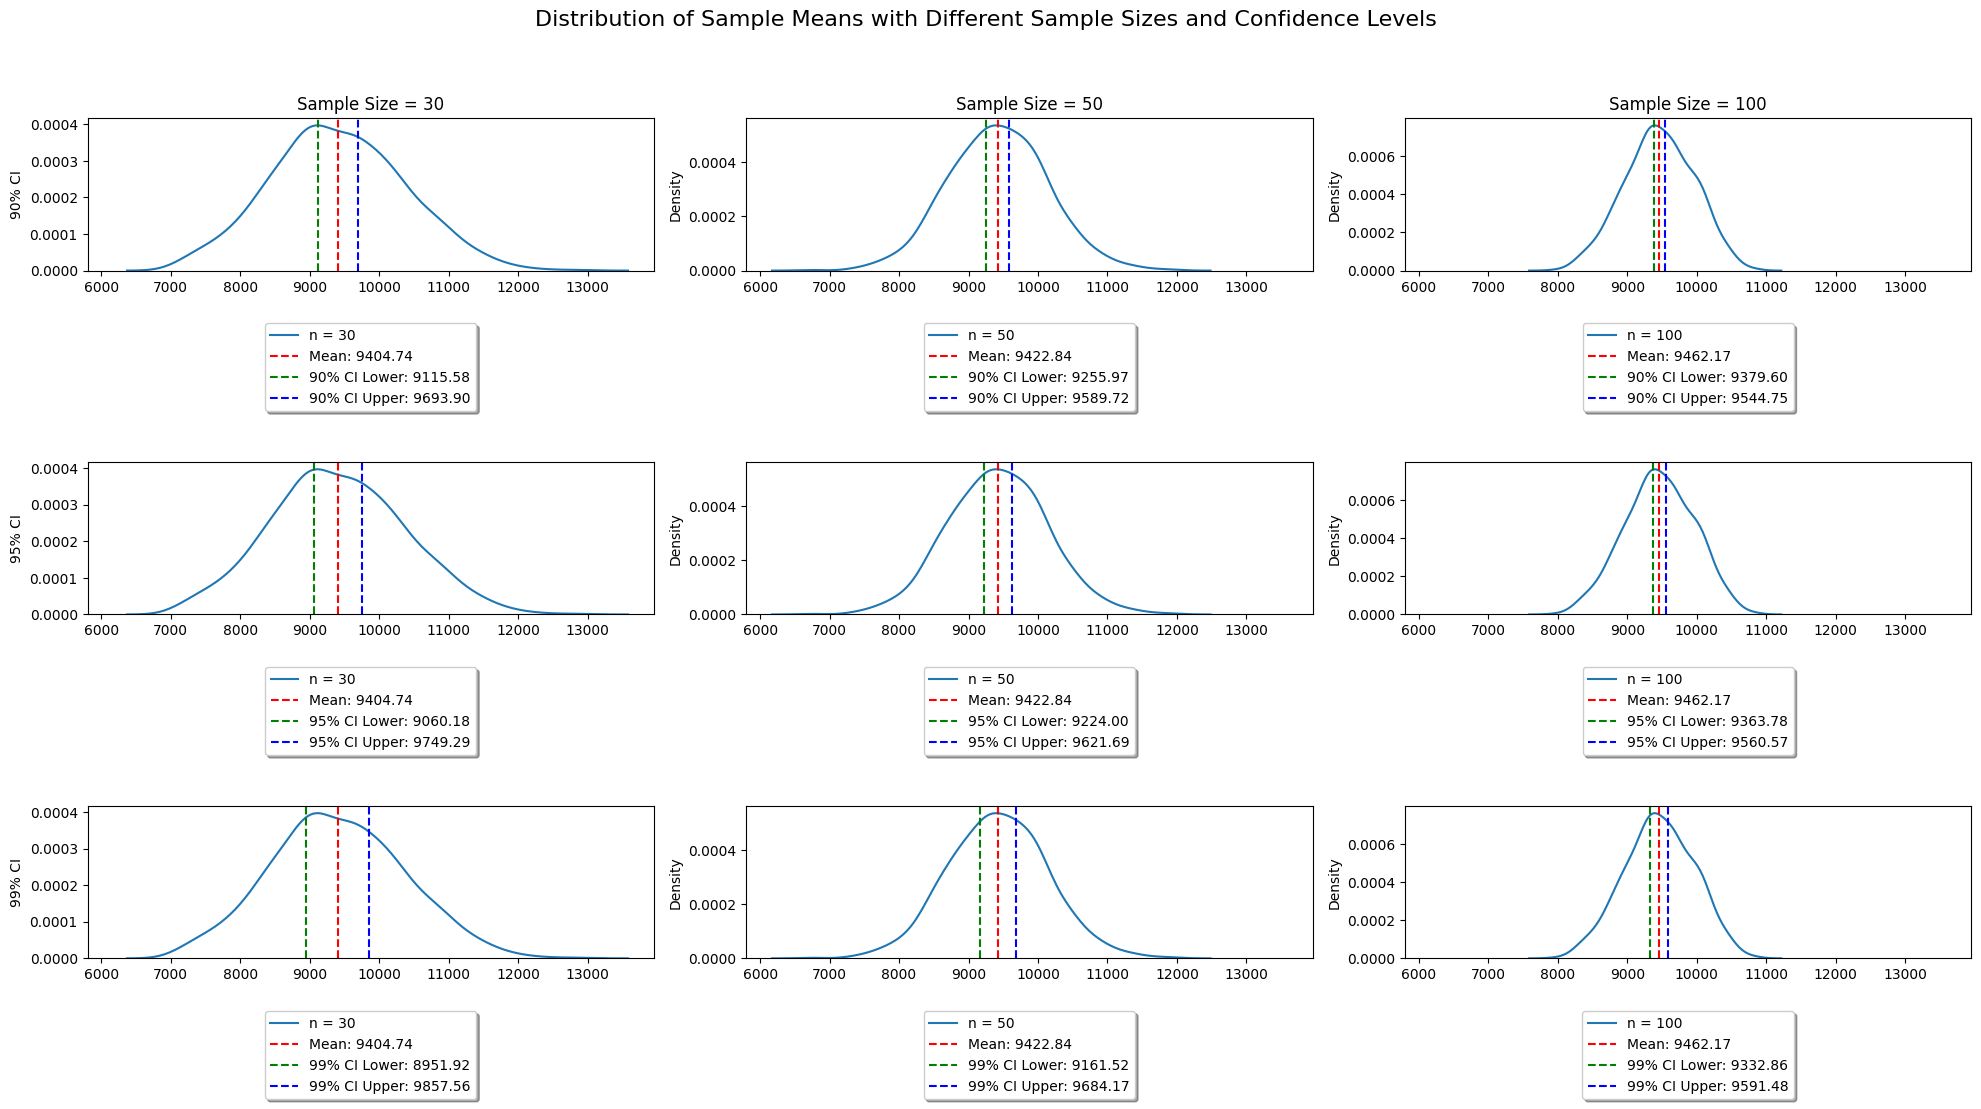

### 🟥 Confidence Level: 90% 



**Sample Size: 30**

>- **Mean of Sample Means:** 9404.74
>- **Sample Mean ± MoE at 90% confidence:** 9404.74 ± 289.16
>- **Standard Deviation of Sample Means:** 962.88


---


**Sample Size: 50**

>- **Mean of Sample Means:** 9422.84
>- **Sample Mean ± MoE at 90% confidence:** 9422.84 ± 166.88
>- **Standard Deviation of Sample Means:** 717.39


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9462.17
>- **Sample Mean ± MoE at 90% confidence:** 9462.17 ± 82.57
>- **Standard Deviation of Sample Means:** 502.01


---

### 🟥 Confidence Level: 95% 



**Sample Size: 30**

>- **Mean of Sample Means:** 9404.74
>- **Sample Mean ± MoE at 95% confidence:** 9404.74 ± 344.55
>- **Standard Deviation of Sample Means:** 962.88


---


**Sample Size: 50**

>- **Mean of Sample Means:** 9422.84
>- **Sample Mean ± MoE at 95% confidence:** 9422.84 ± 198.85
>- **Standard Deviation of Sample Means:** 717.39


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9462.17
>- **Sample Mean ± MoE at 95% confidence:** 9462.17 ± 98.39
>- **Standard Deviation of Sample Means:** 502.01


---

### 🟥 Confidence Level: 99% 



**Sample Size: 30**

>- **Mean of Sample Means:** 9404.74
>- **Sample Mean ± MoE at 99% confidence:** 9404.74 ± 452.82
>- **Standard Deviation of Sample Means:** 962.88


---


**Sample Size: 50**

>- **Mean of Sample Means:** 9422.84
>- **Sample Mean ± MoE at 99% confidence:** 9422.84 ± 261.33
>- **Standard Deviation of Sample Means:** 717.39


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9462.17
>- **Sample Mean ± MoE at 99% confidence:** 9462.17 ± 129.31
>- **Standard Deviation of Sample Means:** 502.01


---

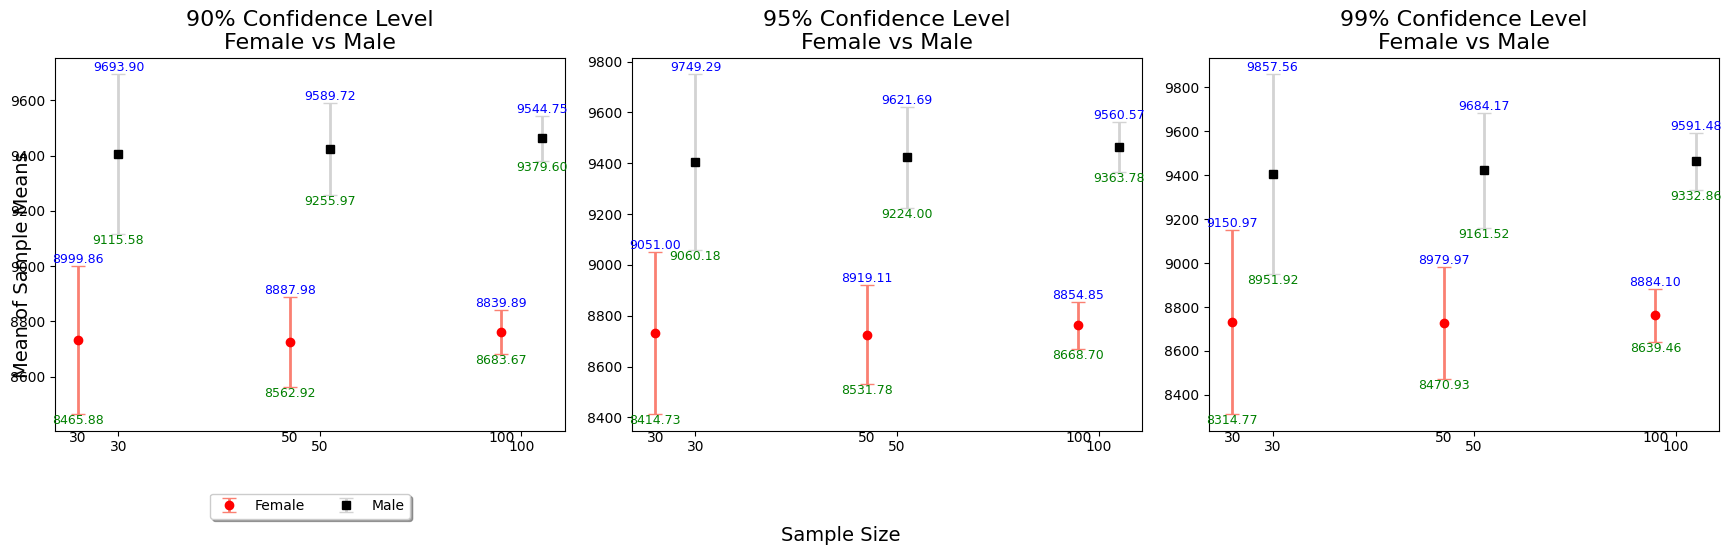

In [42]:
num_iterations = 1000
sample_sizes = [30, 50, 100]
confidence_levels = [0.90, 0.95, 0.99]

category_col = "Gender"

analyze_sample_means_by_category(num_iterations, 
                                 sample_sizes, 
                                 confidence_levels, 
                                 df, 
                                 category_col)


From the above Overlap Analysis of confidence interval, we have found that that confidence intervals for the purchase patterns of males and females do not generally overlap, except at a 99% confidence interval with a sample size of 30. This suggests a significant difference in purchase patterns between genders. 

---

**Summary of Overlap Confidence Interval Analysis on Gender Variable:**

1. **90% and 95% Confidence Intervals:**
   - The confidence intervals for male and female purchase patterns do not overlap.
   - This indicates a clear distinction between the purchase behaviors of males and females.

2. **99% Confidence Interval:**
   - At a sample size of 30, the confidence intervals for males and females overlap.
   - For other sample sizes, the 99% confidence intervals do not overlap.

**Conclusion:**
- The purchase patterns of females are significantly different from those of males, with the exception of a small overlap at the 99% confidence interval for a sample size of 30. This suggests a notable difference in purchasing behavior between genders. 

- But to test the significance of the of the result, we have to perfrom statistical test.

🟦 <b>Test for Normality</b> - Gender vs Purchase

In [43]:
from scipy.stats import shapiro

female_data = df[df['Gender'] == 'Female']['Purchase']
male_data = df[df['Gender'] == 'Male']['Purchase']

shapiro_male = shapiro(male_data)
shapiro_female = shapiro(female_data)

alpha = 0.05

# Hypotheses
Ho = "The distribution of purchase patterns is normally distributed."
Ha = "The distribution of purchase patterns is not normally distributed."

if shapiro_male.pvalue < alpha:
    print("Reject the null hypothesis (H₀) for male data.")
    print(f"Conclusion: {Ha}")
else:
    print("Fail to reject the null hypothesis (H₀) for male data.")
    print(f"Conclusion: {Ho}")

if shapiro_female.pvalue < alpha:
    print("Reject the null hypothesis (H₀) for female data.")
    print(f"Conclusion: {Ha}")
else:
    print("Fail to reject the null hypothesis (H₀) for female data.")
    print(f"Conclusion: {Ho}")

Reject the null hypothesis (H₀) for male data.
Conclusion: The distribution of purchase patterns is not normally distributed.
Reject the null hypothesis (H₀) for female data.
Conclusion: The distribution of purchase patterns is not normally distributed.


🟦 <b>Test for homogeneity of Variance </b> - Gender vs Purchase

In [44]:
from scipy.stats import levene

female_data = df[df['Gender'] == 'Female']['Purchase']
male_data = df[df['Gender'] == 'Male']['Purchase']

levene_test = levene(male_data, female_data)

# Chosen significance level (alpha)
alpha = 0.05

# Hypotheses
Ho = "Variances are equal."
Ha = "Variances are not equal."


if levene_test.pvalue < alpha:
    print("Reject the null hypothesis (H₀).")
    print(f"Conclusion: {Ha}")
else:
    print("Fail to reject the null hypothesis (H₀).")
    print(f"Conclusion: {Ho}")

Reject the null hypothesis (H₀).
Conclusion: Variances are not equal.


In [45]:
from scipy.stats import kstest

female_data = df[df['Gender'] == 'Female']['Purchase']
male_data = df[df['Gender'] == 'Male']['Purchase']

Ho = "The distributions of purchase patterns between males and females are not significantly different."
Ha = "The distributions of purchase patterns between males and females are significantly different."

statistic, p_value = kstest(male_data, female_data)
print(f"KS Statistic: {statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05

# Interpretation of the results
if p_value < alpha:
    print("Reject the null hypothesis (H₀).")
    print(f"Conclusion:", Ha)
else:
    print("Fail to reject the null hypothesis (H₀).")
    print(f"Conclusion:", Ho)    


KS Statistic: 0.08316914937650632
P-Value: 0.0
Reject the null hypothesis (H₀).
Conclusion: The distributions of purchase patterns between males and females are significantly different.


>**Conclusion**: Thus, the ksresult aligns with our findings from the confidence interval overlap analysis, indicating that the purchase patterns between males and females are significantly different.

**| Applying CLT - Estimating CI and Performing An Overlapping Analysis on Marital_Status Variable**

# Married Customers 👨‍👩‍👧‍👦

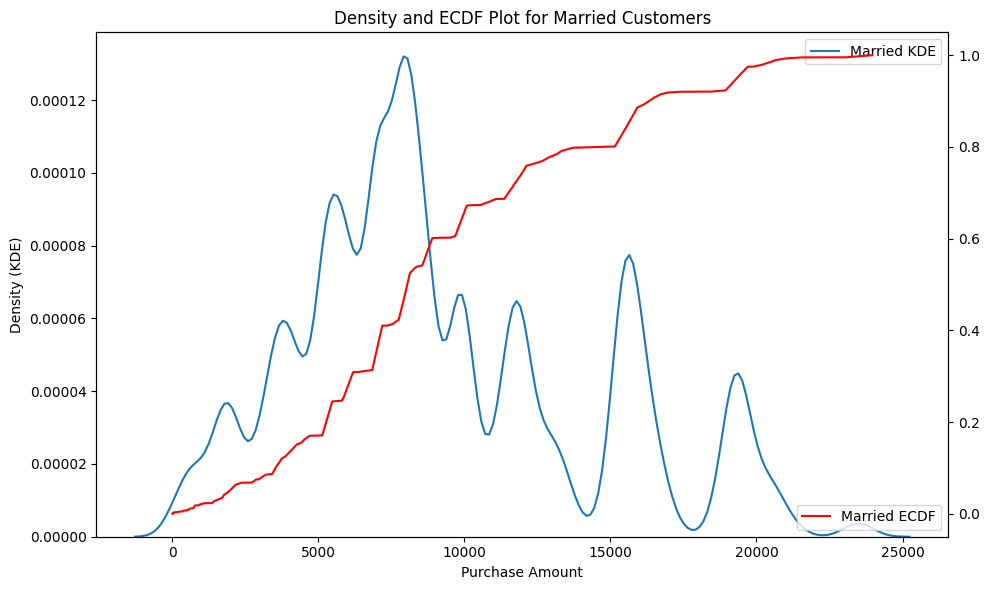

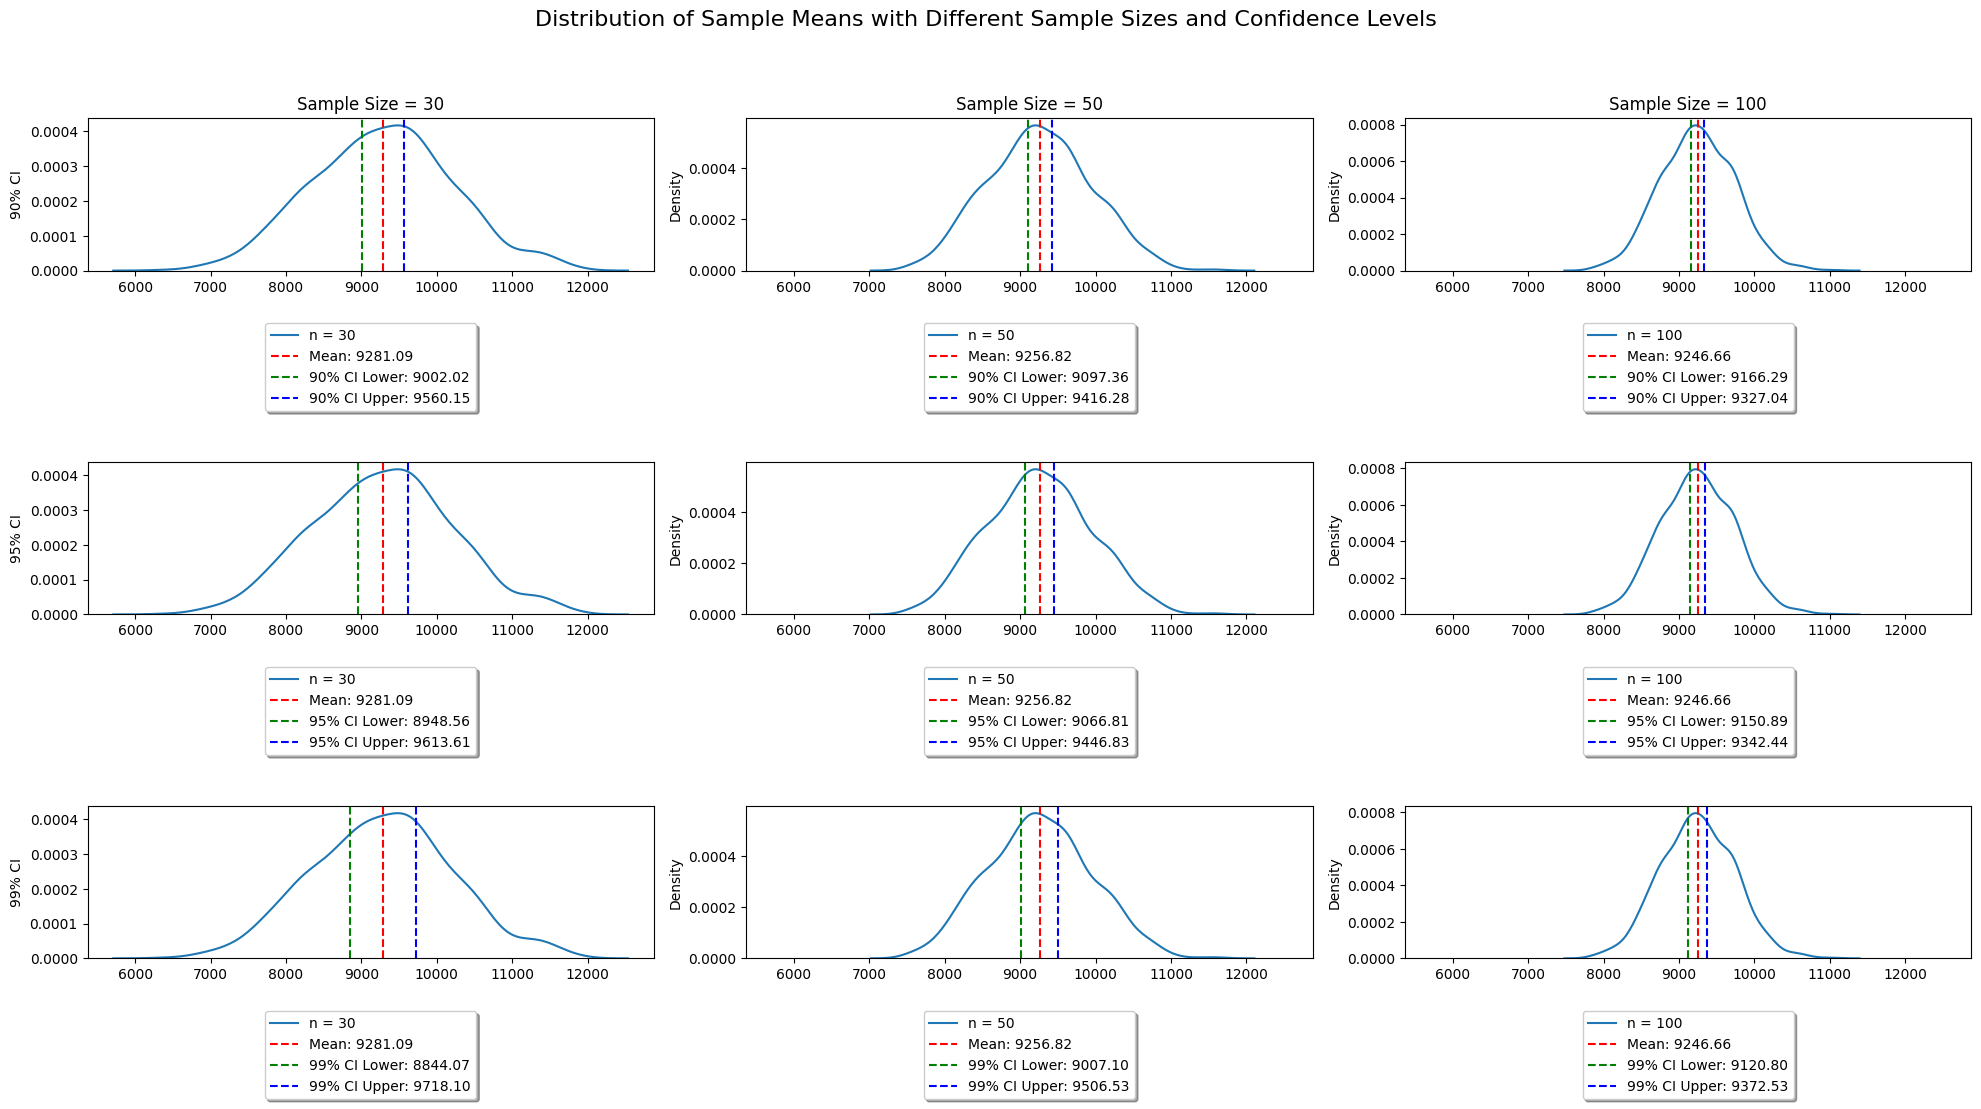

### 🟥 Confidence Level: 90% 



**Sample Size: 30**

>- **Mean of Sample Means:** 9281.09
>- **Sample Mean ± MoE at 90% confidence:** 9281.09 ± 279.07
>- **Standard Deviation of Sample Means:** 929.26


---


**Sample Size: 50**

>- **Mean of Sample Means:** 9256.82
>- **Sample Mean ± MoE at 90% confidence:** 9256.82 ± 159.46
>- **Standard Deviation of Sample Means:** 685.51


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9246.66
>- **Sample Mean ± MoE at 90% confidence:** 9246.66 ± 80.37
>- **Standard Deviation of Sample Means:** 488.64


---

### 🟥 Confidence Level: 95% 



**Sample Size: 30**

>- **Mean of Sample Means:** 9281.09
>- **Sample Mean ± MoE at 95% confidence:** 9281.09 ± 332.53
>- **Standard Deviation of Sample Means:** 929.26


---


**Sample Size: 50**

>- **Mean of Sample Means:** 9256.82
>- **Sample Mean ± MoE at 95% confidence:** 9256.82 ± 190.01
>- **Standard Deviation of Sample Means:** 685.51


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9246.66
>- **Sample Mean ± MoE at 95% confidence:** 9246.66 ± 95.77
>- **Standard Deviation of Sample Means:** 488.64


---

### 🟥 Confidence Level: 99% 



**Sample Size: 30**

>- **Mean of Sample Means:** 9281.09
>- **Sample Mean ± MoE at 99% confidence:** 9281.09 ± 437.01
>- **Standard Deviation of Sample Means:** 929.26


---


**Sample Size: 50**

>- **Mean of Sample Means:** 9256.82
>- **Sample Mean ± MoE at 99% confidence:** 9256.82 ± 249.71
>- **Standard Deviation of Sample Means:** 685.51


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9246.66
>- **Sample Mean ± MoE at 99% confidence:** 9246.66 ± 125.86
>- **Standard Deviation of Sample Means:** 488.64


---

# Unmarried Customers 👨‍👩‍👧‍👦

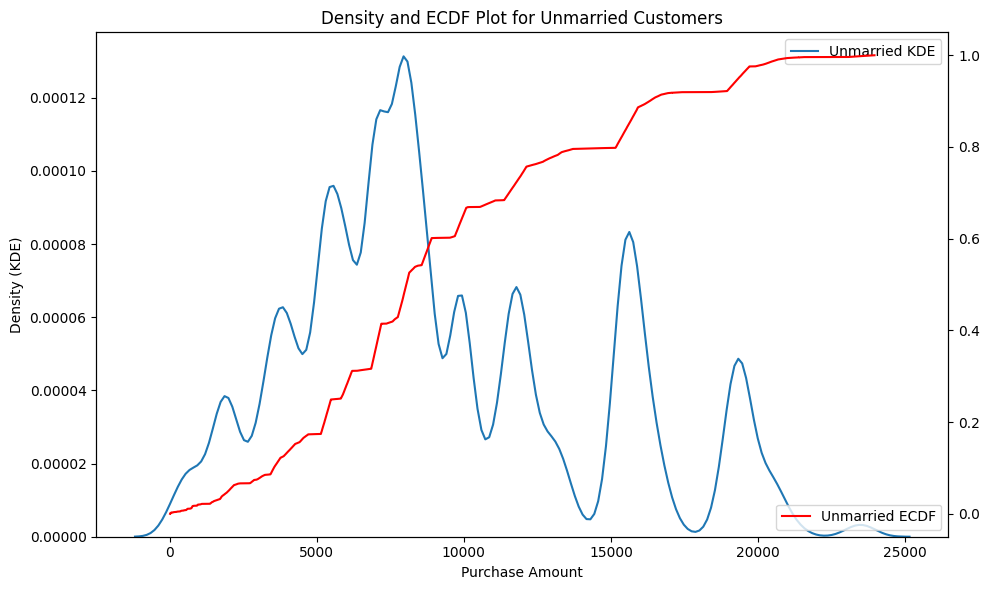

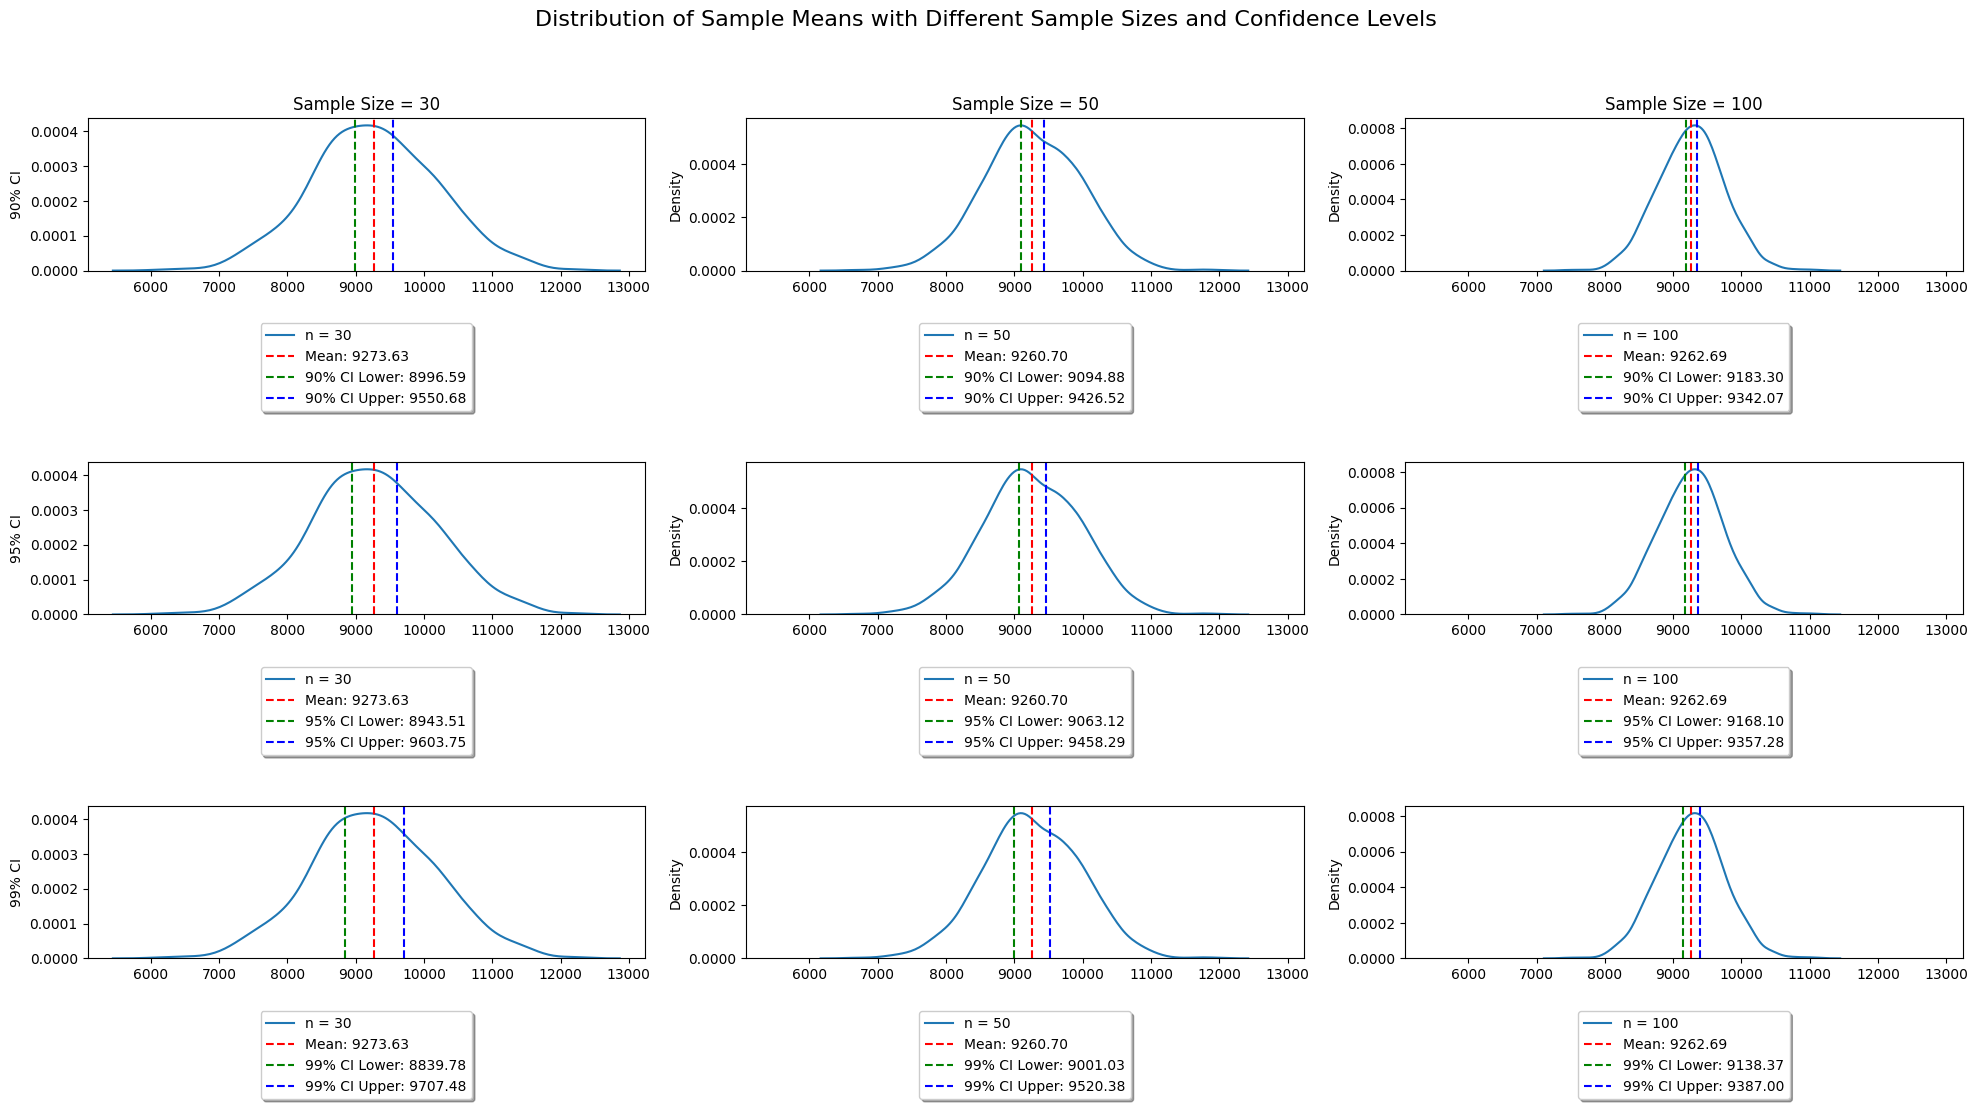

### 🟥 Confidence Level: 90% 



**Sample Size: 30**

>- **Mean of Sample Means:** 9273.63
>- **Sample Mean ± MoE at 90% confidence:** 9273.63 ± 277.04
>- **Standard Deviation of Sample Means:** 922.54


---


**Sample Size: 50**

>- **Mean of Sample Means:** 9260.70
>- **Sample Mean ± MoE at 90% confidence:** 9260.70 ± 165.82
>- **Standard Deviation of Sample Means:** 712.85


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9262.69
>- **Sample Mean ± MoE at 90% confidence:** 9262.69 ± 79.38
>- **Standard Deviation of Sample Means:** 482.62


---

### 🟥 Confidence Level: 95% 



**Sample Size: 30**

>- **Mean of Sample Means:** 9273.63
>- **Sample Mean ± MoE at 95% confidence:** 9273.63 ± 330.12
>- **Standard Deviation of Sample Means:** 922.54


---


**Sample Size: 50**

>- **Mean of Sample Means:** 9260.70
>- **Sample Mean ± MoE at 95% confidence:** 9260.70 ± 197.59
>- **Standard Deviation of Sample Means:** 712.85


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9262.69
>- **Sample Mean ± MoE at 95% confidence:** 9262.69 ± 94.59
>- **Standard Deviation of Sample Means:** 482.62


---

### 🟥 Confidence Level: 99% 



**Sample Size: 30**

>- **Mean of Sample Means:** 9273.63
>- **Sample Mean ± MoE at 99% confidence:** 9273.63 ± 433.85
>- **Standard Deviation of Sample Means:** 922.54


---


**Sample Size: 50**

>- **Mean of Sample Means:** 9260.70
>- **Sample Mean ± MoE at 99% confidence:** 9260.70 ± 259.67
>- **Standard Deviation of Sample Means:** 712.85


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9262.69
>- **Sample Mean ± MoE at 99% confidence:** 9262.69 ± 124.31
>- **Standard Deviation of Sample Means:** 482.62


---

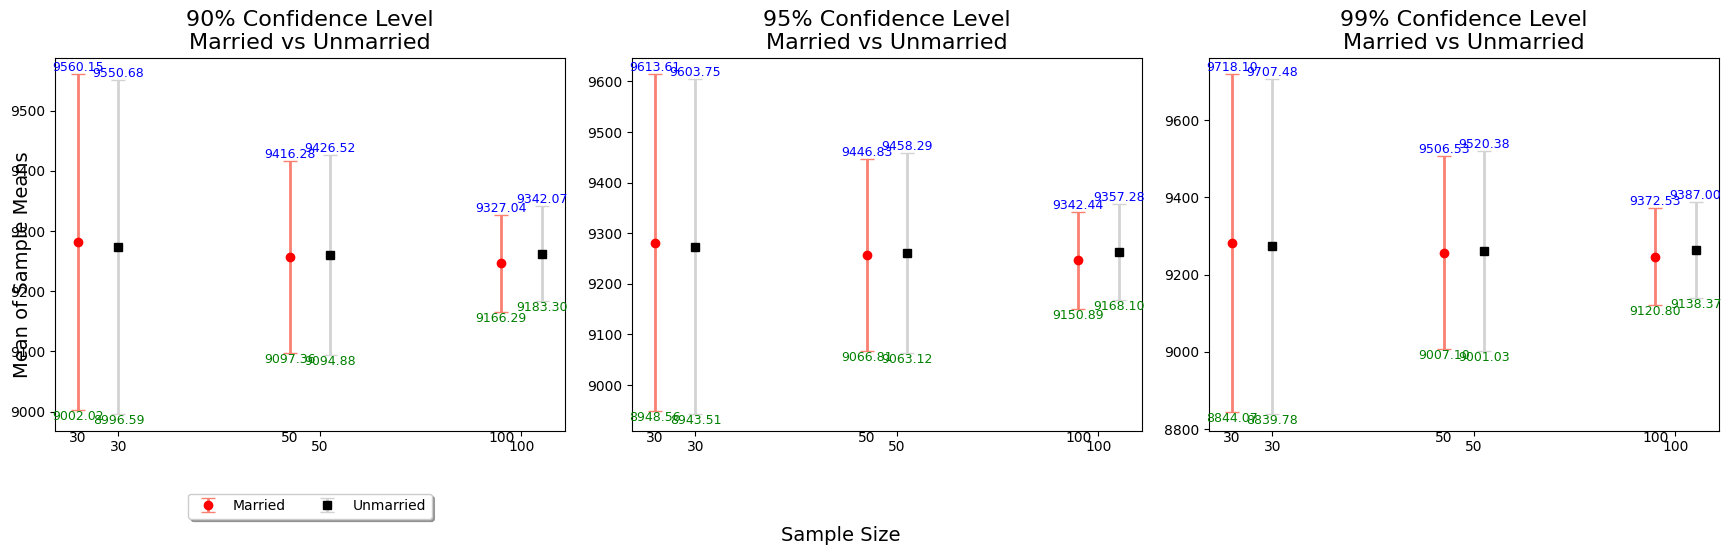

In [46]:
num_iterations = 1000
sample_sizes = [30, 50, 100]
confidence_levels = [0.90, 0.95, 0.99]

category_col = "Marital_Status"

analyze_sample_means_by_category(num_iterations, 
                                 sample_sizes, 
                                 confidence_levels, 
                                 df, 
                                 category_col)

### Analysis of Confidence Interval Overlaps Between Married and Unmarried Customers

**90% Confidence Level**
- **Overlap:** Confidence intervals overlap for both married and unmarried customers across all sample sizes (30, 50, and 100).

**95% Confidence Level**
- **Overlap:** Similar to the 90% confidence level, confidence intervals overlap for both groups across all sample sizes.

**99% Confidence Level**
- **Overlap:** Even at the highest confidence level, there is overlap in confidence intervals for both married and unmarried customers, particularly noticeable at larger sample sizes (50 and 100).

**Conclusion**

- The Overlap of CI suggests that based on the given data, there may not be statistically significant differences in spending behaviors between these customer groups at the specified confidence levels.

- Further in-depth statistical analysis would be necessary to draw more definitive conclusions about the spending patterns of married versus unmarried customers.

🟦 <b>Test for Normality</b> - Marital_Status vs Purchase

In [47]:
from scipy.stats import shapiro

married_data = df[df['Marital_Status'] == 'Married']['Purchase']
unmarried_data = df[df['Marital_Status'] == 'Unmarried']['Purchase']

alpha = 0.05

# Hypotheses
Ho = "The distribution of purchase patterns is normally distributed."
Ha = "The distribution of purchase patterns is not normally distributed."

# Shapiro-Wilk test for Married customers
shapiro_married = shapiro(married_data)
if shapiro_married.pvalue < alpha:
    print("Reject the null hypothesis (H₀) for married customers.")
    print(f"Conclusion: {Ha}")
else:
    print("Fail to reject the null hypothesis (H₀) for married customers.")
    print(f"Conclusion: {Ho}")

# Shapiro-Wilk test for Unmarried customers
shapiro_unmarried = shapiro(unmarried_data)
if shapiro_unmarried.pvalue < alpha:
    print("Reject the null hypothesis (H₀) for unmarried customers.")
    print(f"Conclusion: {Ha}")
else:
    print("Fail to reject the null hypothesis (H₀) for unmarried customers.")
    print(f"Conclusion: {Ho}")


Reject the null hypothesis (H₀) for married customers.
Conclusion: The distribution of purchase patterns is not normally distributed.
Reject the null hypothesis (H₀) for unmarried customers.
Conclusion: The distribution of purchase patterns is not normally distributed.


🟦 <b>Test for homogeneity of Variance </b> - Marital_Status vs Purchase

In [48]:
from scipy.stats import levene

married_data = df[df['Marital_Status'] == 'Married']['Purchase']
unmarried_data = df[df['Marital_Status'] != 'Married']['Purchase']

levene_test = levene(married_data, unmarried_data)

# Chosen significance level (alpha)
alpha = 0.05

# Hypotheses
Ho = "Variances of purchase patterns between married and unmarried customers are equal."
Ha = "Variances of purchase patterns between married and unmarried customers are not equal."

if levene_test.pvalue < alpha:
    print("Reject the null hypothesis (H₀).")
    print(f"Conclusion: {Ha}")
else:
    print("Fail to reject the null hypothesis (H₀).")
    print(f"Conclusion: {Ho}")


Reject the null hypothesis (H₀).
Conclusion: Variances of purchase patterns between married and unmarried customers are not equal.


>Since, the data is not Gaussian and doesn't have equal variance, we shall apply kstest

In [49]:
from scipy.stats import kstest, ttest_ind

married_data = df[df['Marital_Status'] == 'Married']['Purchase']
unmarried_data = df[df['Marital_Status'] != 'Married']['Purchase']

Ho = "The distributions of purchase patterns between married and unmarried customers are not significantly different."
Ha = "The distributions of purchase patterns between married and unmarried customers are significantly different."

statistic, p_value = kstest(married_data, unmarried_data)
print(f"KS Statistic: {statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05

# Interpretation of the results
if p_value < alpha:
    print("Reject the null hypothesis (H₀).")
    print(f"Conclusion:", Ha)
else:
    print("Fail to reject the null hypothesis (H₀).")
    print(f"Conclusion:", Ho)


KS Statistic: 0.00603988109893322
P-Value: 0.00012137381557871661
Reject the null hypothesis (H₀).
Conclusion: The distributions of purchase patterns between married and unmarried customers are significantly different.


> **Conclusion:**
- The results do not align with our findings from the confidence interval overlap analysis, suggesting that these differences could be due to randomness.
- Based on the statistical KS test, we conclude that there is a significant difference in the distribution of purchase patterns between married and unmarried customers.


**| Applying CLT - Estimating CI and Performing An Overlapping Analysis on Age Variable**

In [50]:
# # df.Age.value_counts()
# df.info()

# 0-17 Customers 👨‍👩‍👧‍👦

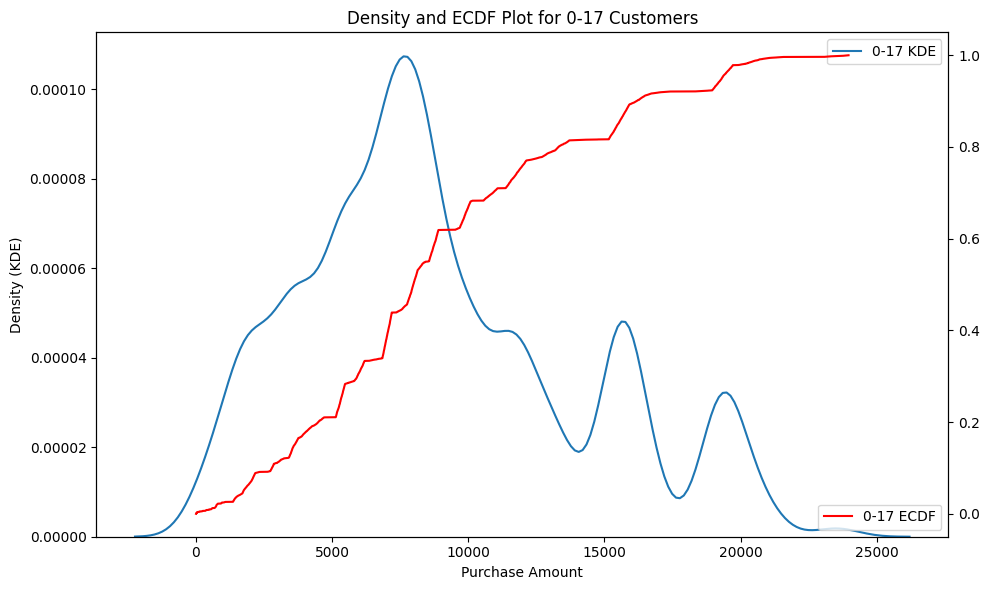

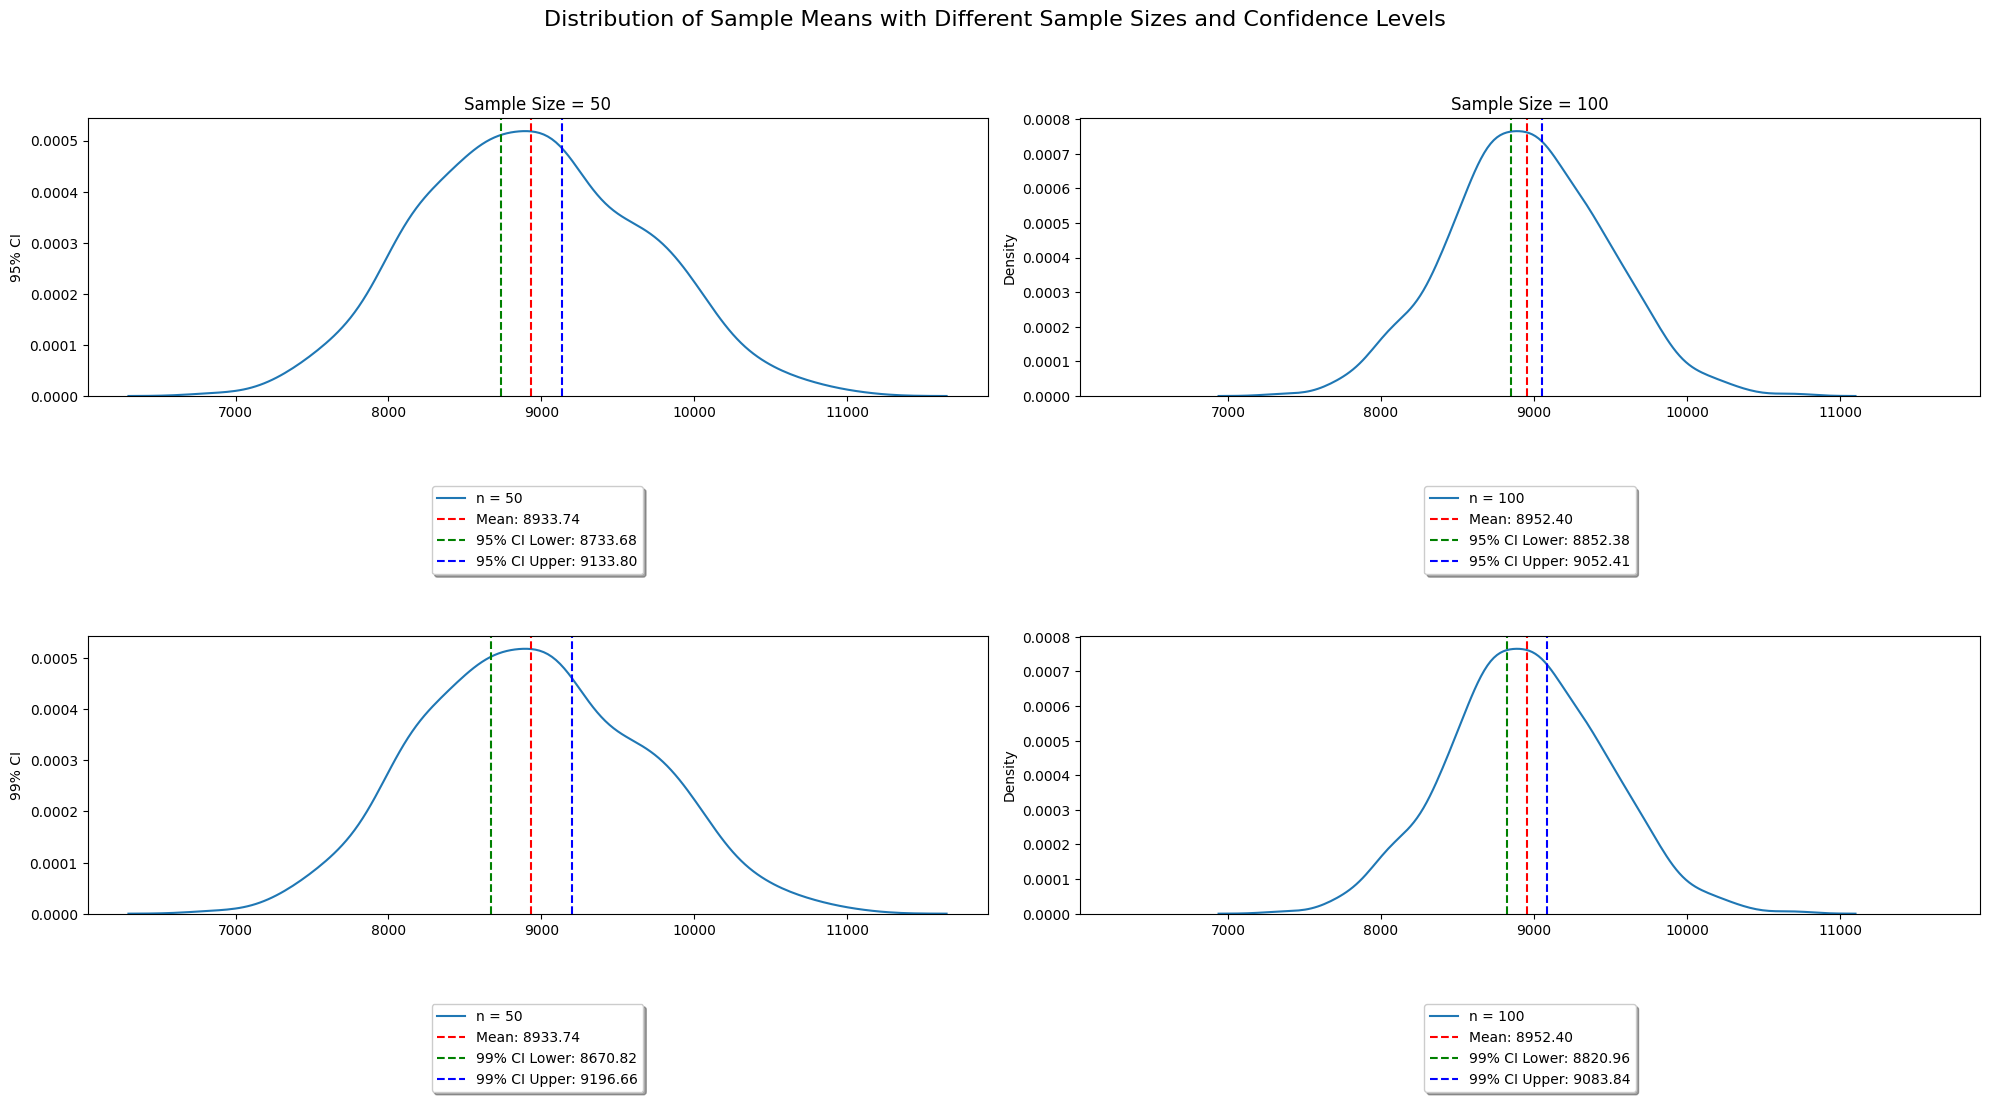

### 🟥 Confidence Level: 95% 



**Sample Size: 50**

>- **Mean of Sample Means:** 8933.74
>- **Sample Mean ± MoE at 95% confidence:** 8933.74 ± 200.06
>- **Standard Deviation of Sample Means:** 721.76


---


**Sample Size: 100**

>- **Mean of Sample Means:** 8952.40
>- **Sample Mean ± MoE at 95% confidence:** 8952.40 ± 100.01
>- **Standard Deviation of Sample Means:** 510.28


---

### 🟥 Confidence Level: 99% 



**Sample Size: 50**

>- **Mean of Sample Means:** 8933.74
>- **Sample Mean ± MoE at 99% confidence:** 8933.74 ± 262.92
>- **Standard Deviation of Sample Means:** 721.76


---


**Sample Size: 100**

>- **Mean of Sample Means:** 8952.40
>- **Sample Mean ± MoE at 99% confidence:** 8952.40 ± 131.44
>- **Standard Deviation of Sample Means:** 510.28


---

# 18-25 Customers 👨‍👩‍👧‍👦

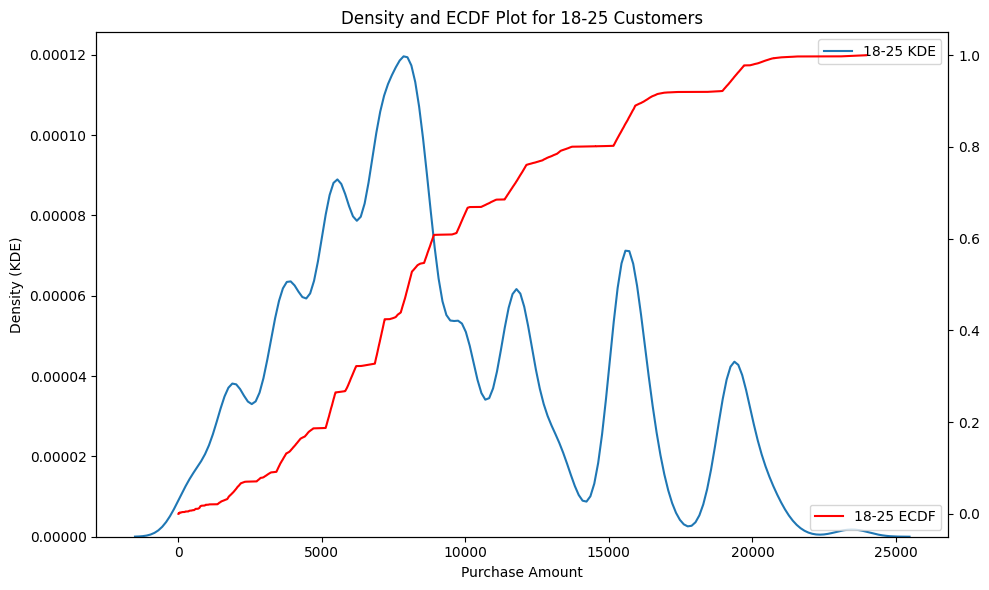

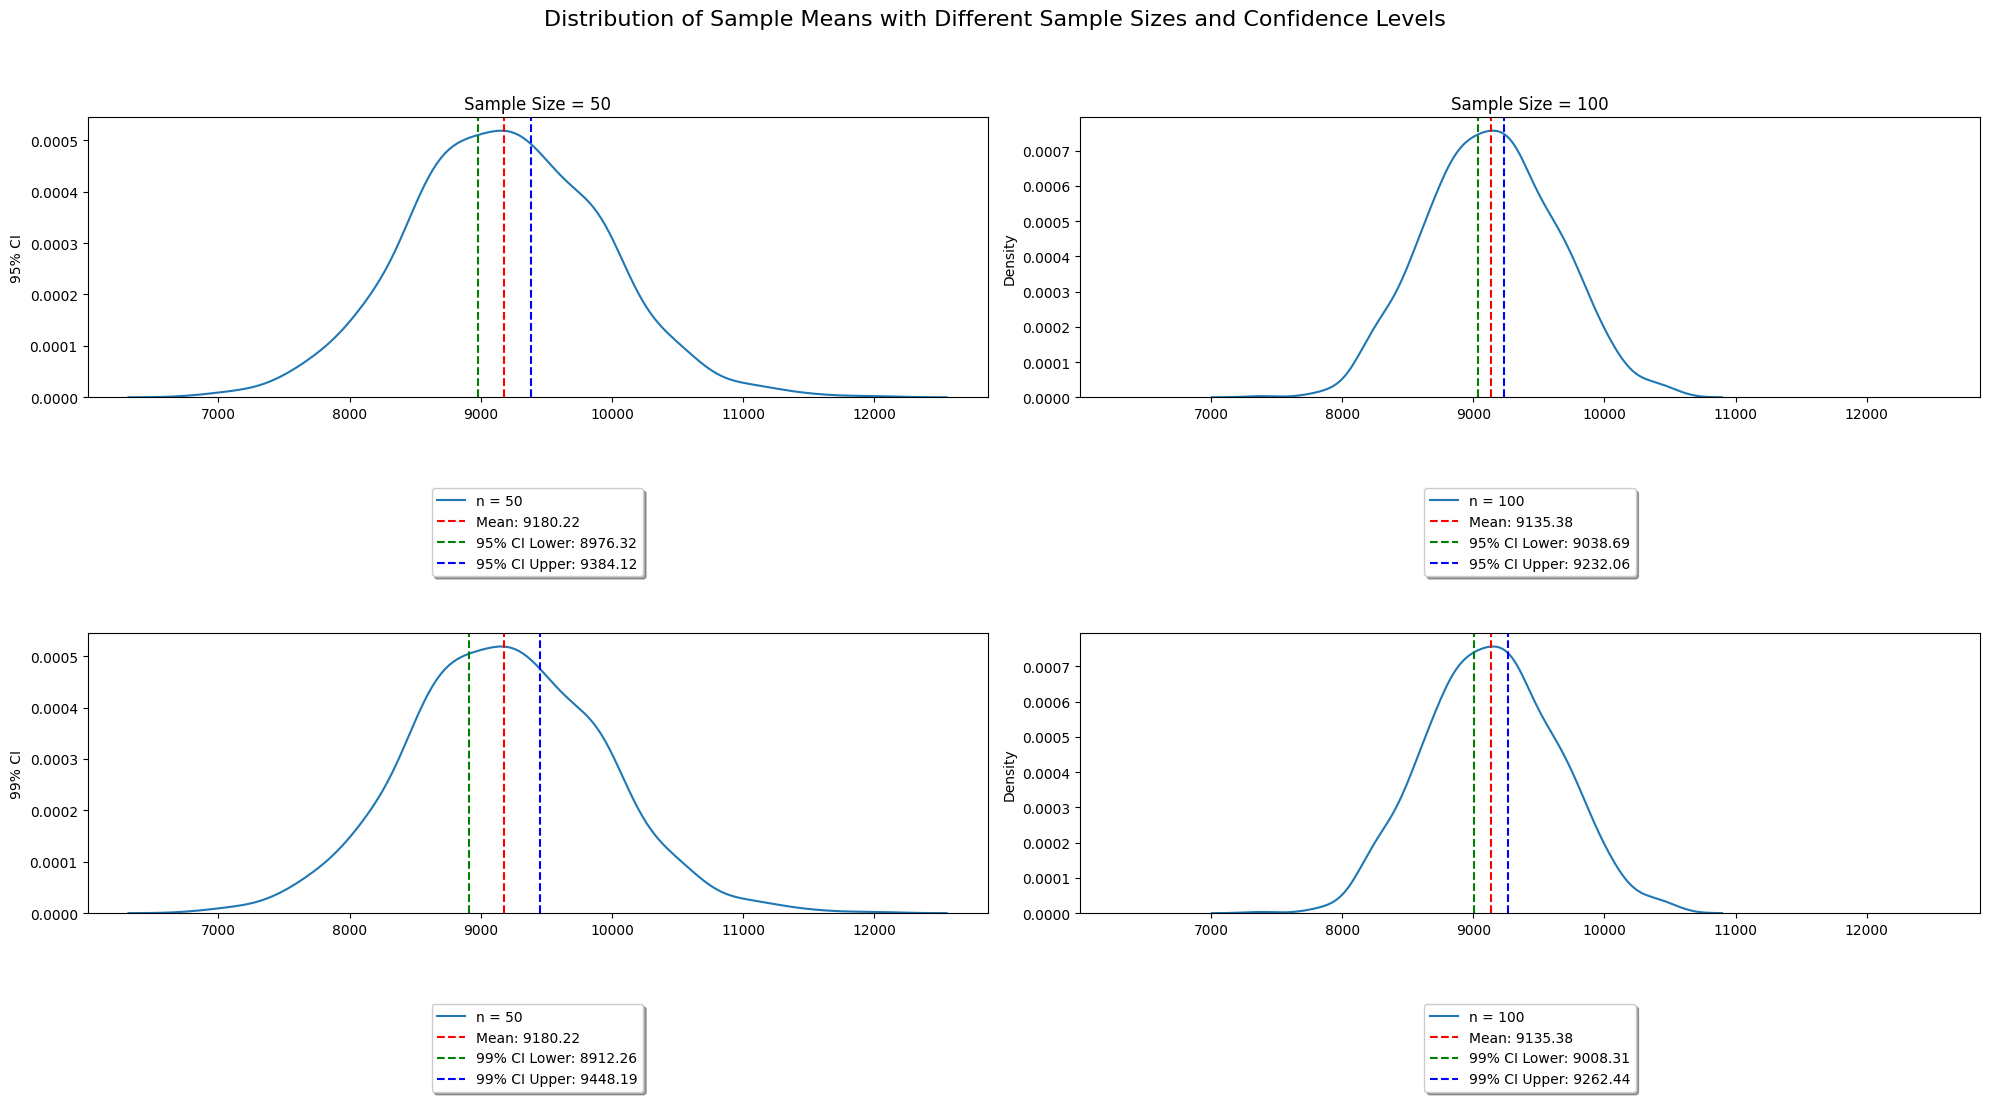

### 🟥 Confidence Level: 95% 



**Sample Size: 50**

>- **Mean of Sample Means:** 9180.22
>- **Sample Mean ± MoE at 95% confidence:** 9180.22 ± 203.90
>- **Standard Deviation of Sample Means:** 735.61


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9135.38
>- **Sample Mean ± MoE at 95% confidence:** 9135.38 ± 96.69
>- **Standard Deviation of Sample Means:** 493.30


---

### 🟥 Confidence Level: 99% 



**Sample Size: 50**

>- **Mean of Sample Means:** 9180.22
>- **Sample Mean ± MoE at 99% confidence:** 9180.22 ± 267.97
>- **Standard Deviation of Sample Means:** 735.61


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9135.38
>- **Sample Mean ± MoE at 99% confidence:** 9135.38 ± 127.07
>- **Standard Deviation of Sample Means:** 493.30


---

# 26-35 Customers 👨‍👩‍👧‍👦

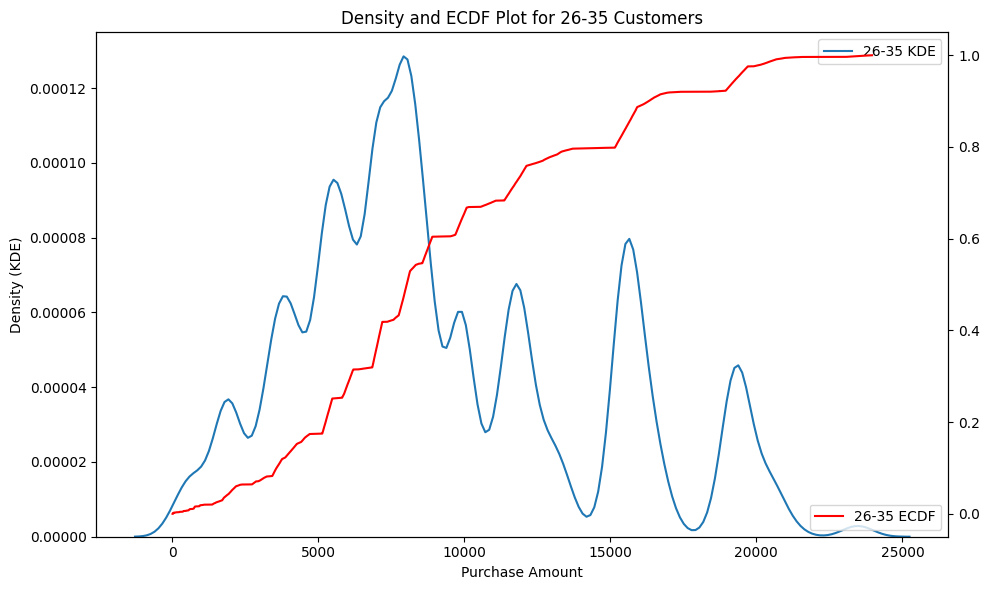

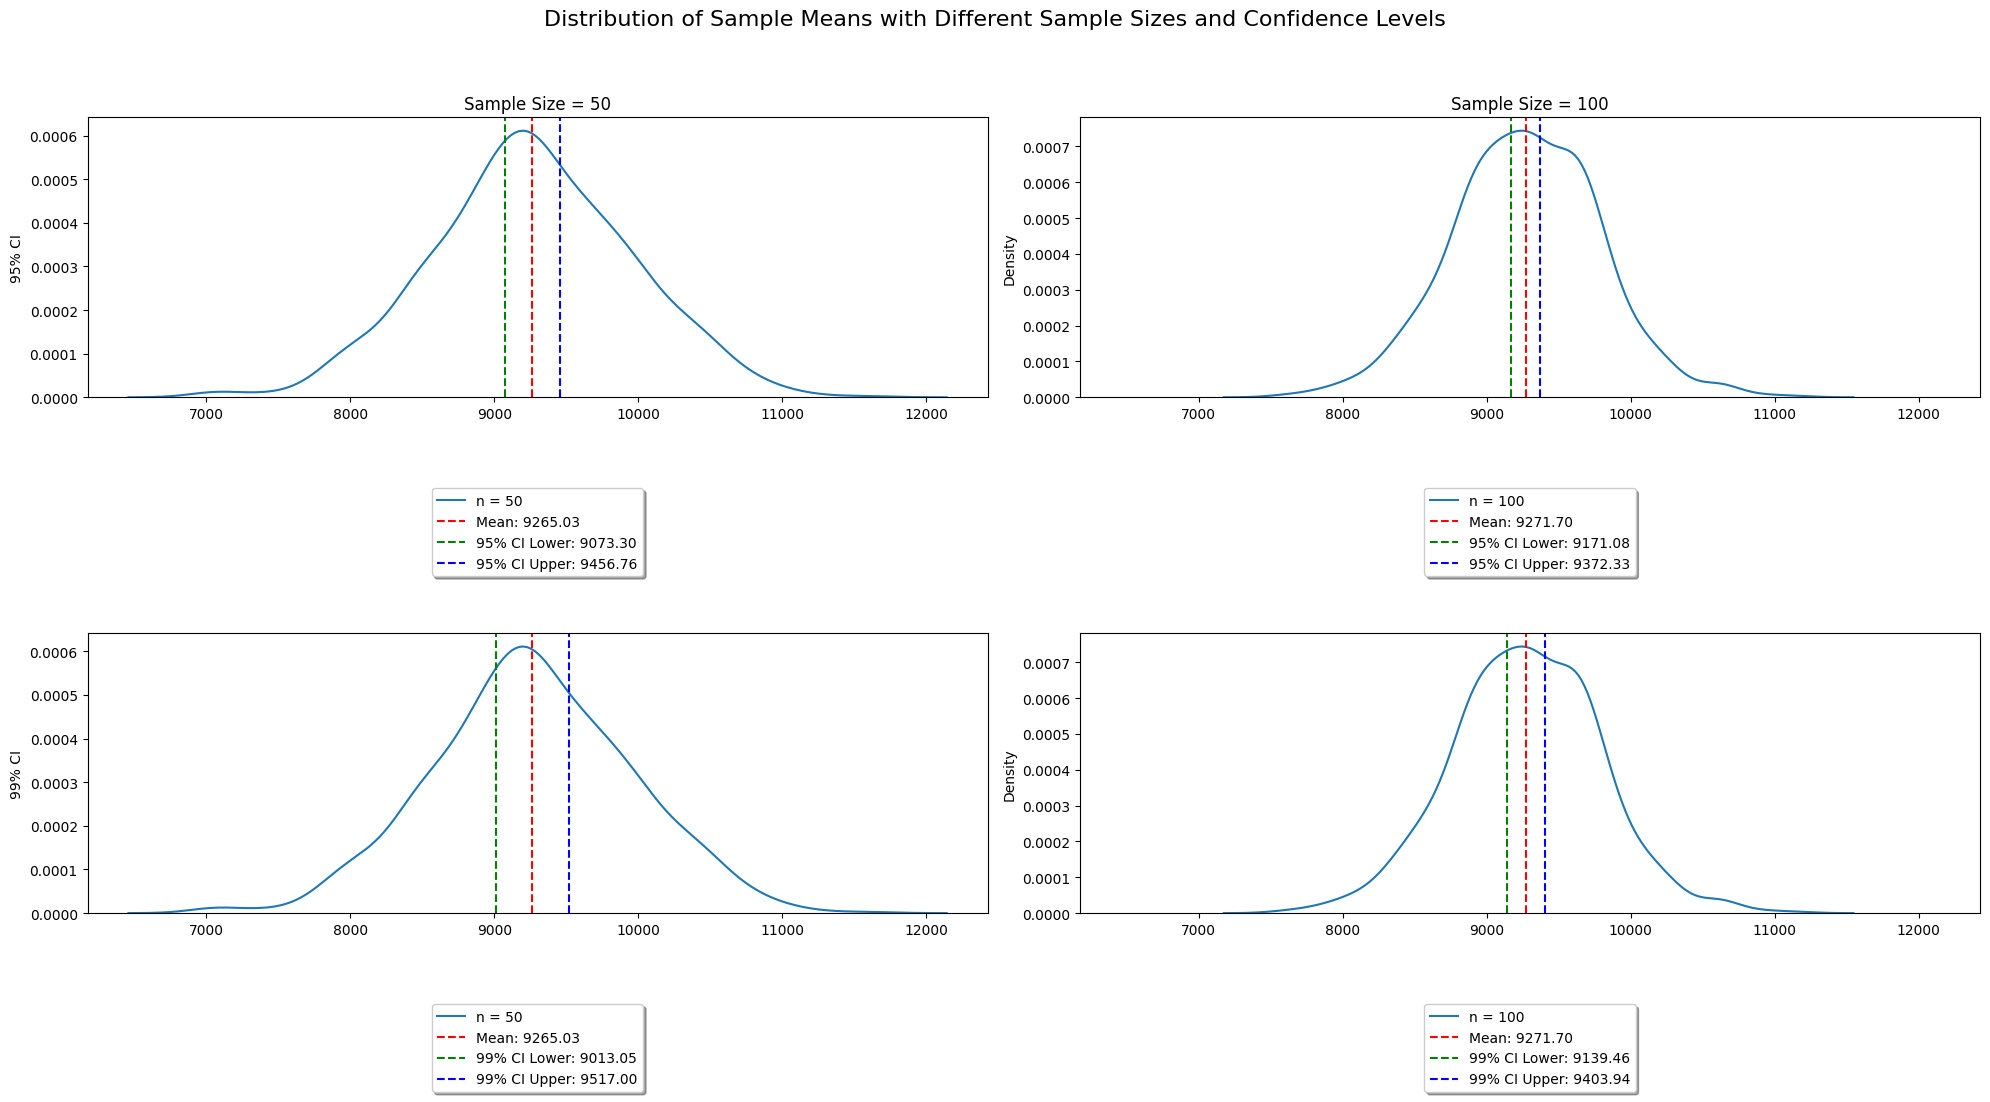

### 🟥 Confidence Level: 95% 



**Sample Size: 50**

>- **Mean of Sample Means:** 9265.03
>- **Sample Mean ± MoE at 95% confidence:** 9265.03 ± 191.73
>- **Standard Deviation of Sample Means:** 691.72


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9271.70
>- **Sample Mean ± MoE at 95% confidence:** 9271.70 ± 100.62
>- **Standard Deviation of Sample Means:** 513.40


---

### 🟥 Confidence Level: 99% 



**Sample Size: 50**

>- **Mean of Sample Means:** 9265.03
>- **Sample Mean ± MoE at 99% confidence:** 9265.03 ± 251.98
>- **Standard Deviation of Sample Means:** 691.72


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9271.70
>- **Sample Mean ± MoE at 99% confidence:** 9271.70 ± 132.24
>- **Standard Deviation of Sample Means:** 513.40


---

# 36-45 Customers 👨‍👩‍👧‍👦

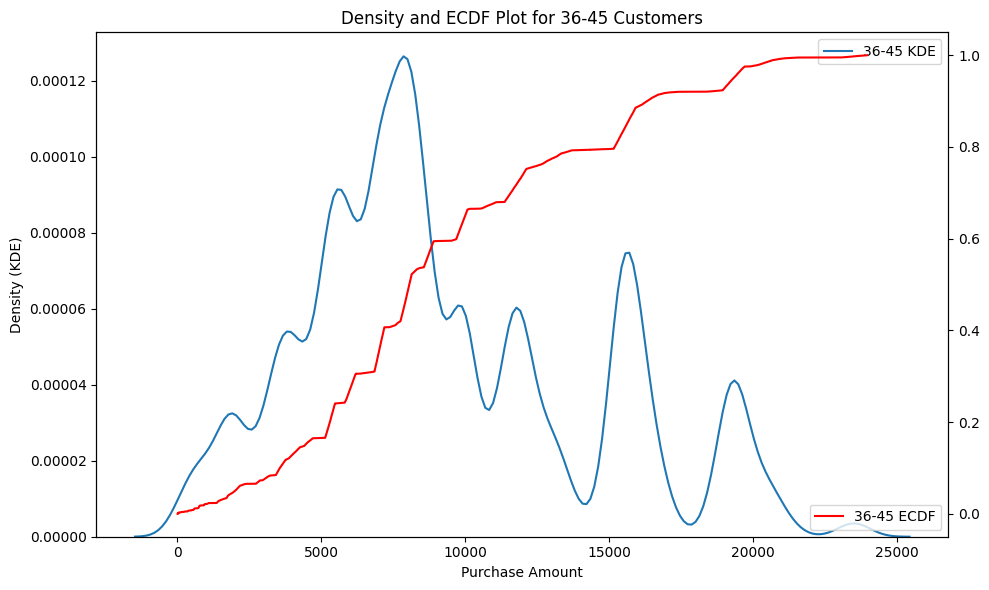

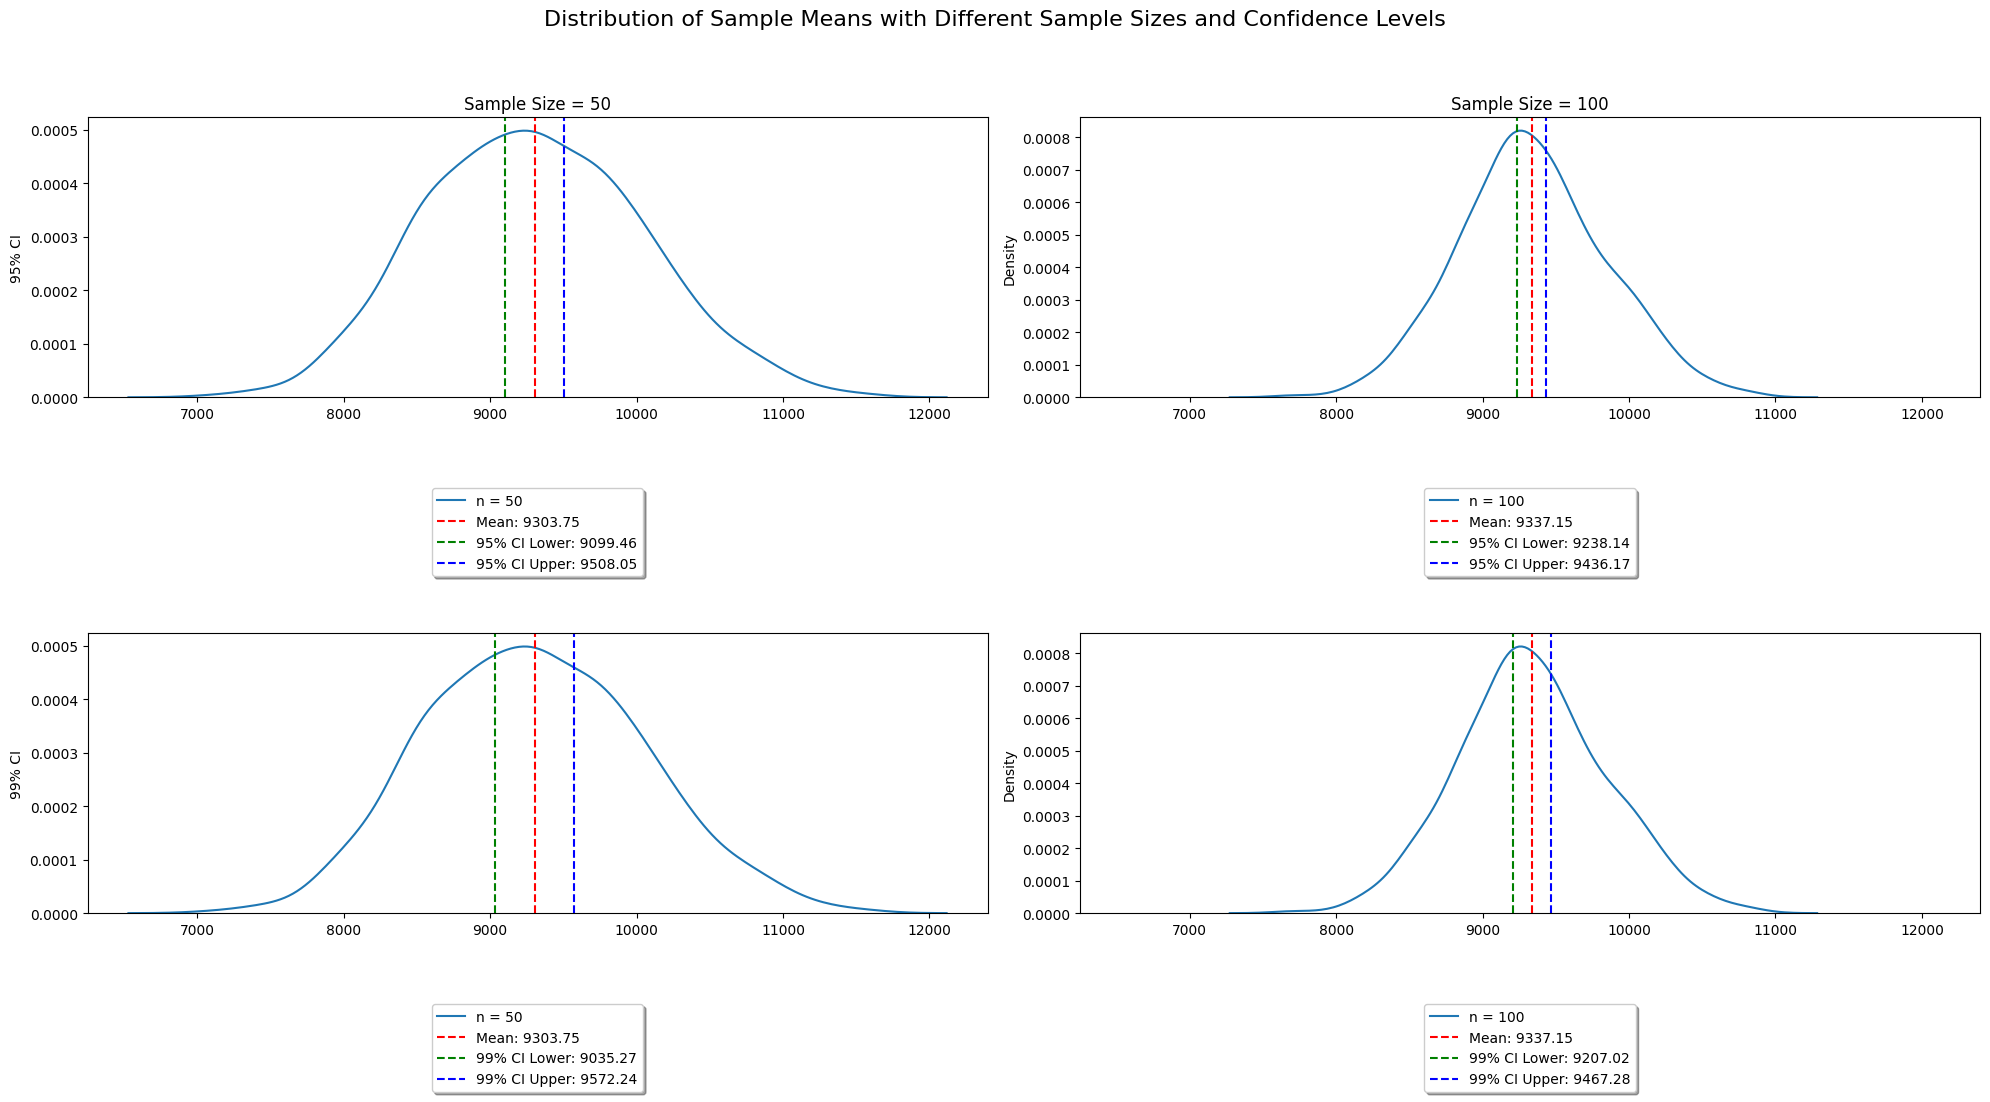

### 🟥 Confidence Level: 95% 



**Sample Size: 50**

>- **Mean of Sample Means:** 9303.75
>- **Sample Mean ± MoE at 95% confidence:** 9303.75 ± 204.29
>- **Standard Deviation of Sample Means:** 737.03


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9337.15
>- **Sample Mean ± MoE at 95% confidence:** 9337.15 ± 99.02
>- **Standard Deviation of Sample Means:** 505.19


---

### 🟥 Confidence Level: 99% 



**Sample Size: 50**

>- **Mean of Sample Means:** 9303.75
>- **Sample Mean ± MoE at 99% confidence:** 9303.75 ± 268.49
>- **Standard Deviation of Sample Means:** 737.03


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9337.15
>- **Sample Mean ± MoE at 99% confidence:** 9337.15 ± 130.13
>- **Standard Deviation of Sample Means:** 505.19


---

# 46-50 Customers 👨‍👩‍👧‍👦

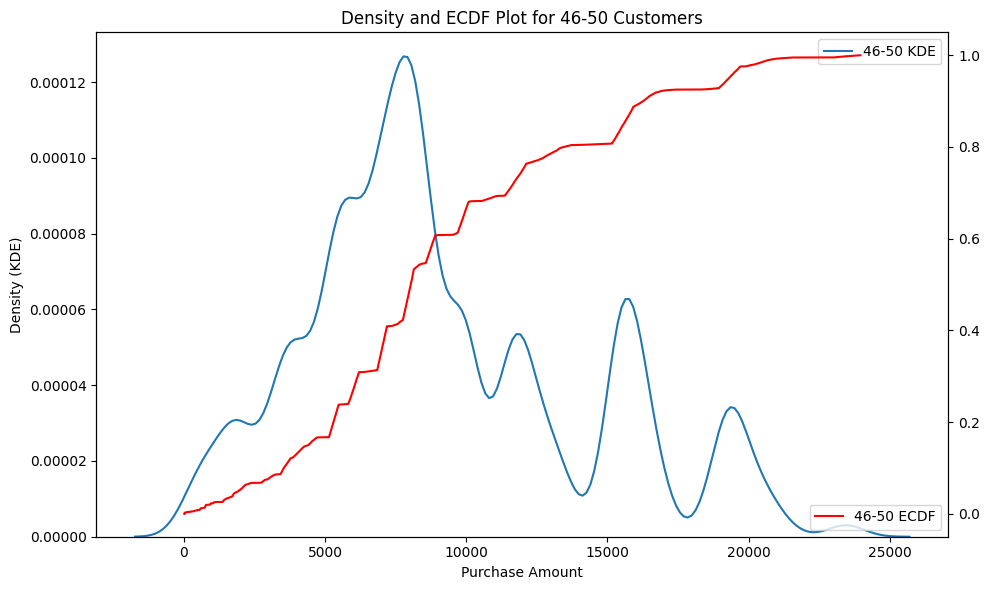

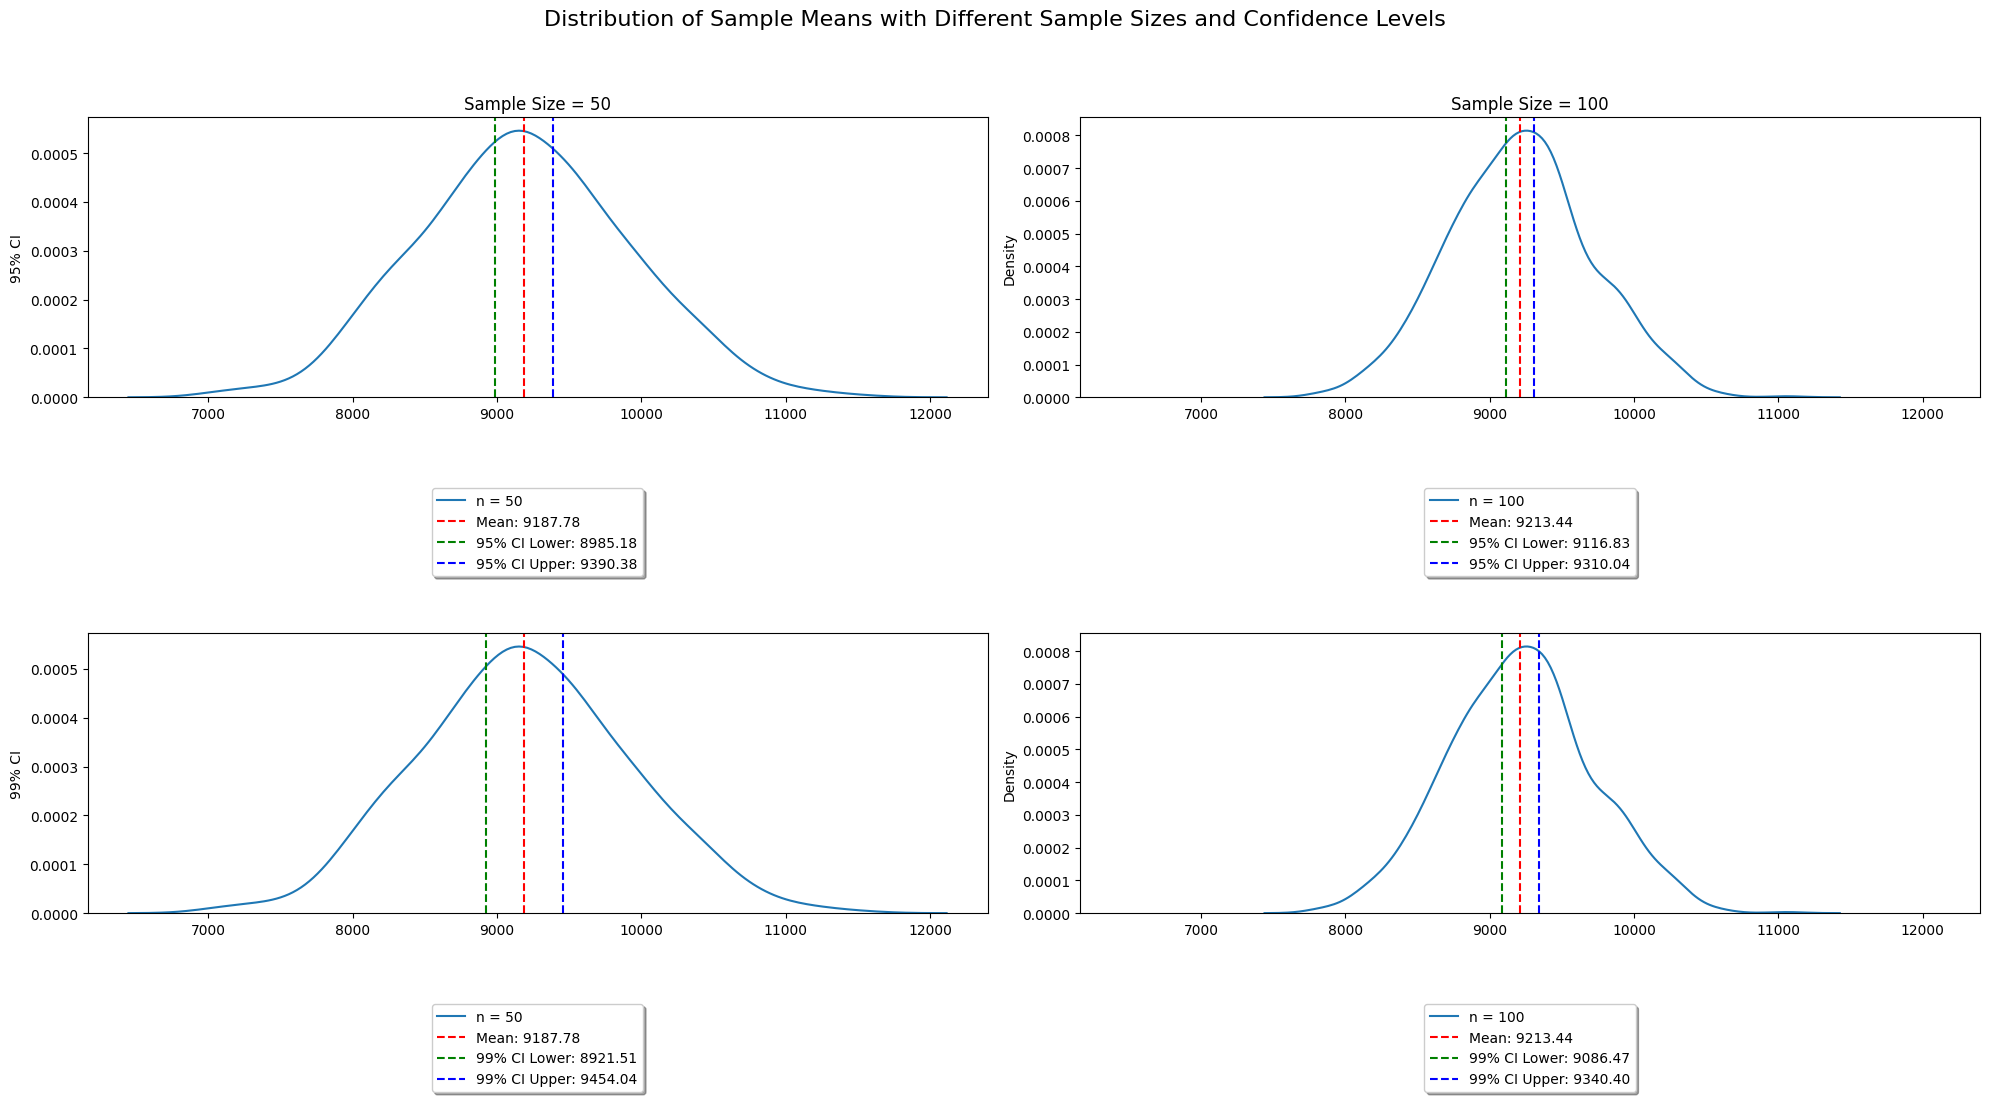

### 🟥 Confidence Level: 95% 



**Sample Size: 50**

>- **Mean of Sample Means:** 9187.78
>- **Sample Mean ± MoE at 95% confidence:** 9187.78 ± 202.60
>- **Standard Deviation of Sample Means:** 730.93


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9213.44
>- **Sample Mean ± MoE at 95% confidence:** 9213.44 ± 96.61
>- **Standard Deviation of Sample Means:** 492.90


---

### 🟥 Confidence Level: 99% 



**Sample Size: 50**

>- **Mean of Sample Means:** 9187.78
>- **Sample Mean ± MoE at 99% confidence:** 9187.78 ± 266.26
>- **Standard Deviation of Sample Means:** 730.93


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9213.44
>- **Sample Mean ± MoE at 99% confidence:** 9213.44 ± 126.96
>- **Standard Deviation of Sample Means:** 492.90


---

# 51-55 Customers 👨‍👩‍👧‍👦

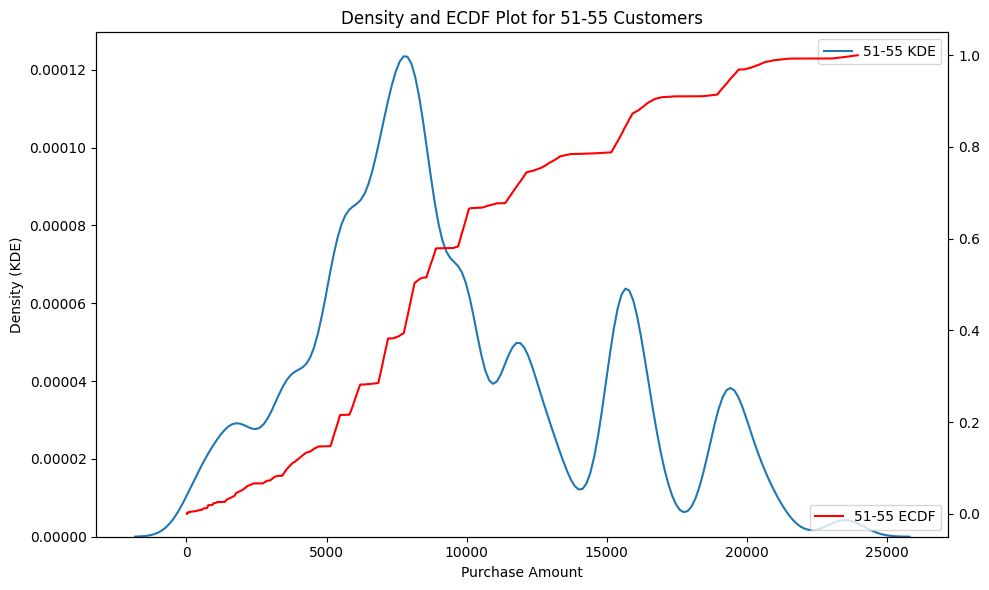

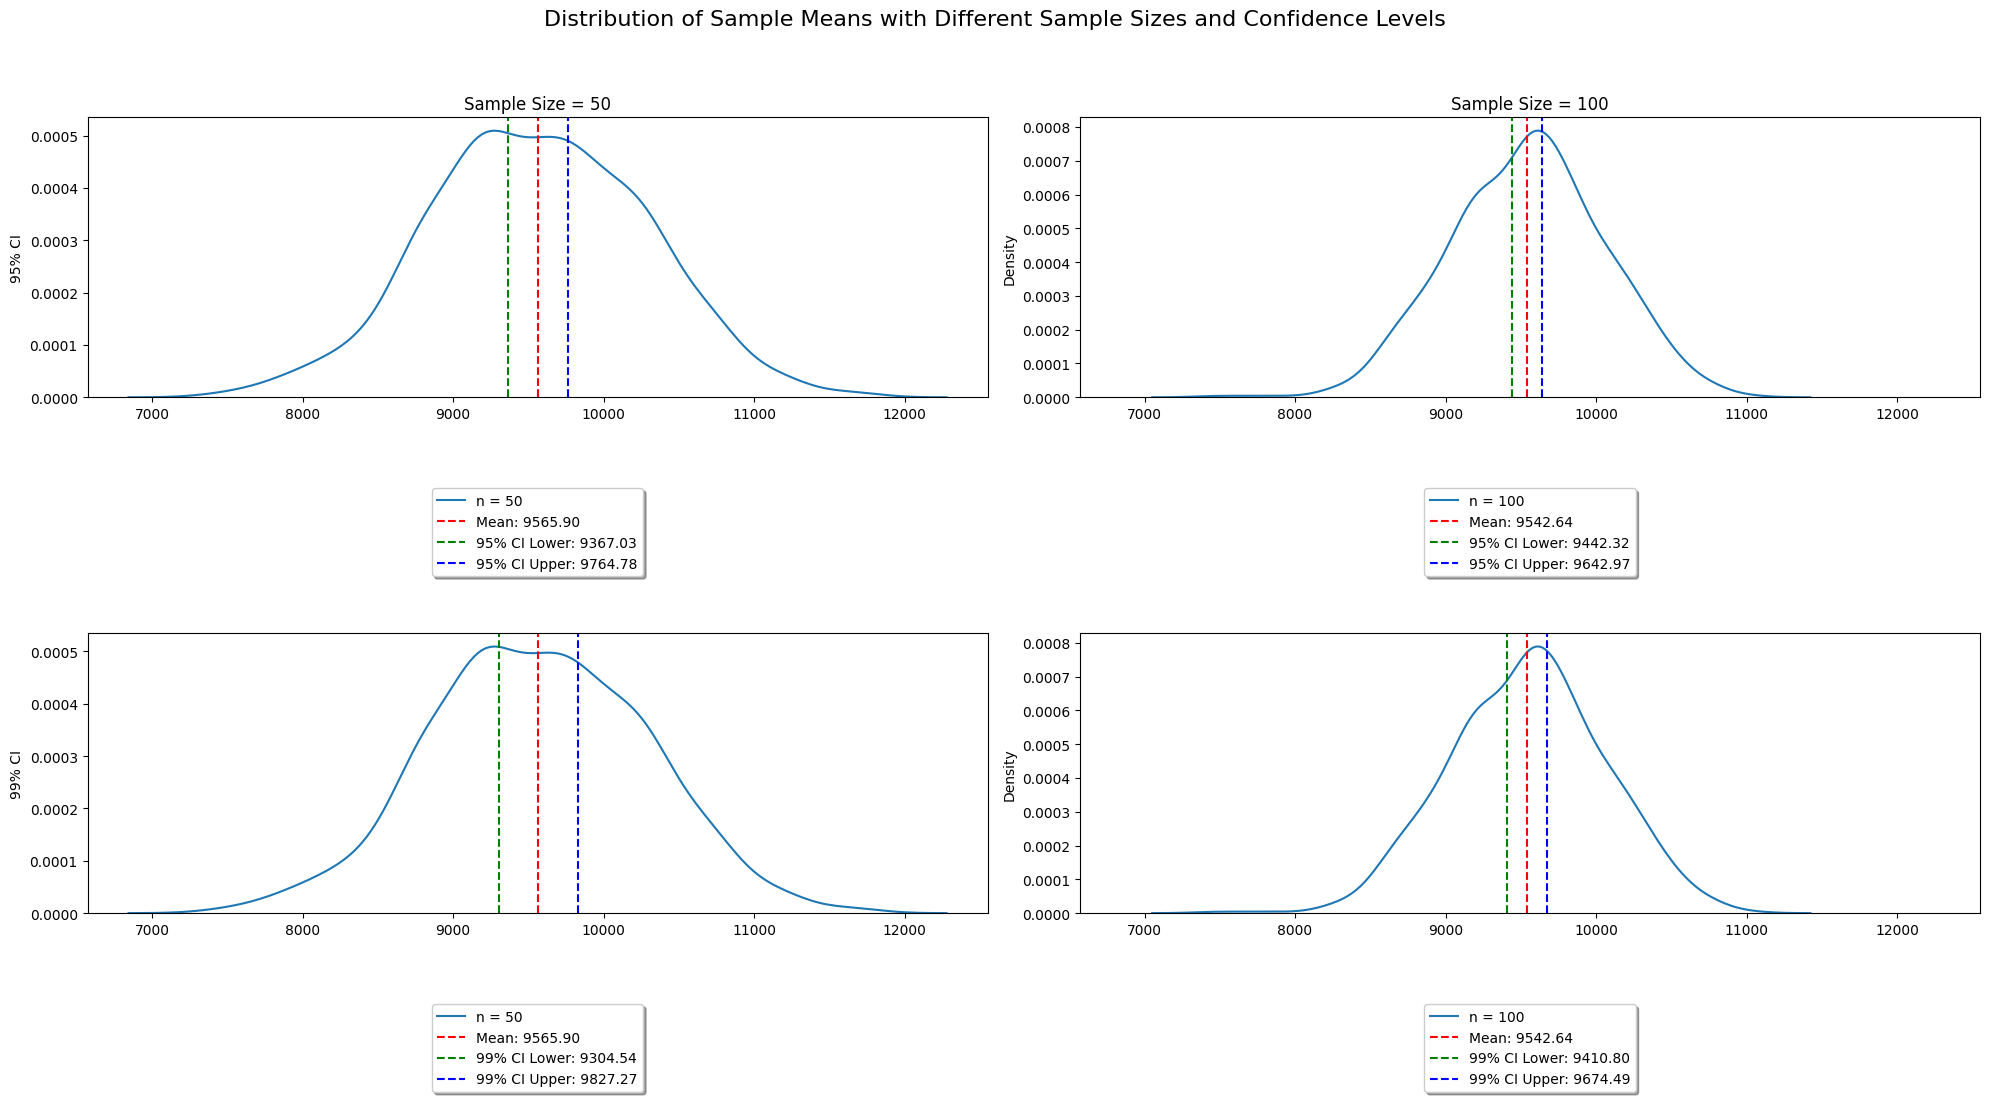

### 🟥 Confidence Level: 95% 



**Sample Size: 50**

>- **Mean of Sample Means:** 9565.90
>- **Sample Mean ± MoE at 95% confidence:** 9565.90 ± 198.88
>- **Standard Deviation of Sample Means:** 717.50


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9542.64
>- **Sample Mean ± MoE at 95% confidence:** 9542.64 ± 100.32
>- **Standard Deviation of Sample Means:** 511.86


---

### 🟥 Confidence Level: 99% 



**Sample Size: 50**

>- **Mean of Sample Means:** 9565.90
>- **Sample Mean ± MoE at 99% confidence:** 9565.90 ± 261.37
>- **Standard Deviation of Sample Means:** 717.50


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9542.64
>- **Sample Mean ± MoE at 99% confidence:** 9542.64 ± 131.85
>- **Standard Deviation of Sample Means:** 511.86


---

# 55+ Customers 👨‍👩‍👧‍👦

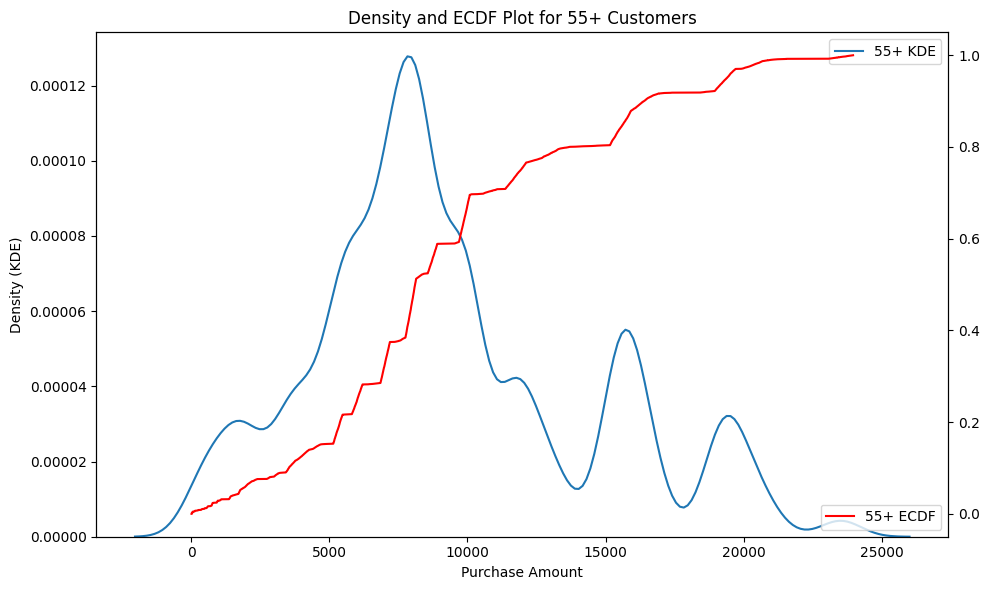

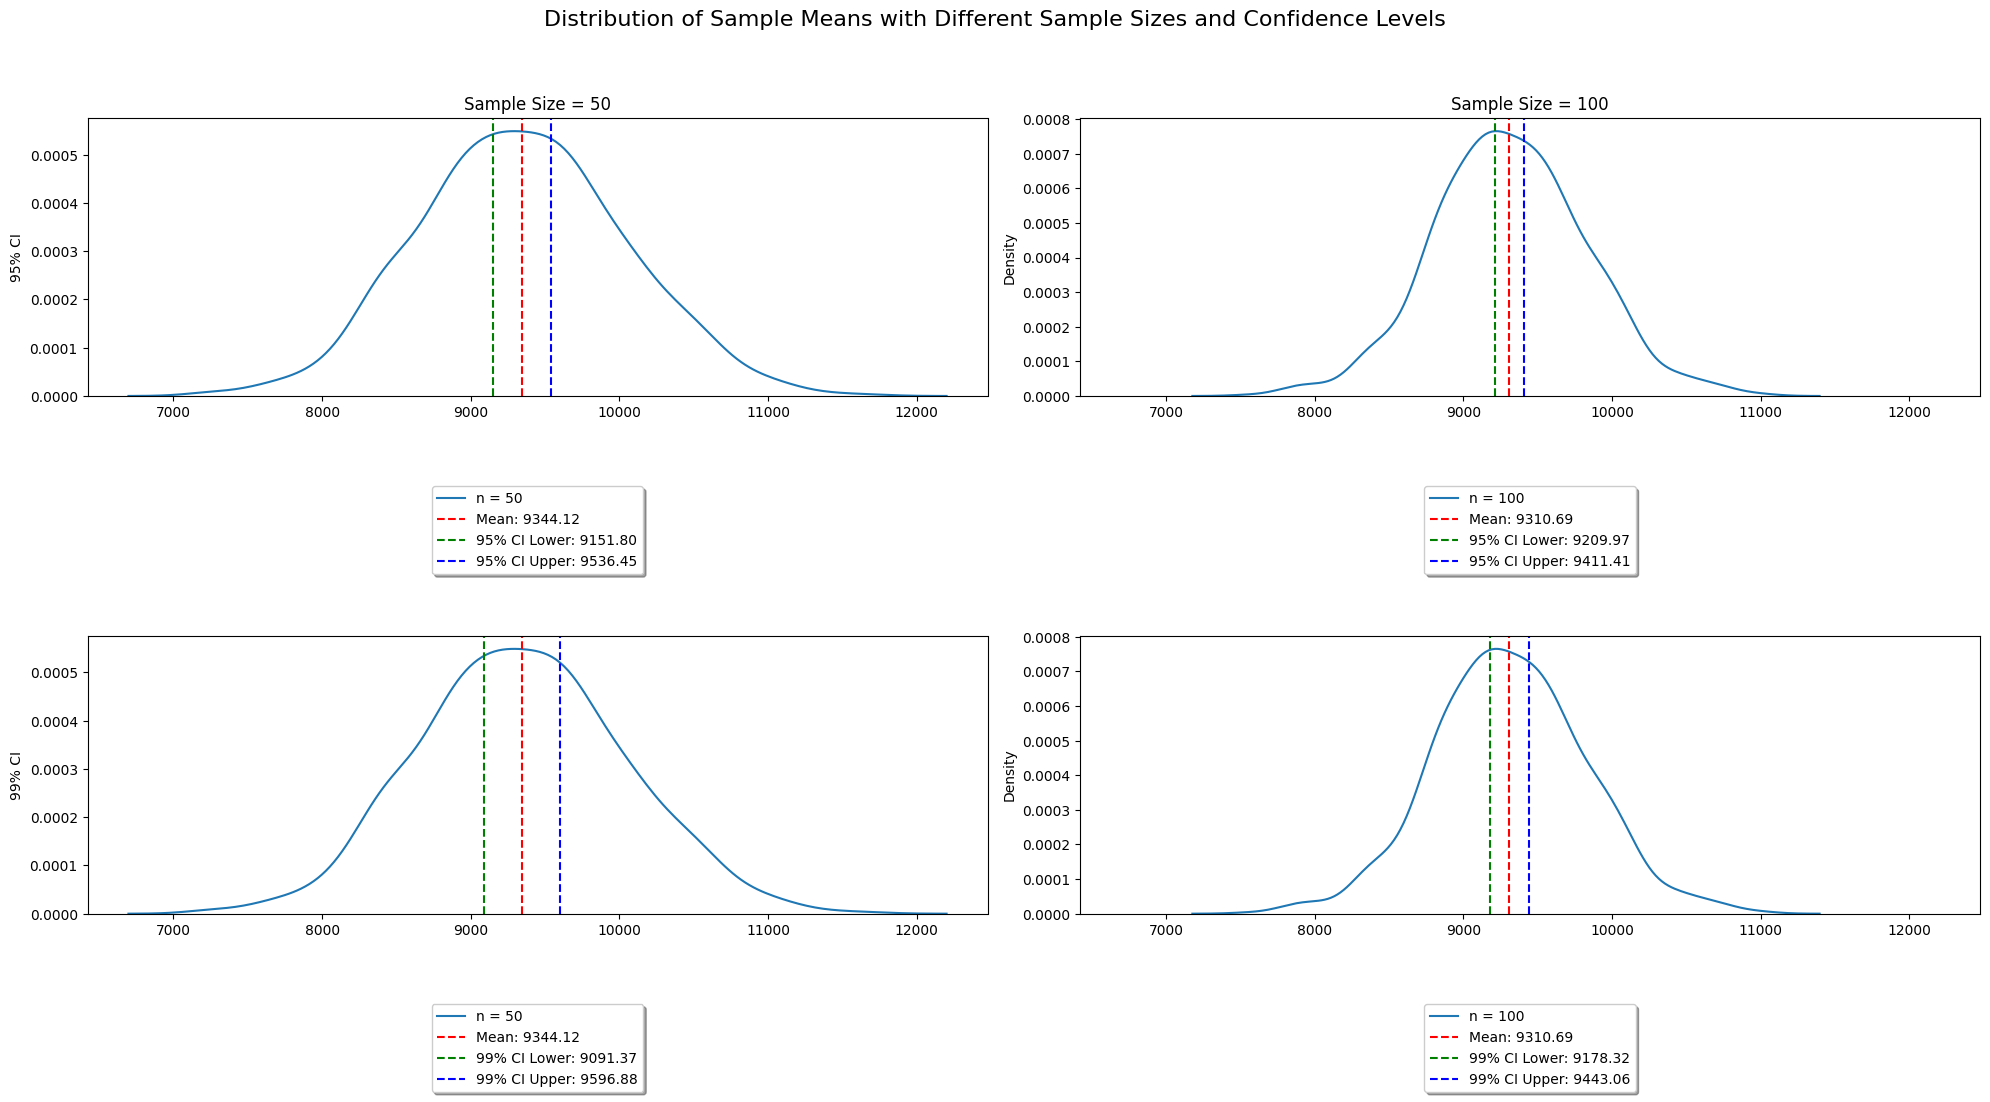

### 🟥 Confidence Level: 95% 



**Sample Size: 50**

>- **Mean of Sample Means:** 9344.12
>- **Sample Mean ± MoE at 95% confidence:** 9344.12 ± 192.32
>- **Standard Deviation of Sample Means:** 693.86


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9310.69
>- **Sample Mean ± MoE at 95% confidence:** 9310.69 ± 100.72
>- **Standard Deviation of Sample Means:** 513.91


---

### 🟥 Confidence Level: 99% 



**Sample Size: 50**

>- **Mean of Sample Means:** 9344.12
>- **Sample Mean ± MoE at 99% confidence:** 9344.12 ± 252.76
>- **Standard Deviation of Sample Means:** 693.86


---


**Sample Size: 100**

>- **Mean of Sample Means:** 9310.69
>- **Sample Mean ± MoE at 99% confidence:** 9310.69 ± 132.37
>- **Standard Deviation of Sample Means:** 513.91


---

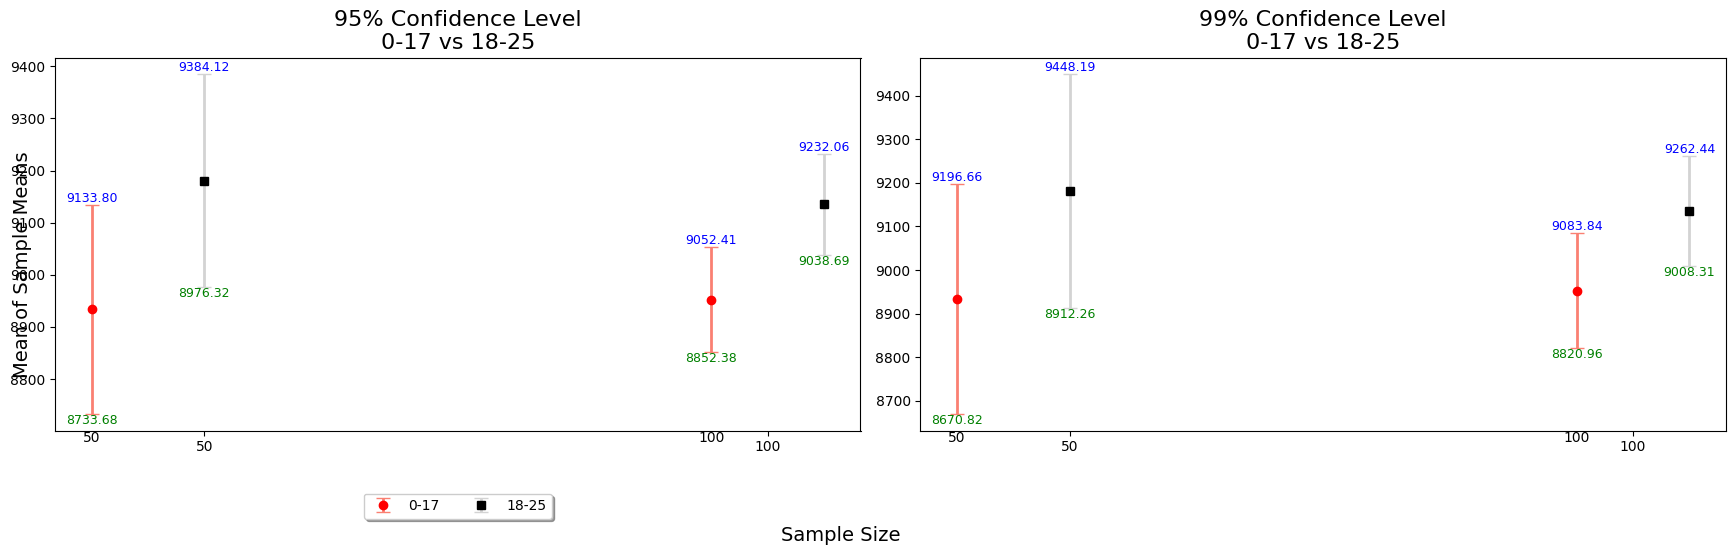

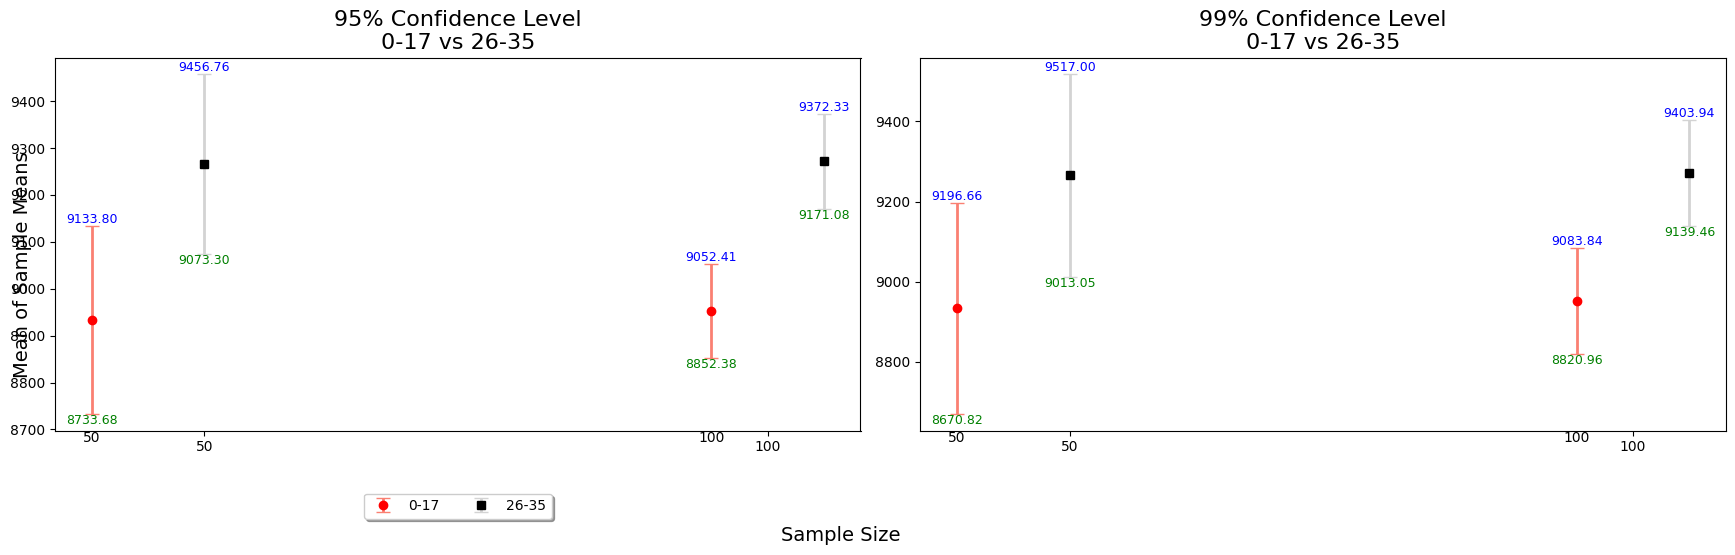

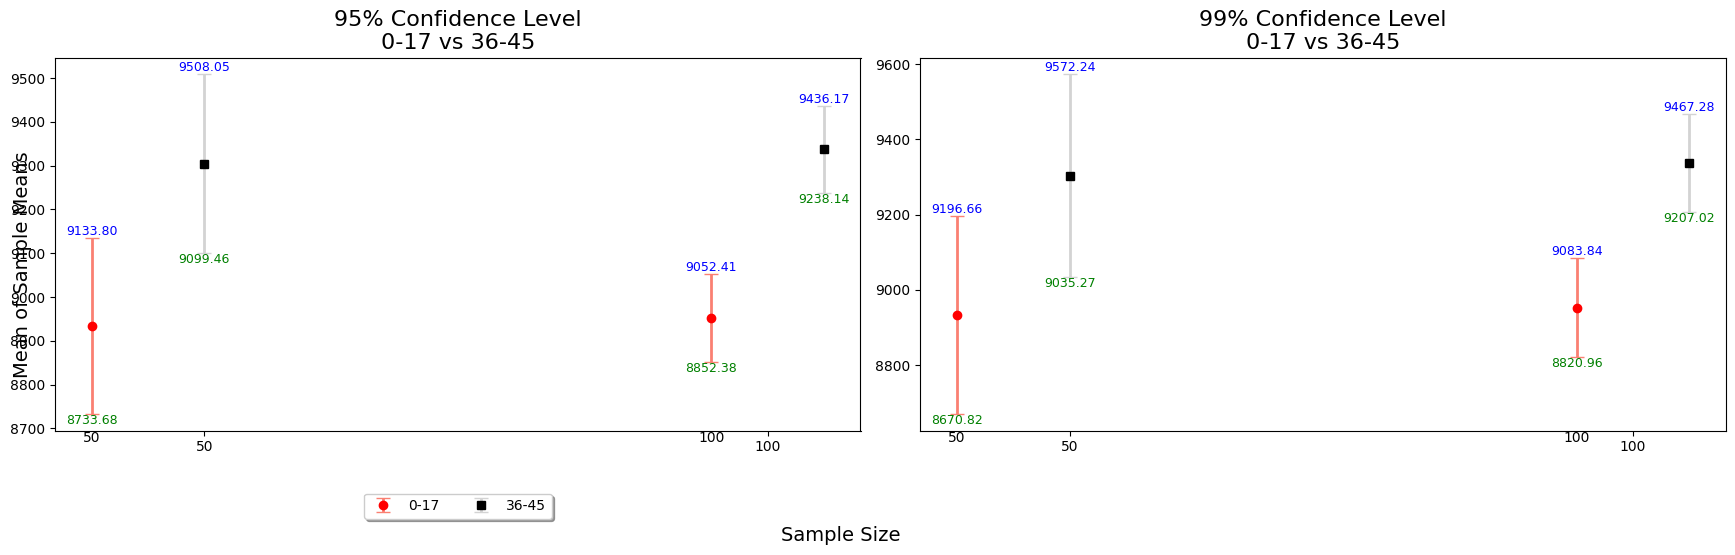

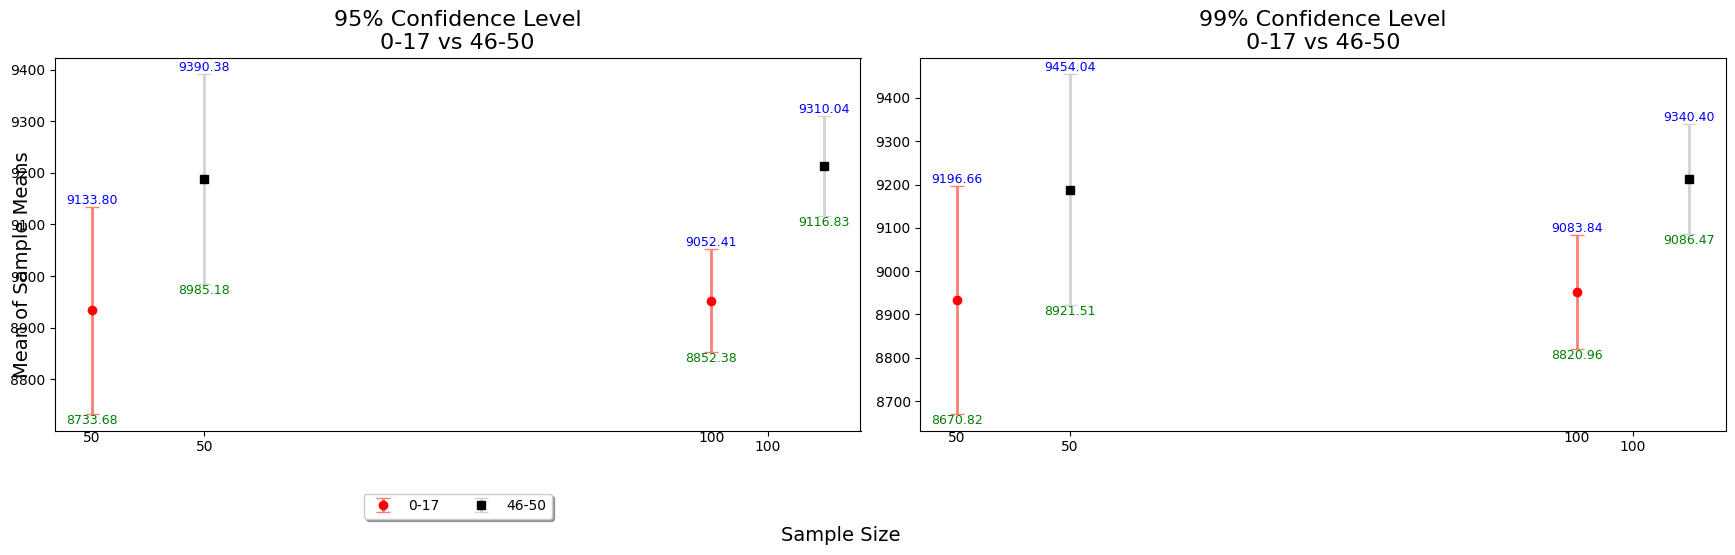

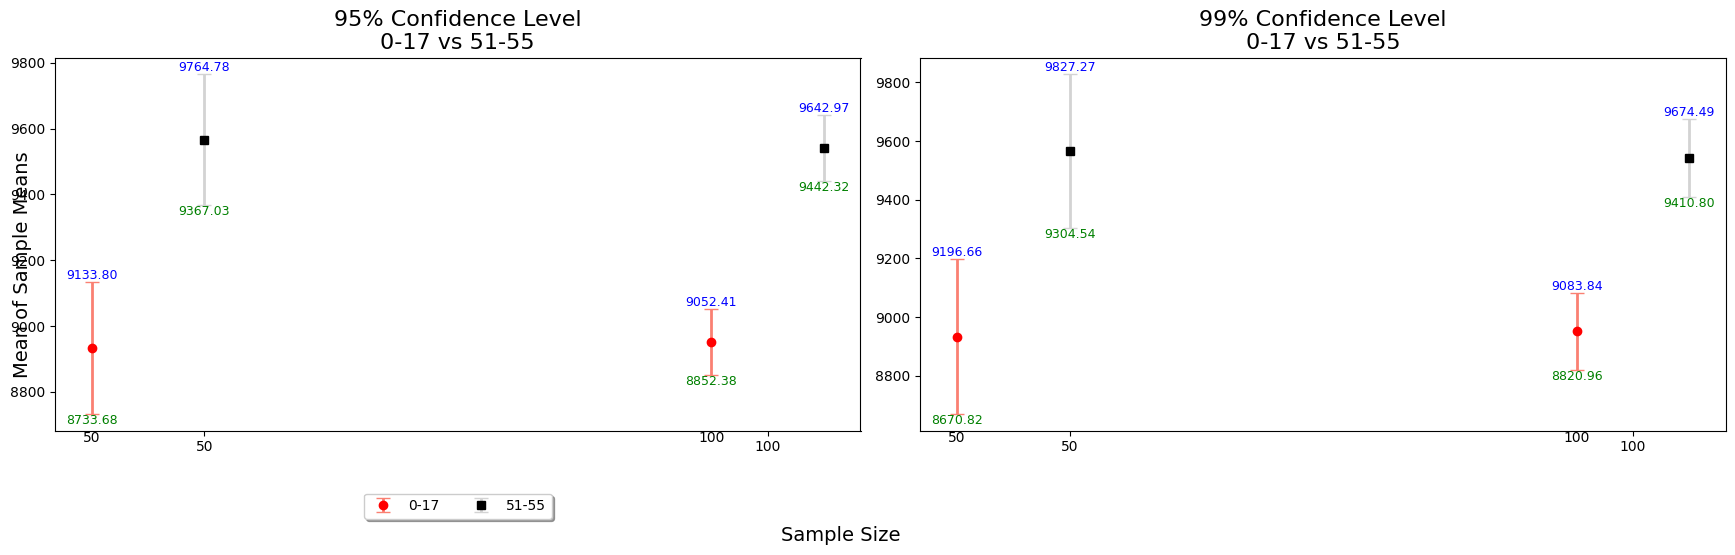

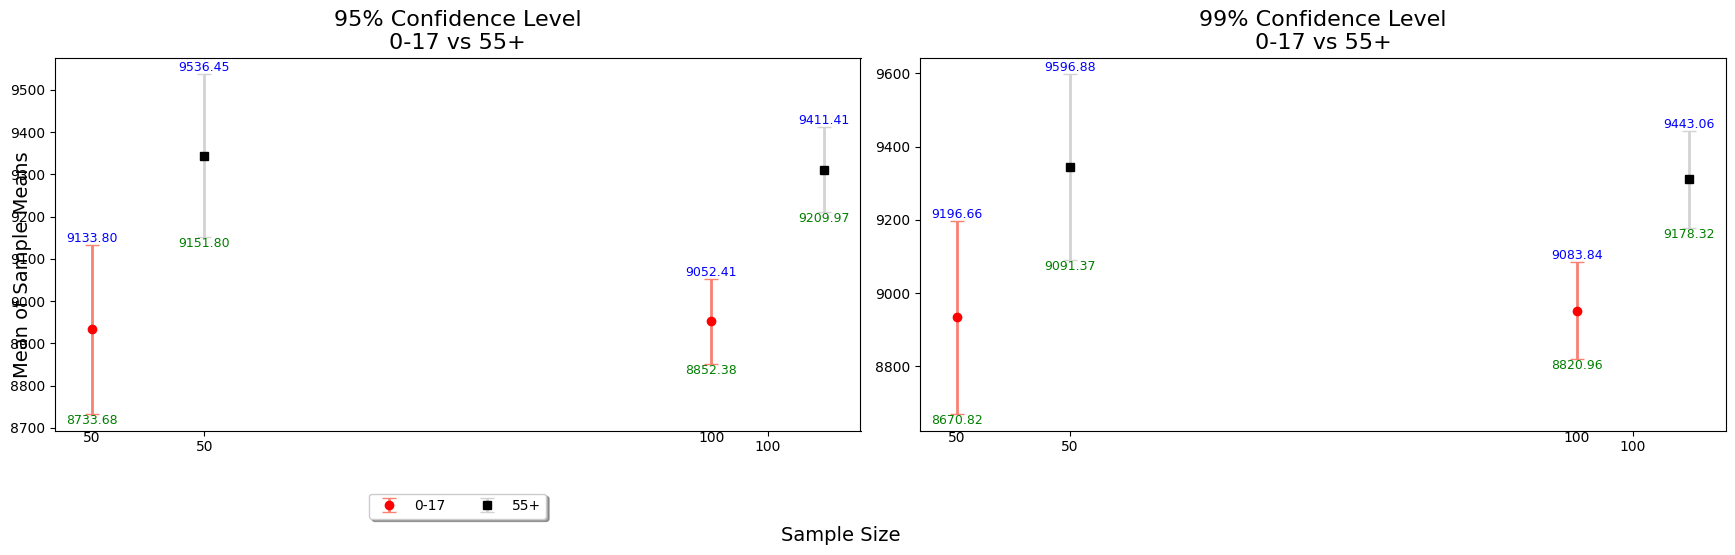

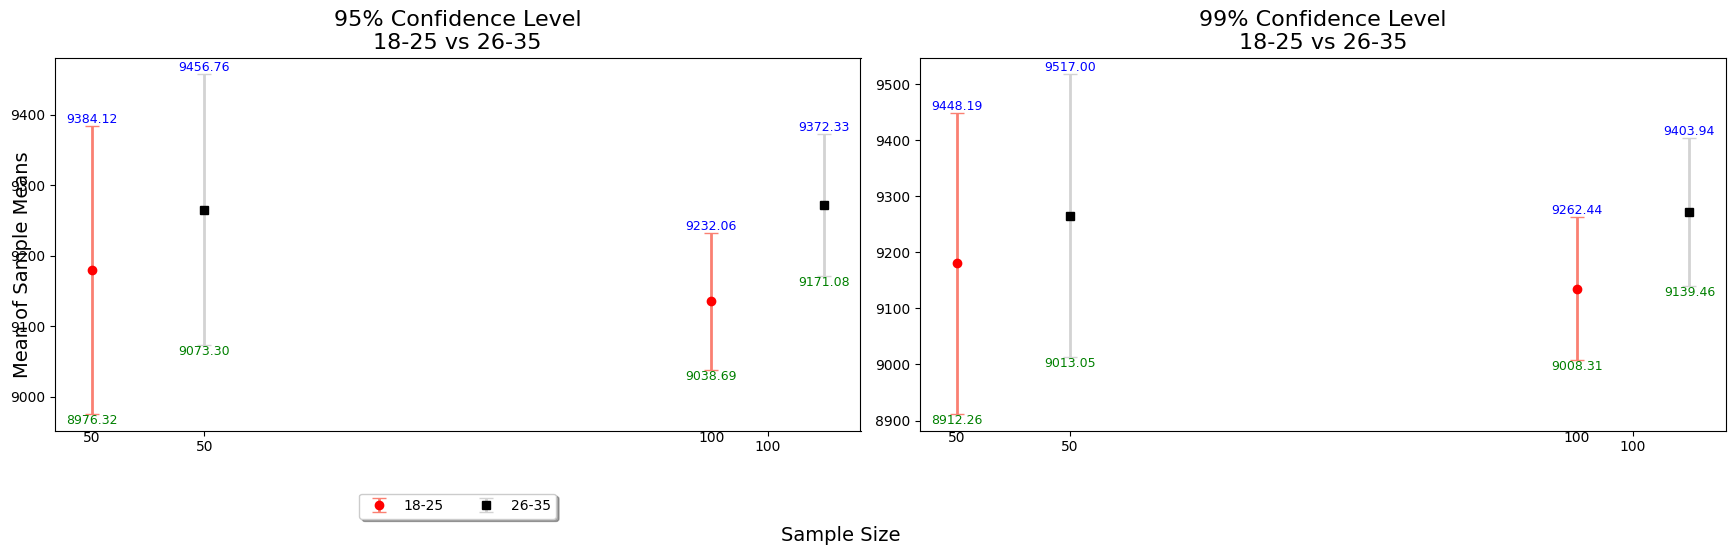

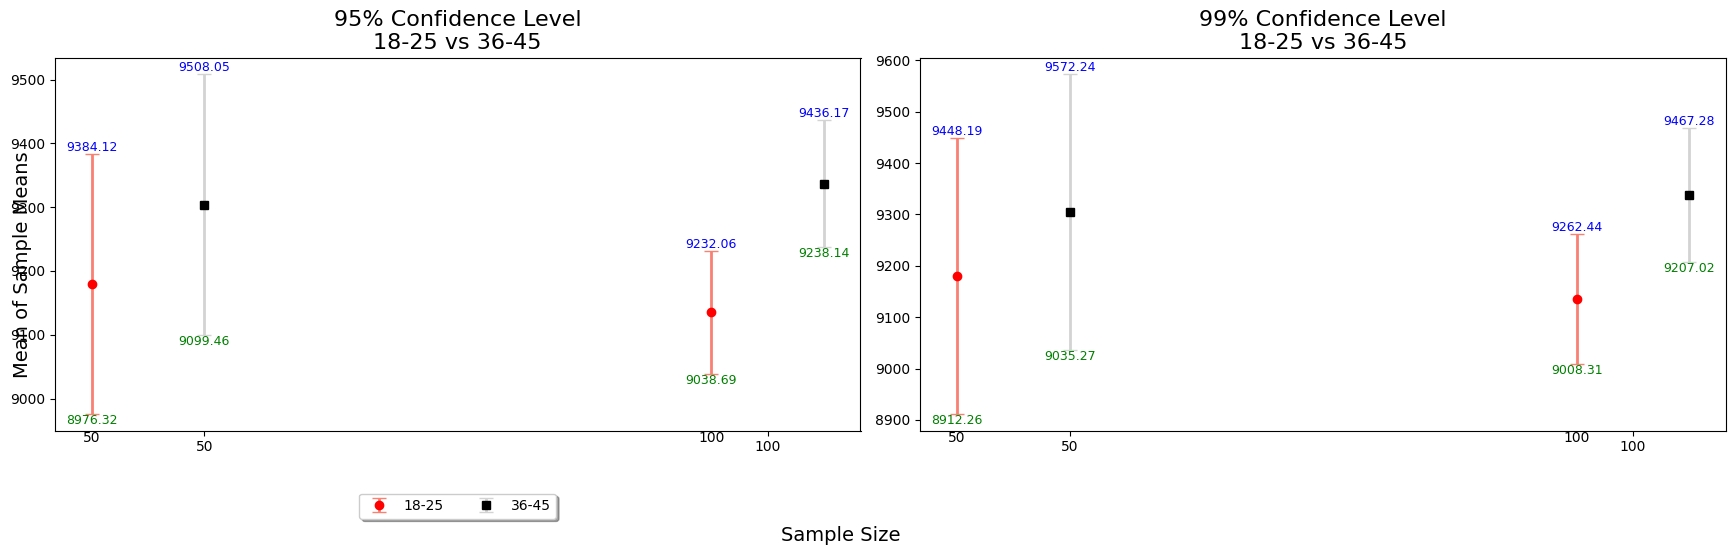

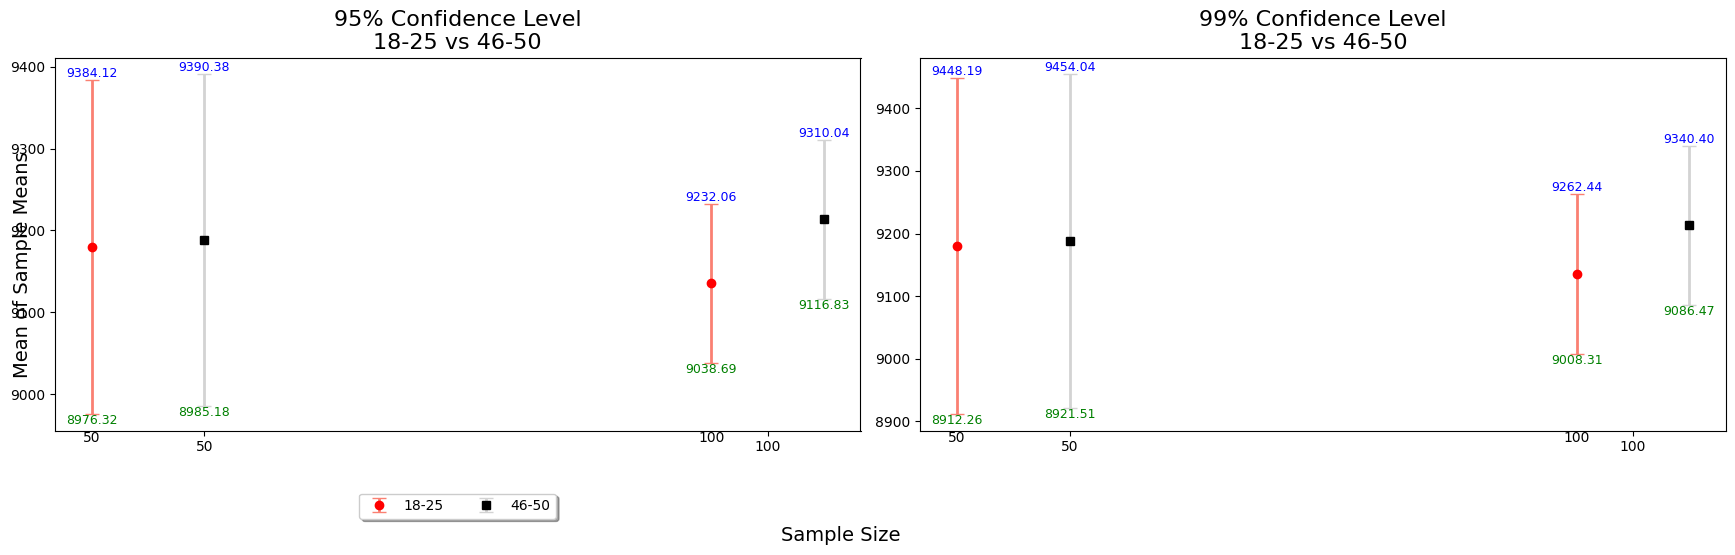

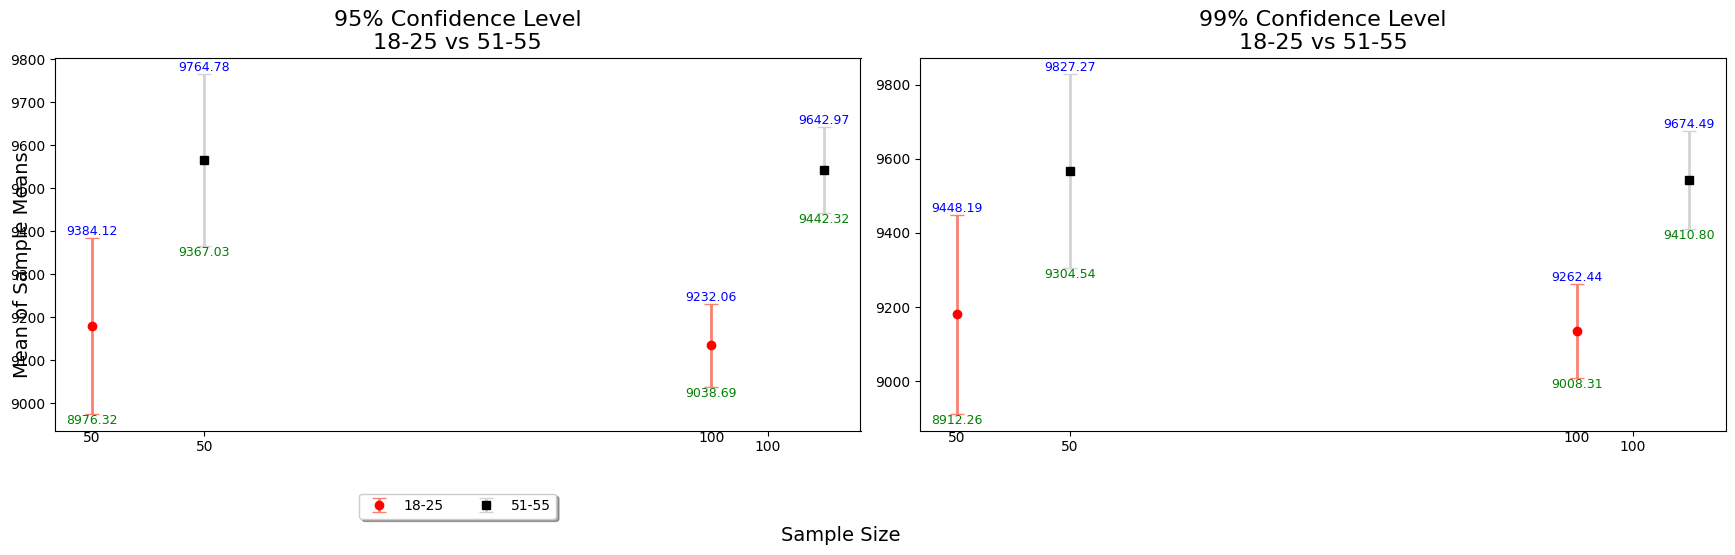

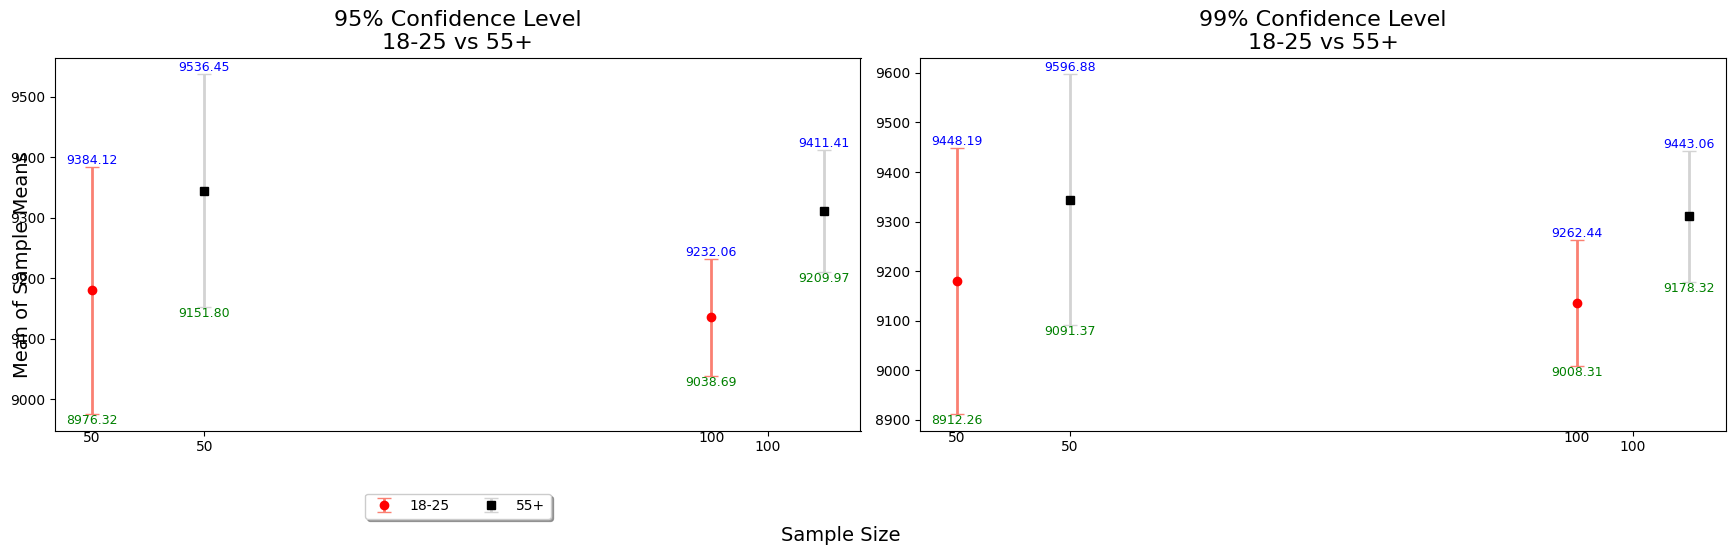

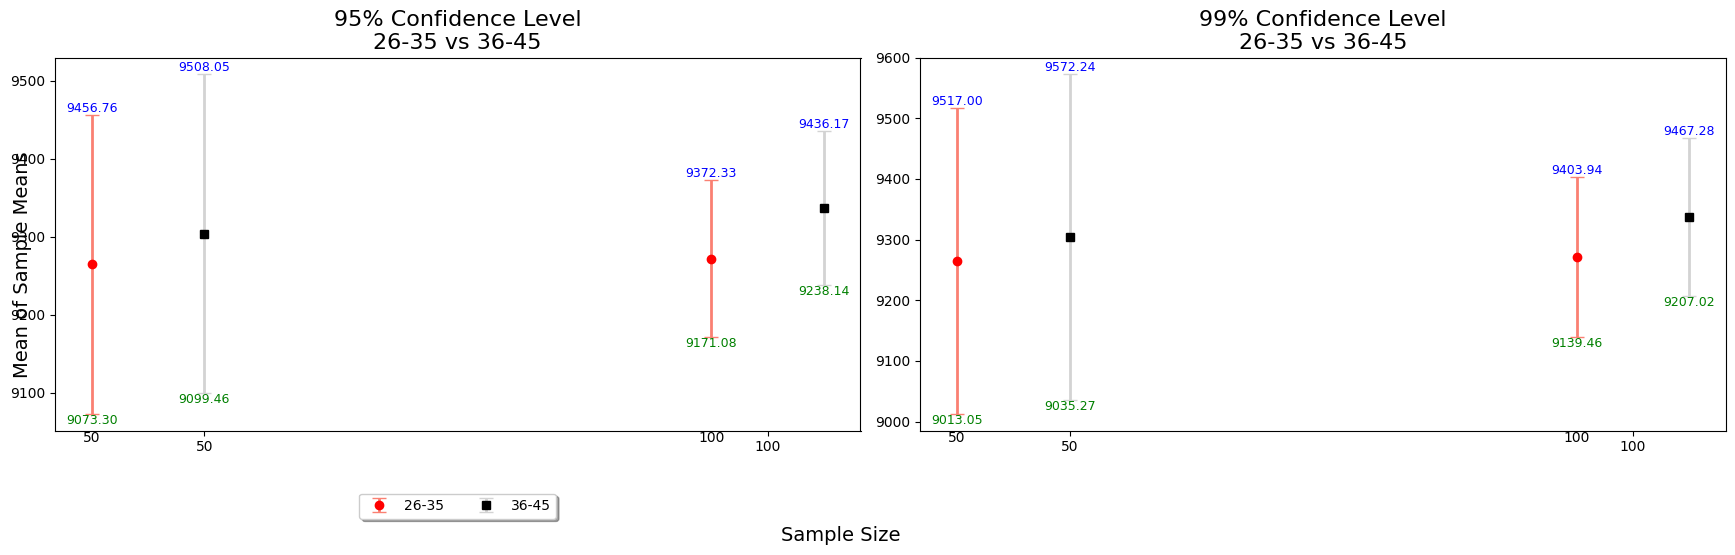

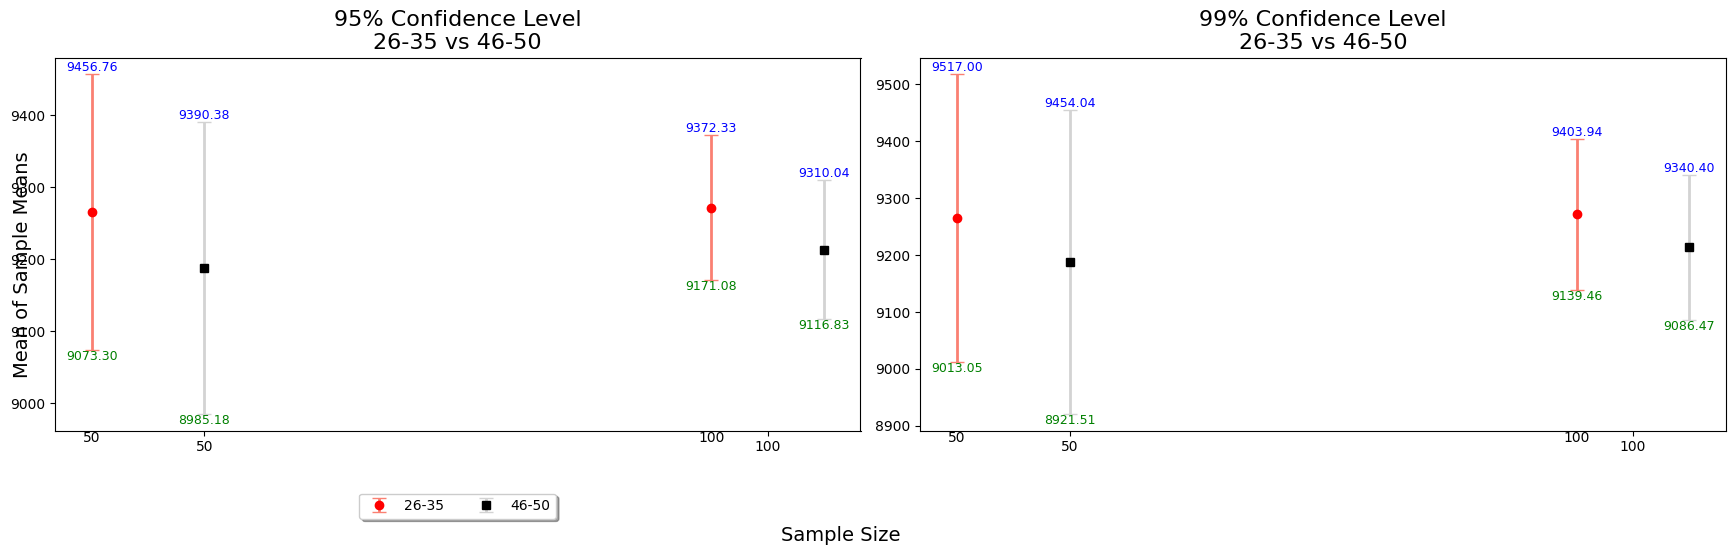

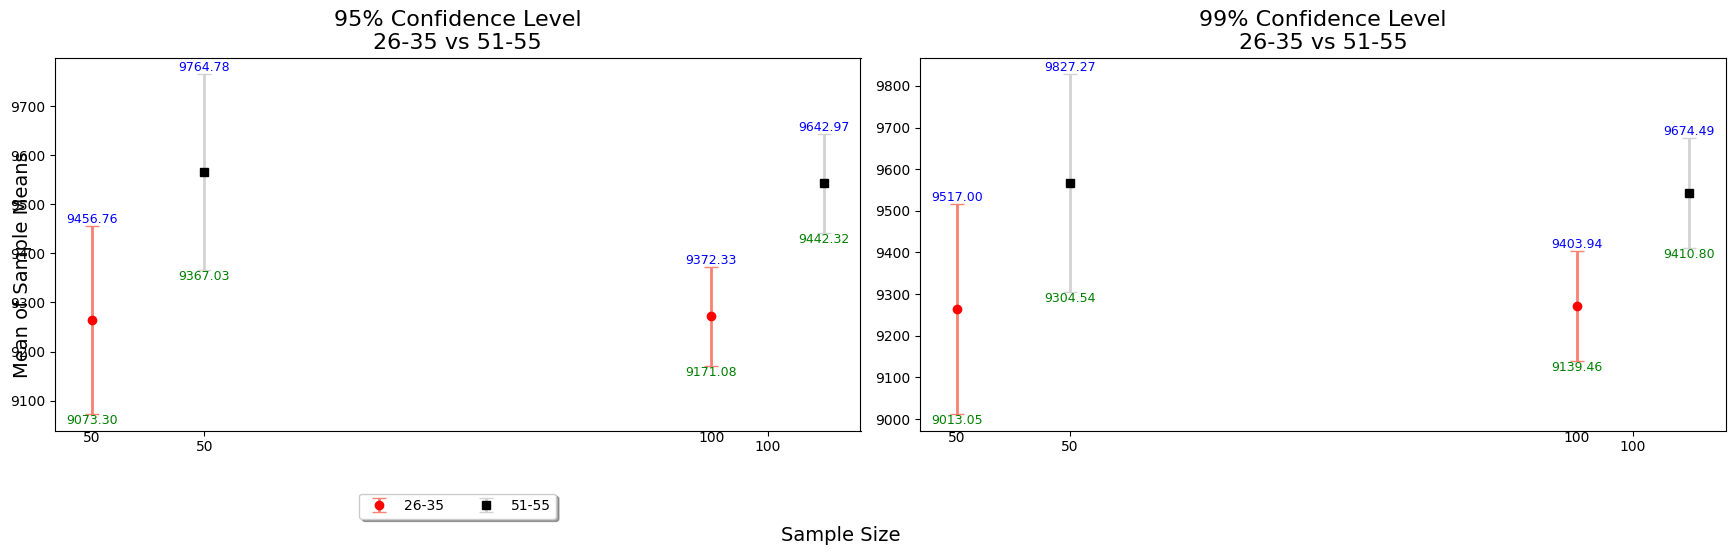

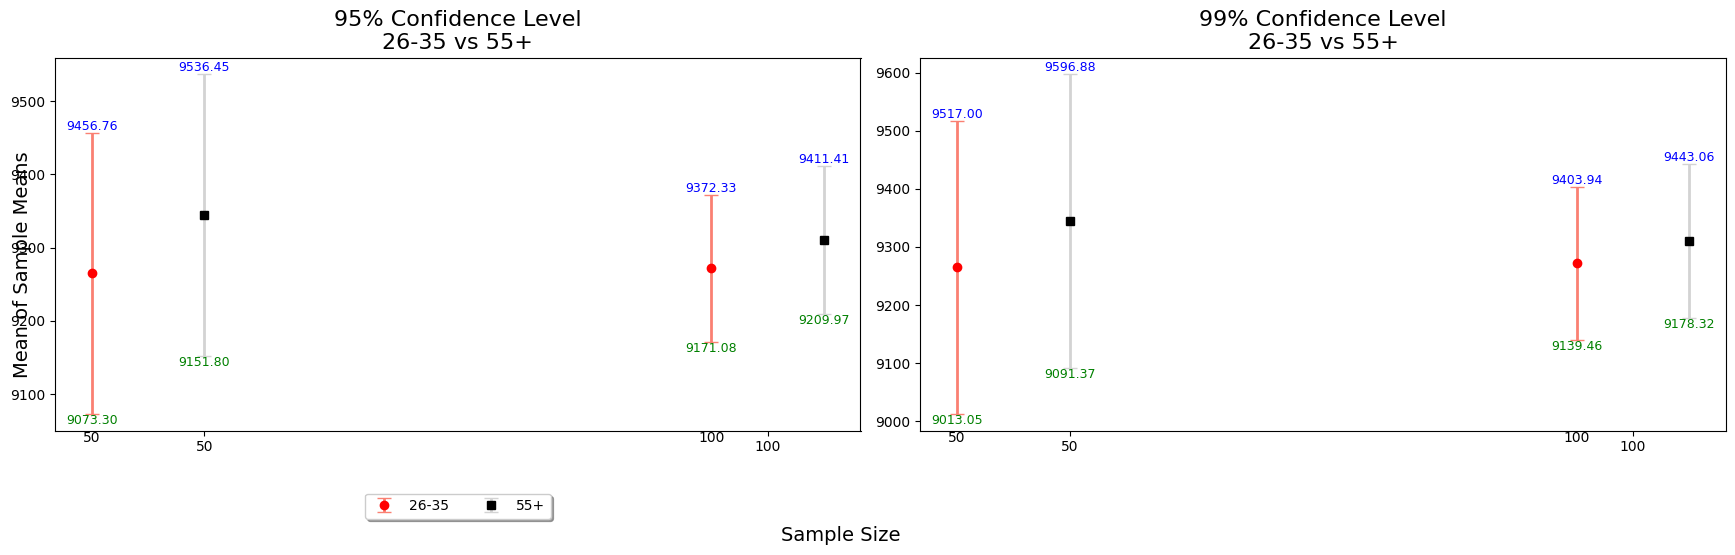

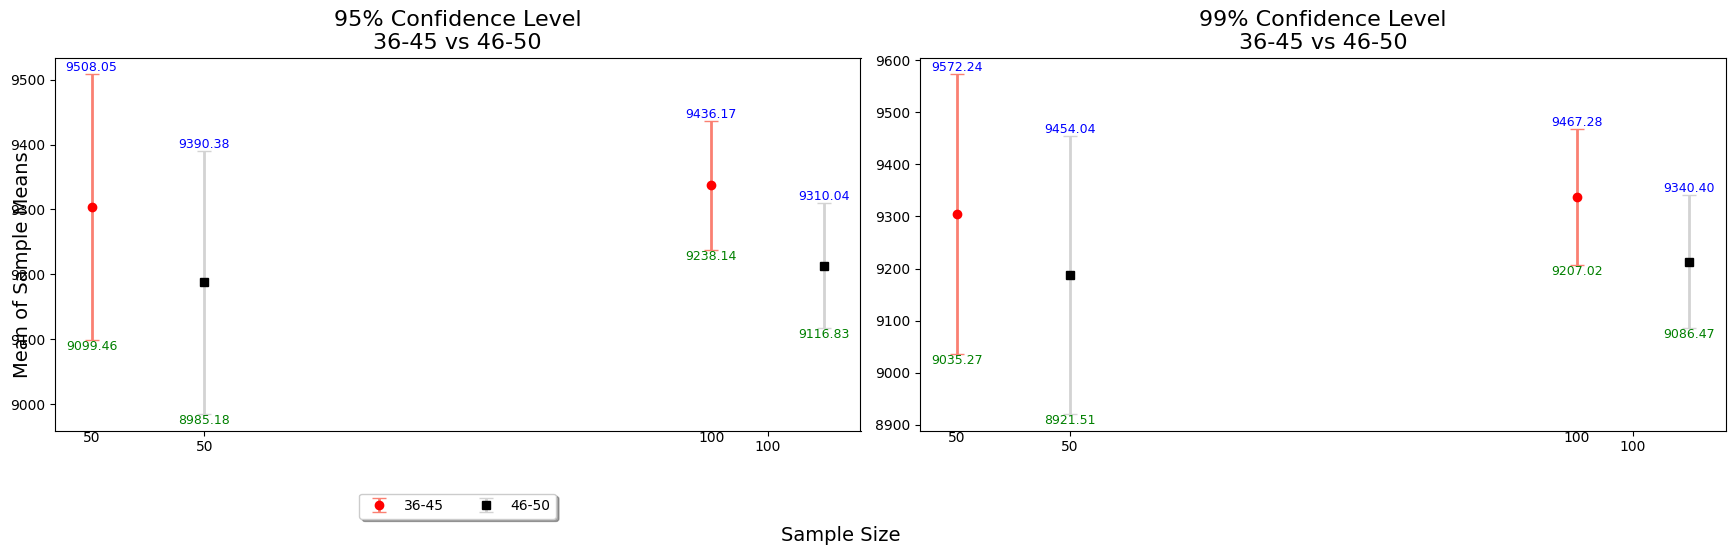

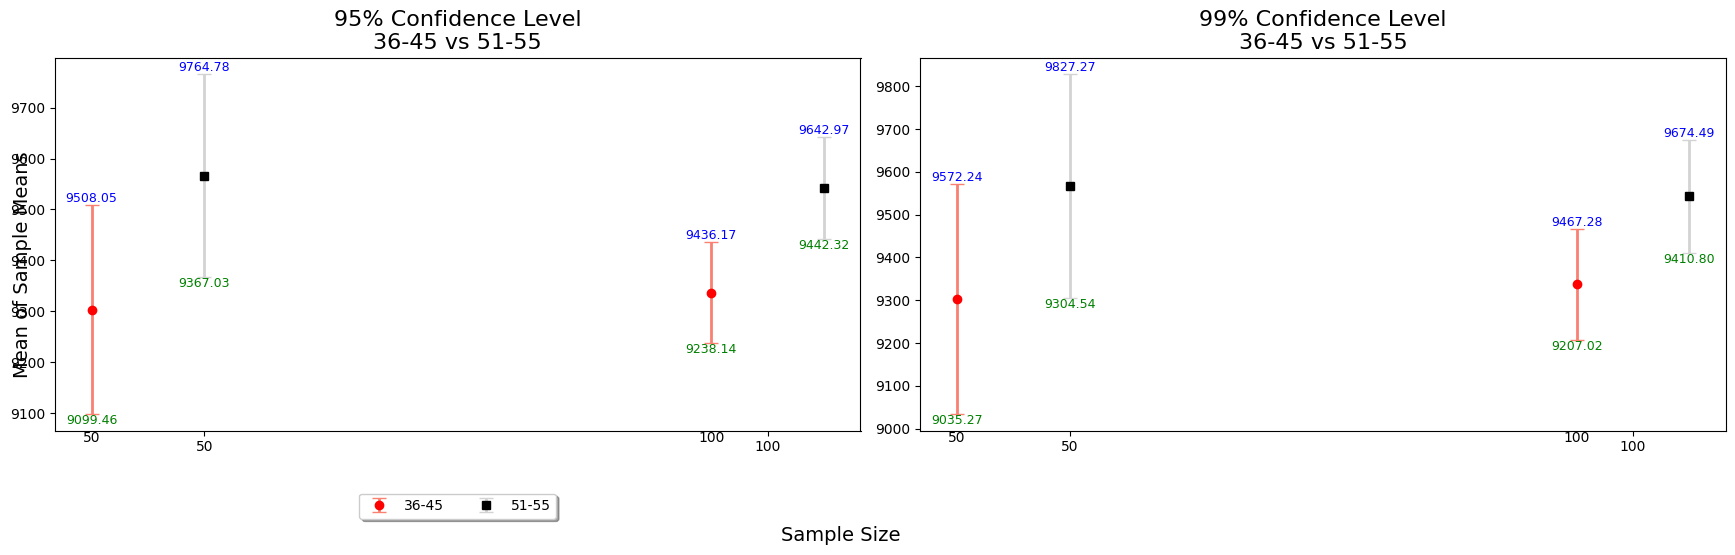

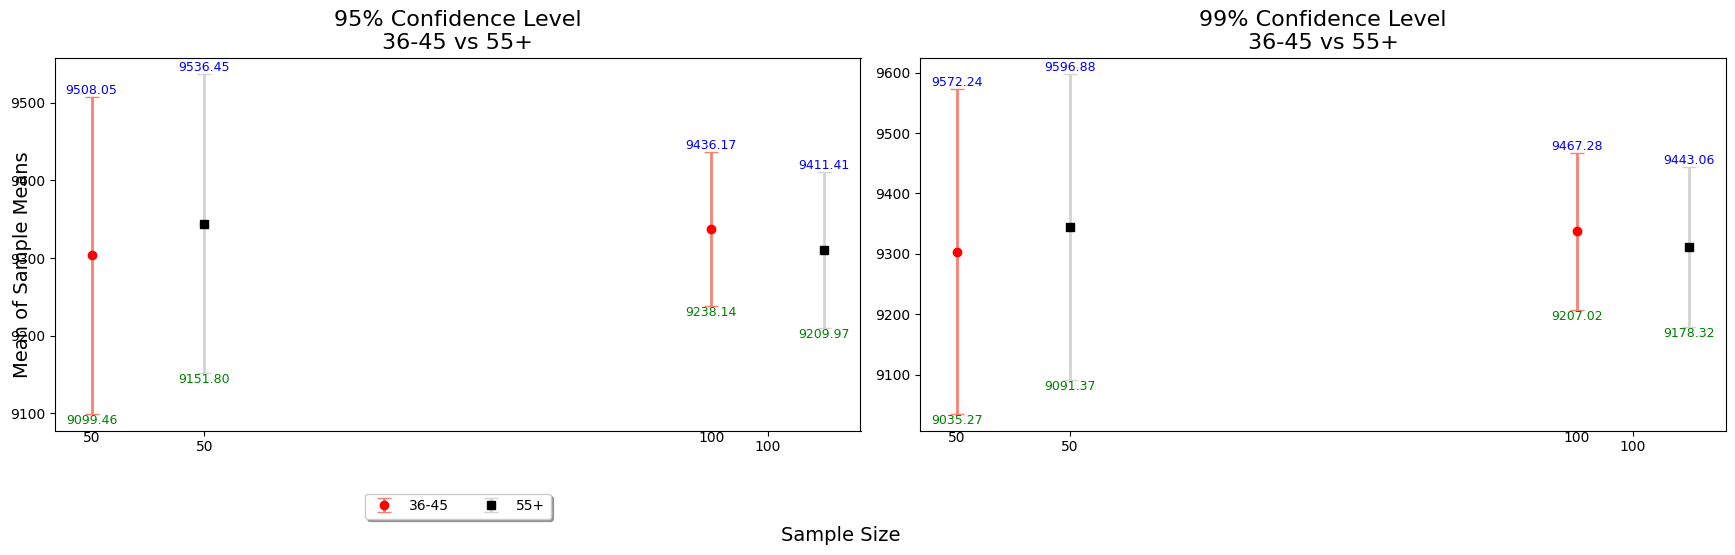

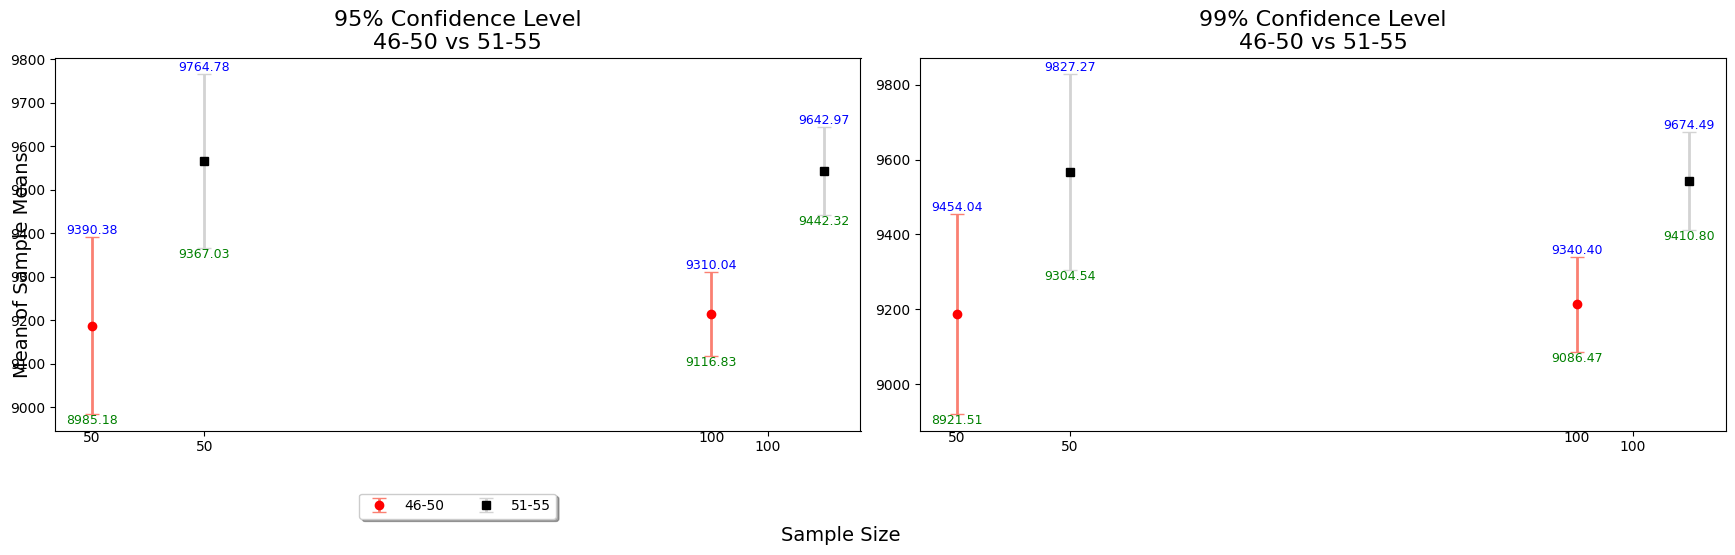

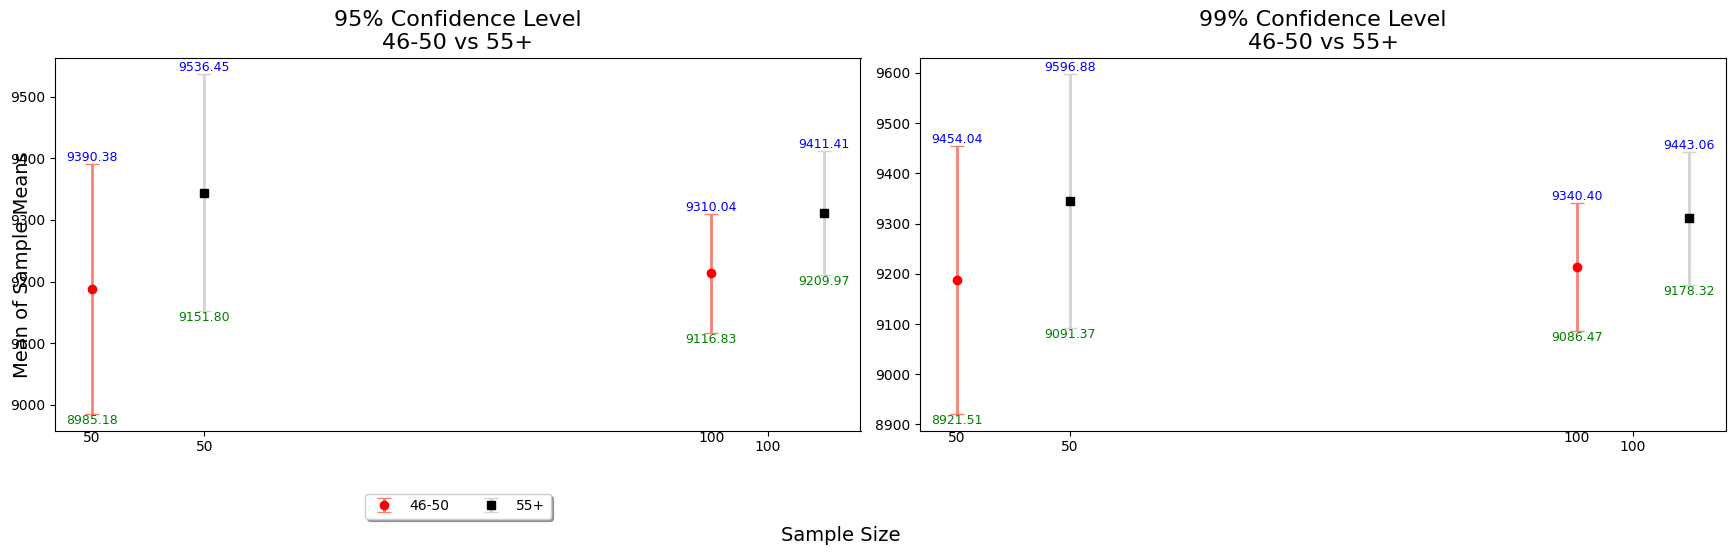

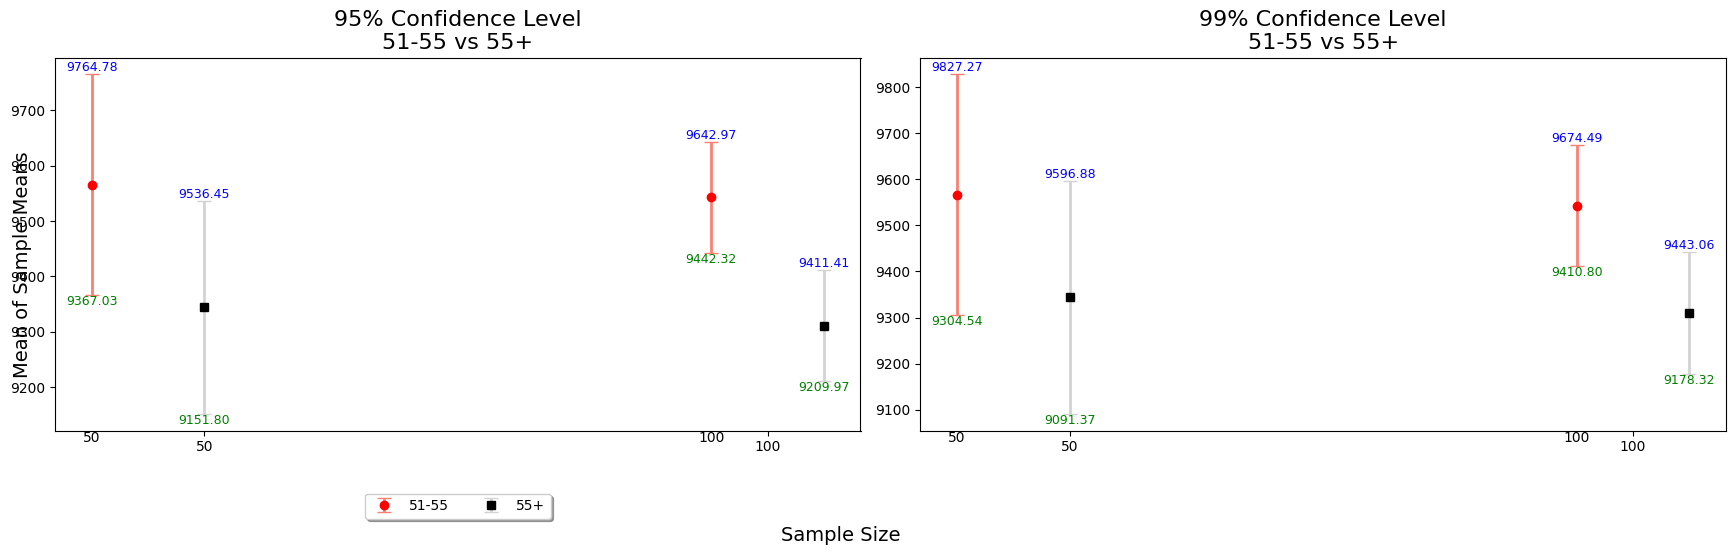

In [51]:
num_iterations = 1000
sample_sizes = [50, 100]
confidence_levels = [0.95, 0.99]

category_col = "Age"

analyze_sample_means_by_category(num_iterations, 
                                 sample_sizes, 
                                 confidence_levels, 
                                 df, 
                                 category_col)

🟦 <b>Test for Normality</b> - Age Category vs Purchase

In [52]:
from scipy.stats import shapiro

def shapiro_test_for_all_age_groups(dataframe, alpha=0.05):
    # Hypotheses
    Ho = "The distribution of purchase patterns is normally distributed."
    Ha = "The distribution of purchase patterns is not normally distributed."
    
    # Loop through unique age categories
    age_categories = dataframe['Age'].cat.categories.tolist()
    
    for age_category in age_categories:
        age_group_data = dataframe[dataframe['Age'] == age_category]['Purchase']
        
        # Perform Shapiro-Wilk test
        shapiro_result = shapiro(age_group_data)
        
        # Print test result
        if shapiro_result.pvalue < alpha:
            print(f"Reject the null hypothesis (H₀) for {age_category} age group.")
            print(f"Conclusion: {Ha}")
        else:
            print(f"Fail to reject the null hypothesis (H₀) for {age_category} age group.")
            print(f"Conclusion: {Ho}")

# Perform Shapiro-Wilk test for all age groups
shapiro_test_for_all_age_groups(df)


Reject the null hypothesis (H₀) for 0-17 age group.
Conclusion: The distribution of purchase patterns is not normally distributed.
Reject the null hypothesis (H₀) for 18-25 age group.
Conclusion: The distribution of purchase patterns is not normally distributed.
Reject the null hypothesis (H₀) for 26-35 age group.
Conclusion: The distribution of purchase patterns is not normally distributed.
Reject the null hypothesis (H₀) for 36-45 age group.
Conclusion: The distribution of purchase patterns is not normally distributed.
Reject the null hypothesis (H₀) for 46-50 age group.
Conclusion: The distribution of purchase patterns is not normally distributed.
Reject the null hypothesis (H₀) for 51-55 age group.
Conclusion: The distribution of purchase patterns is not normally distributed.
Reject the null hypothesis (H₀) for 55+ age group.
Conclusion: The distribution of purchase patterns is not normally distributed.


🟦 <b>Test for homogeneity of Variance </b> - Age Category vs Purchase

In [53]:
from scipy.stats import levene

#  arrays for each age category
age_cat_0_17 = df[df['Age'] == "0-17"]['Purchase']
age_cat_18_25 = df[df['Age'] == "18-25"]['Purchase']
age_cat_26_35 = df[df['Age'] == "26-35"]['Purchase']
age_cat_36_45 = df[df['Age'] == "36-45"]['Purchase']
age_cat_46_50 = df[df['Age'] == "46-50"]['Purchase']
age_cat_51_55 = df[df['Age'] == "51-55"]['Purchase']
age_cat_55plus = df[df['Age'] == "55+"]['Purchase']

# Perform Levene's test
alpha = 0.05  # Significance level

# Hypotheses
Ho = "Variances are equal among age groups."
Ha = "Variances are not equal among age groups."

# Perform Levene's test
levene_result = levene(age_cat_0_17, age_cat_18_25, age_cat_26_35, age_cat_36_45, age_cat_46_50, age_cat_51_55, age_cat_55plus)

# Print test result
if levene_result.pvalue < alpha:
    print("Reject the null hypothesis (H₀).")
    print(f"Conclusion: {Ha}")
else:
    print("Fail to reject the null hypothesis (H₀).")
    print(f"Conclusion: {Ho}")


Reject the null hypothesis (H₀).
Conclusion: Variances are not equal among age groups.


As both Shapiro and Level test fails, we can't perform anova, and so we shall perform kwtest.

In [54]:
from scipy.stats import kruskal

# age_cat_0_17 = df[df['Age'] == "0-17"]['Purchase']
# age_cat_18_25 = df[df['Age'] == "18-25"]['Purchase']
# age_cat_26_35 = df[df['Age'] == "26-35"]['Purchase']
# age_cat_36_45 = df[df['Age'] == "36-45"]['Purchase']
# age_cat_46_50 = df[df['Age'] == "46-50"]['Purchase']
# age_cat_51_55 = df[df['Age'] == "51-55"]['Purchase']
# age_cat_55plus = df[df['Age'] == "55+"]['Purchase']

# Perform Kruskal-Wallis H-test
statistic, p_value = kruskal(age_cat_0_17, age_cat_18_25, age_cat_26_35, 
                             age_cat_36_45, age_cat_46_50, age_cat_51_55, age_cat_55plus)

Ho = "The medians of 'Purchase' across age categories are equal."
Ha = "At least one age category has a different median 'Purchase'."

print(f"Kruskal-Wallis H-Statistic: {statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis (H₀).")
    print(f"Conclusion: {Ha}")
else:
    print("Fail to reject the null hypothesis (H₀).")
    print(f"Conclusion: {Ho}")


Kruskal-Wallis H-Statistic: 315.65242682849174
P-Value: 3.612251655399266e-65
Reject the null hypothesis (H₀).
Conclusion: At least one age category has a different median 'Purchase'.


- We can see a significant difference in Purchaing pattern w.r.t to the age category, from the KW test.

---
# <font size = 10><b> Questions </b> </font>
---

## <font color = "orange">1. Are women spending more money per transaction than men? Why or why not?</font>

Average spending per transaction for women: USD 8734.57 <br>
Average spending per transaction for men: USD 9437.53

- At 90% and 95% confidence levels, there's no overlap in spending behaviors between genders.
- Some overlap is seen at a 99% confidence level with a smaller sample size, suggesting possible similarities.
- Overall, females tend to have distinct spending habits compared to males.
- The KS test confirms that purchase patterns differ significantly between males and females.


## <font color = "orange">2. Confidence intervals and distribution of the mean of the expenses by female and male customers.</font>

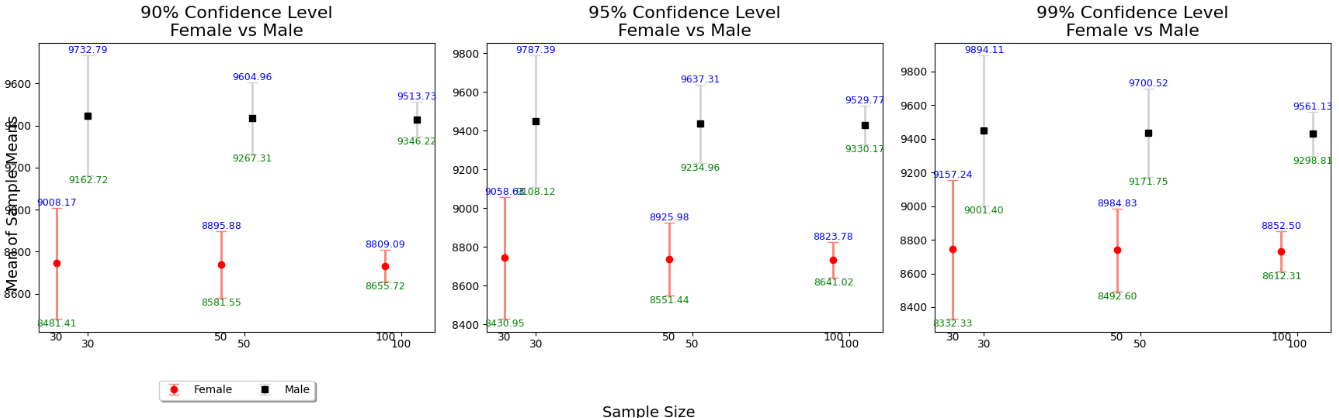


### Male Data:

- **Confidence Level**: 95%

| Sample Size | Mean of Sample Means | Sample Mean ± MoE at 95% confidence | Standard Deviation of Sample Means |
|-------------|----------------------|-------------------------------------|-----------------------------------|
| 30          | 9447.76              | 9447.76 ± 339.63                    | 949.13                            |
| 50          | 9436.14              | 9436.14 ± 201.17                    | 725.78                            |
| 100         | 9429.97              | 9429.97 ± 99.80                     | 509.20                            |

### Female Data:

- **Confidence Level**: 95%

| Sample Size | Mean of Sample Means | Sample Mean ± MoE at 95% confidence | Standard Deviation of Sample Means |
|-------------|----------------------|-------------------------------------|-----------------------------------|
| 30          | 8744.79              | 8744.79 ± 313.84                    | 877.04                            |
| 50          | 8738.71              | 8738.71 ± 187.27                    | 675.63                            |
| 100         | 8732.40              | 8732.40 ± 91.38                     | 466.23                            |

---

This table summarizes the confidence intervals and distribution of the mean expenses for male and female customers at a 95% confidence level. <br> It shows how the sample size influences the precision of the mean estimates and the corresponding margin of error (MoE).

## <font color = "orange">3. Are confidence intervals of average male and female spending overlapping? <br> How can Walmart leverage this conclusion to make changes or improvements?</font>



**Overlap of Confidence Intervals:**
   - The confidence intervals for average spending overlap across all sample sizes (30, 50, and 100), suggesting no significant difference in spending between males and females based on the data. <br>


**Implications for Walmart:**
   - **Marketing Strategies:** With similar spending patterns, Walmart can adopt gender-neutral marketing strategies to streamline promotions and engage a broader customer base.
   - **Product Placement:** By placing products to appeal universally rather than by gender, Walmart can enhance satisfaction and sales diversity.
   - **Customer Experience:** Recognizing overlapping spending helps Walmart improve overall customer experience, fostering loyalty and retention.
   - **Inventory Management:** Aligning stocking practices with overall customer preferences, not gender, can boost efficiency and reduce costs.


## <font color = "orange">4. Are confidence intervals of average married and unmarried customers's spending overlapping? <br> How can Walmart leverage this conclusion to make changes or improvements?</font>

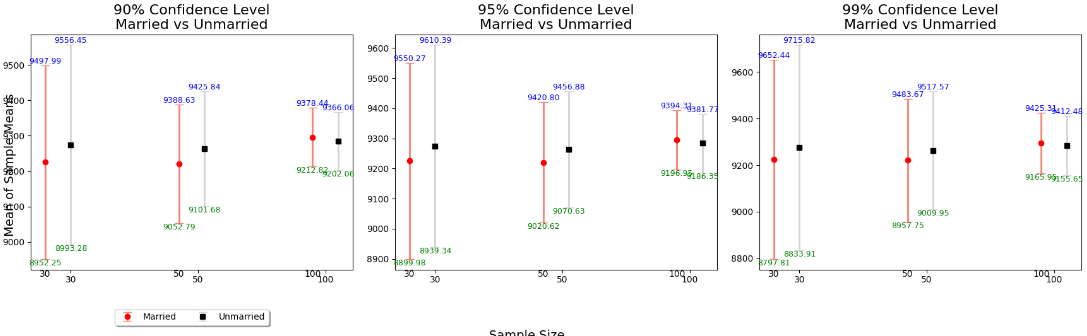


### 90% to 99% Confidence Levels:

Confidence intervals overlap for both married and unmarried customers across all sample sizes (30, 50, and 100).

### Inference from the Visual Analysis

The consistent overlap in confidence intervals across different levels suggests that there may not be statistically significant differences in spending behaviors between married and unmarried customers.

### Detailed Analysis and Final Conclusion

However, the KS test, which evaluates distribution differences, reveals a significant distinction in purchase patterns between married and unmarried customers.

### Implications for Walmart

- **Marketing Strategy:** Given the overlapping spending patterns, Walmart could benefit from adopting universal marketing strategies that appeal to both married and unmarried customers.
  
- **Product Offerings:** Tailoring product offerings based on broader customer preferences rather than marital status could potentially enhance customer satisfaction and boost sales diversity.
  
- **Operational Efficiency:** By optimizing inventory management to align with general customer preferences, Walmart can achieve cost savings and improve overall operational efficiency.

This approach ensures that Walmart effectively meets customer needs without solely relying on marital status, thereby fostering inclusivity and enhancing market appeal.


## <font color = "orange">5. Confidence intervals and distribution of the mean of the expenses among diffient Age group customers. </font>

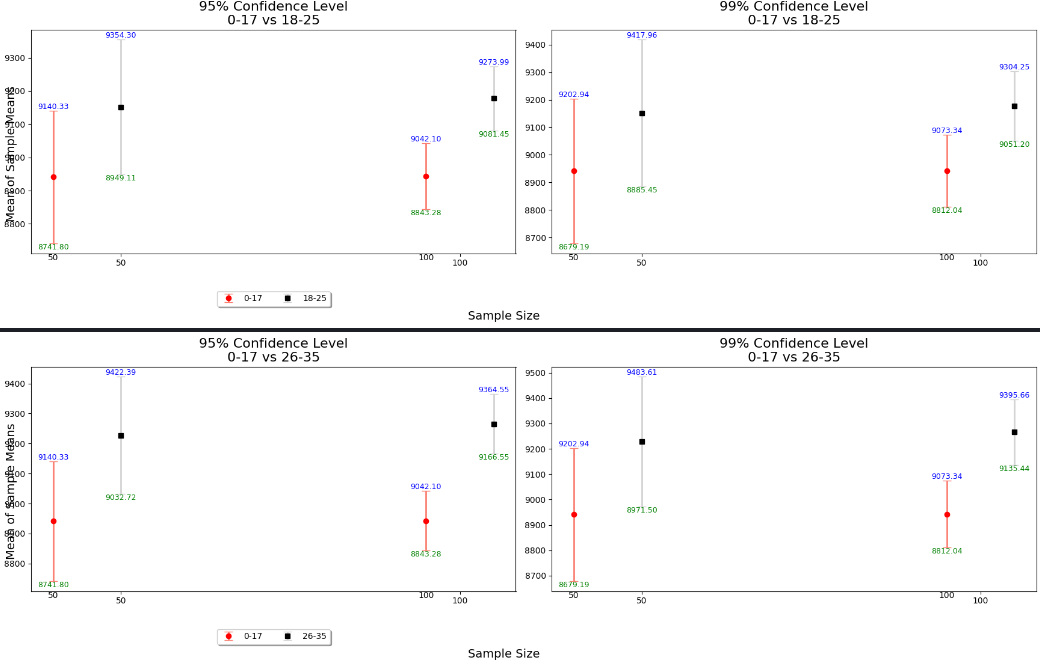

From the visual inspection of confidence intervals, it is observed that there is overlap between the confidence intervals for average spending between female and male customers. To confirm the significance of this overlap, the Kruskal-Wallis test was conducted, given that the Shapiro-Wilk test rejected the assumption of normality and equal variance.

**Kruskal-Wallis Test Results:**
- Kruskal-Wallis H-Statistic: 315.65
- P-Value: 3.61e-65

**Conclusion from Kruskal-Wallis Test:**
- The test results indicate a significant difference in purchasing patterns among different age categories.

Therefore, despite the overlap in confidence intervals, the Kruskal-Wallis test supports the conclusion that there are significant differences in purchasing patterns with respect to age categories.

# <font color = "Yellow">Recommendations for Walmart </font>

Based on customer purchase behavior analysis, here are actionable recommendations for Walmart to enhance business and customer satisfaction:

1. **Targeted Marketing**: Develop inclusive marketing strategies for both genders (71% male, 28% female) to boost engagement.

2. **Focus on Key Age Groups**: Concentrate on ages 26-35 (40% of customers) and 36-45 (20%) with tailored products and services.

3. **City-Specific Strategies**: Optimize product selection in Category B cities (53% of customers) to maximize sales.

4. **Boost Engagement**: Implement loyalty programs for unmarried customers (58%) to increase repeat purchases.

5. **Manage Product Inventory**: Ensure ample stock of popular categories (like Categories 5, 1, and 8) based on customer demand.

6. **Enhance Customer Experience**: Improve store experiences, considering that 35% of customers stay in their city for about 1 year.

7. **Digital Integration**: Embrace digital tools for seamless online and in-store shopping experiences.

8. **Sustainability Efforts**: Introduce eco-friendly products and practices, emphasizing transparency in sustainability initiatives.

9. **Employee Training**: Invest in ongoing training to empower staff with product knowledge and customer service skills.

10. **Competitive Pricing**: Maintain competitive pricing across all categories while delivering quality and value.

These actions will position Walmart as a leader in customer satisfaction, adapting to diverse consumer needs and market dynamics to foster growth and loyalty.